## KMeans with different k: Test with crossing data
KMeans normal bins and running bins

In [4]:
import cluster_data_ecc
from cluster_data_ecc import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
from kmeans import k_means
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData
import cluster_plotter

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data_ecc.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data_ecc.bin_data_for_clustering(running_ranges, print_res=False)

k_values = [3, 4, 5, 6, 7]

results_per_year_range = {}

# Output directory for plots
plot_dir = "k_means_tests_running_bins_3d"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning K-Means for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan, cluster_data.ecc]).T

    normalized_data, data_min, data_max = normalize_data(data_array)

    k_values = [3, 4, 5, 6, 7]

    results = []

    for k in k_values:
        result_kmeans, time_kmeans, n_clusters_kmeans, points_per_cluster_kmeans, metrics_kmeans = run_clustering(
            k_means, f"K-means (k={k})", normalized_data, data_min, data_max, k, plot=False, init='kmeans++'
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_kmeans.data, result_kmeans.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_kmeans.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"kmeans_{year_range}_k{k}.png")
        title = f"k-Means: years = {year_range}, k = {k}"
        plotter.clusters_3d_plot(title, plot_filename)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_kmeans[4].items()}
        #rounded_square_density = {key: round(value, 3) for key, value in metrics_kmeans[5].items()}
        #rounded_hull_density = {key: round(value, 3) for key, value in metrics_kmeans[6].items()}

        results.append({
            "Year Range": year_range,
            "k": k,
            "Runtime (s)": f"{time_kmeans:.3f}",
            "Clusters": n_clusters_kmeans,
            "Points per Cluster": points_per_cluster_kmeans,
            "Davies-Bouldin": f"{metrics_kmeans[0]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_kmeans[1]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[1], (int, float)) else None,
            "Dunn Index": f"{metrics_kmeans[2]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_kmeans[3]:.3f}" if metrics_kmeans and isinstance(metrics_kmeans[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None 
        })

    df = pd.DataFrame(results)
    display(df)
    print(binned_data)


Running K-Means for Year Range: 2002-2005
Runtime for k_means: 0.033404 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2002-2005_k3.png
Runtime for k_means: 0.047984 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2002-2005_k4.png
Runtime for k_means: 0.074845 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2002-2005_k5.png
Runtime for k_means: 0.046157 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2002-2005_k6.png
Runtime for k_means: 0.225814 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2002-2005_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2002-2005,3,0.033,3,"{0: 15275, 1: 3862, 2: 2382}",0.606,61809.745,0.006,0.526,"{0: (0.041, 0.077, 0.134), 1: (0.092, 0.116, 0..."
1,2002-2005,4,0.048,4,"{0: 241, 1: 3670, 2: 15272, 3: 2336}",0.694,44490.179,0.003,0.621,"{0: (0.096, 0.115, 0.205), 1: (0.07, 0.092, 0...."
2,2002-2005,5,0.075,5,"{0: 10035, 1: 409, 2: 3845, 3: 2378, 4: 4852}",0.718,49038.007,0.001,0.517,"{0: (0.029, 0.038, 0.061), 1: (0.024, 0.07, 0...."
3,2002-2005,6,0.046,6,"{0: 4850, 1: 1947, 2: 10036, 3: 1675, 4: 2603,...",0.822,48340.780,0.001,0.489,"{0: (0.021, 0.044, 0.139), 1: (0.088, 0.101, 0..."
4,2002-2005,7,0.226,7,"{0: 1821, 1: 4849, 2: 217, 3: 408, 4: 10033, 5...",0.775,45198.496,0.001,0.495,"{0: (0.078, 0.088, 0.101), 1: (0.021, 0.044, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2003-2006_k3.png
Runtime for k_means: 0.057911 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2003-2006_k4.png
Runtime for k_means: 0.080335 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2003-2006_k5.png
Runtime for k_means: 0.145435 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2003-2006_k6.png
Runtime for k_means: 0.220935 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2003-2006_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2003-2006,3,0.041,3,"{0: 2320, 1: 18026, 2: 3792}",0.656,59952.957,0.002,0.523,"{0: (0.121, 0.127, 0.148), 1: (0.041, 0.068, 0..."
1,2003-2006,4,0.058,4,"{0: 7427, 1: 2308, 2: 10614, 3: 3789}",0.825,56115.084,0.001,0.382,"{0: (0.042, 0.095, 0.13), 1: (0.119, 0.125, 0...."
2,2003-2006,5,0.080,5,"{0: 7138, 1: 3787, 2: 10103, 3: 809, 4: 2301}",0.722,53360.070,0.002,0.512,"{0: (0.038, 0.042, 0.099), 1: (0.102, 0.129, 0..."
3,2003-2006,6,0.145,6,"{0: 1425, 1: 7032, 2: 5649, 3: 347, 4: 8779, 5...",0.944,25589.730,0.001,0.457,"{0: (0.043, 0.061, 0.076), 1: (0.037, 0.04, 0...."
4,2003-2006,7,0.221,7,"{0: 2252, 1: 408, 2: 2202, 3: 1621, 4: 10009, ...",0.739,52908.350,0.004,0.508,"{0: (0.086, 0.102, 0.123), 1: (0.032, 0.086, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2004-2007_k3.png
Runtime for k_means: 0.066842 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2004-2007_k4.png
Runtime for k_means: 0.057679 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2004-2007_k5.png
Runtime for k_means: 0.205723 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2004-2007_k6.png
Runtime for k_means: 0.451844 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2004-2007_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2004-2007,3,0.038,3,"{0: 10471, 1: 4999, 2: 8524}",0.650,49379.480,0.001,0.328,"{0: (0.031, 0.04, 0.059), 1: (0.102, 0.133, 0...."
1,2004-2007,4,0.067,4,"{0: 776, 1: 18201, 2: 1696, 3: 3321}",0.669,48860.562,0.007,0.548,"{0: (0.051, 0.09, 0.135), 1: (0.038, 0.057, 0...."
2,2004-2007,5,0.058,5,"{0: 643, 1: 10081, 2: 3327, 3: 1692, 4: 8251}",0.683,52546.098,0.002,0.539,"{0: (0.025, 0.075, 0.101), 1: (0.029, 0.037, 0..."
3,2004-2007,6,0.206,6,"{0: 10046, 1: 3299, 2: 7952, 3: 366, 4: 643, 5...",0.629,49279.295,0.002,0.557,"{0: (0.029, 0.037, 0.058), 1: (0.091, 0.126, 0..."
4,2004-2007,7,0.452,7,"{0: 1991, 1: 1790, 2: 7952, 3: 643, 4: 1218, 5...",0.735,50972.038,0.002,0.537,"{0: (0.089, 0.094, 0.143), 1: (0.084, 0.098, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2005-2008_k3.png
Runtime for k_means: 0.051111 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2005-2008_k4.png
Runtime for k_means: 0.055685 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2005-2008_k5.png
Runtime for k_means: 0.141759 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2005-2008_k6.png
Runtime for k_means: 0.367923 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2005-2008_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2005-2008,3,0.087,3,"{0: 2748, 1: 17201, 2: 1524}",0.708,44833.220,0.005,0.533,"{0: (0.103, 0.126, 0.144), 1: (0.039, 0.065, 0..."
1,2005-2008,4,0.051,4,"{0: 16588, 1: 1522, 2: 634, 3: 2729}",0.685,40409.331,0.006,0.542,"{0: (0.038, 0.06, 0.11), 1: (0.112, 0.141, 0.1..."
2,2005-2008,5,0.056,5,"{0: 530, 1: 9249, 2: 7444, 3: 1528, 4: 2722}",0.681,45921.136,0.003,0.555,"{0: (0.026, 0.075, 0.105), 1: (0.028, 0.038, 0..."
3,2005-2008,6,0.142,6,"{0: 9531, 1: 1005, 2: 1689, 3: 7387, 4: 1534, ...",0.824,38653.600,0.002,0.529,"{0: (0.029, 0.04, 0.059), 1: (0.099, 0.129, 0...."
4,2005-2008,7,0.368,7,"{0: 7387, 1: 331, 2: 1593, 3: 219, 4: 946, 5: ...",0.775,36366.225,0.002,0.534,"{0: (0.022, 0.039, 0.119), 1: (0.053, 0.125, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2006-2009_k3.png
Runtime for k_means: 0.059496 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2006-2009_k4.png
Runtime for k_means: 0.084779 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2006-2009_k5.png
Runtime for k_means: 0.101823 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2006-2009_k6.png
Runtime for k_means: 0.102181 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2006-2009_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2006-2009,3,0.035,3,"{0: 17662, 1: 1592, 2: 2512}",0.739,42757.045,0.004,0.527,"{0: (0.04, 0.074, 0.139), 1: (0.118, 0.144, 0...."
1,2006-2009,4,0.059,4,"{0: 1580, 1: 9597, 2: 2509, 3: 8080}",0.777,48190.986,0.002,0.442,"{0: (0.113, 0.144, 0.15), 1: (0.031, 0.04, 0.0..."
2,2006-2009,5,0.085,5,"{0: 9597, 1: 1332, 2: 1740, 3: 8073, 4: 1024}",0.889,41465.428,0.002,0.527,"{0: (0.031, 0.04, 0.061), 1: (0.088, 0.121, 0...."
3,2006-2009,6,0.102,6,"{0: 9322, 1: 2488, 2: 7695, 3: 1553, 4: 374, 5...",0.649,42428.705,0.004,0.575,"{0: (0.029, 0.039, 0.059), 1: (0.085, 0.13, 0...."
4,2006-2009,7,0.102,7,"{0: 970, 1: 7799, 2: 1225, 3: 9537, 4: 215, 5:...",0.744,40090.257,0.002,0.555,"{0: (0.085, 0.103, 0.13), 1: (0.026, 0.038, 0...."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2007-2010_k3.png
Runtime for k_means: 0.056173 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2007-2010_k4.png
Runtime for k_means: 0.066678 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2007-2010_k5.png
Runtime for k_means: 0.377722 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2007-2010_k6.png
Runtime for k_means: 0.068801 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2007-2010_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2007-2010,3,0.016,3,"{0: 2840, 1: 6625, 2: 7599}",0.570,35612.190,0.002,0.379,"{0: (0.098, 0.137, 0.259), 1: (0.042, 0.086, 0..."
1,2007-2010,4,0.056,4,"{0: 7596, 1: 1239, 2: 1617, 3: 6612}",0.770,34936.914,0.003,0.454,"{0: (0.031, 0.04, 0.063), 1: (0.106, 0.141, 0...."
2,2007-2010,5,0.067,5,"{0: 6610, 1: 1160, 2: 725, 3: 973, 4: 7596}",0.868,29735.947,0.003,0.544,"{0: (0.038, 0.085, 0.121), 1: (0.078, 0.086, 0..."
3,2007-2010,6,0.378,6,"{0: 374, 1: 1233, 2: 214, 3: 7429, 4: 6217, 5:...",0.659,33460.194,0.002,0.592,"{0: (0.034, 0.106, 0.128), 1: (0.102, 0.142, 0..."
4,2007-2010,7,0.069,7,"{0: 7390, 1: 2773, 2: 296, 3: 115, 4: 6049, 5:...",0.802,17670.401,0.003,0.593,"{0: (0.03, 0.04, 0.062), 1: (0.08, 0.138, 0.25..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2008-2011_k3.png
Runtime for k_means: 0.048504 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2008-2011_k4.png
Runtime for k_means: 0.111343 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2008-2011_k5.png
Runtime for k_means: 0.063656 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2008-2011_k6.png
Runtime for k_means: 0.127391 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2008-2011_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2008-2011,3,0.037,3,"{0: 4742, 1: 5719, 2: 2099}",0.573,25322.772,0.004,0.392,"{0: (0.044, 0.071, 0.141), 1: (0.031, 0.041, 0..."
1,2008-2011,4,0.049,4,"{0: 5719, 1: 1001, 2: 4727, 3: 1113}",0.770,24569.677,0.005,0.468,"{0: (0.03, 0.041, 0.066), 1: (0.104, 0.137, 0...."
2,2008-2011,5,0.111,5,"{0: 1106, 1: 4443, 2: 987, 3: 372, 4: 5652}",0.626,28551.273,0.003,0.608,"{0: (0.09, 0.136, 0.143), 1: (0.029, 0.039, 0...."
3,2008-2011,6,0.064,6,"{0: 4443, 1: 935, 2: 372, 3: 5652, 4: 1040, 5:...",0.615,26671.001,0.003,0.614,"{0: (0.029, 0.039, 0.074), 1: (0.076, 0.105, 0..."
4,2008-2011,7,0.127,7,"{0: 4371, 1: 580, 2: 844, 3: 677, 4: 5048, 5: ...",0.814,24858.024,0.003,0.536,"{0: (0.028, 0.038, 0.072), 1: (0.102, 0.115, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2009-2012_k3.png
Runtime for k_means: 0.064137 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2009-2012_k4.png
Runtime for k_means: 0.091968 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2009-2012_k5.png
Runtime for k_means: 0.063994 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2009-2012_k6.png
Runtime for k_means: 0.118970 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2009-2012_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2009-2012,3,0.025,3,"{0: 5033, 1: 4128, 2: 1873}",0.572,22687.826,0.002,0.395,"{0: (0.031, 0.041, 0.066), 1: (0.045, 0.07, 0...."
1,2009-2012,4,0.064,4,"{0: 4112, 1: 902, 2: 986, 3: 5034}",0.756,22349.877,0.003,0.471,"{0: (0.04, 0.069, 0.14), 1: (0.096, 0.132, 0.1..."
2,2009-2012,5,0.092,5,"{0: 1644, 1: 986, 2: 902, 3: 3542, 4: 3960}",0.935,17980.211,0.002,0.409,"{0: (0.039, 0.048, 0.052), 1: (0.106, 0.131, 0..."
3,2009-2012,6,0.064,6,"{0: 813, 1: 330, 2: 932, 3: 4981, 4: 147, 5: 3...",0.792,22361.387,0.002,0.604,"{0: (0.095, 0.132, 0.145), 1: (0.028, 0.046, 0..."
4,2009-2012,7,0.119,7,"{0: 3594, 1: 575, 2: 236, 3: 1019, 4: 353, 5: ...",0.820,20487.753,0.003,0.535,"{0: (0.023, 0.029, 0.049), 1: (0.034, 0.067, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2010-2013_k3.png
Runtime for k_means: 0.020072 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2010-2013_k4.png
Runtime for k_means: 0.011834 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2010-2013_k5.png
Runtime for k_means: 0.136374 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2010-2013_k6.png
Runtime for k_means: 0.060528 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2010-2013_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2010-2013,3,0.028,3,"{0: 463, 1: 4273, 2: 348}",0.749,6583.799,0.011,0.498,"{0: (0.097, 0.136, 0.168), 1: (0.039, 0.097, 0..."
1,2010-2013,4,0.020,4,"{0: 347, 1: 1946, 2: 463, 3: 2328}",0.777,9133.278,0.004,0.468,"{0: (0.105, 0.135, 0.153), 1: (0.038, 0.073, 0..."
2,2010-2013,5,0.012,5,"{0: 2293, 1: 442, 2: 219, 3: 365, 4: 1765}",0.616,11378.070,0.006,0.622,"{0: (0.031, 0.039, 0.068), 1: (0.091, 0.132, 0..."
3,2010-2013,6,0.136,6,"{0: 268, 1: 798, 2: 219, 3: 77, 4: 1686, 5: 2036}",0.730,6406.069,0.003,0.571,"{0: (0.035, 0.067, 0.09), 1: (0.09, 0.146, 0.2..."
4,2010-2013,7,0.061,7,"{0: 2037, 1: 333, 2: 1745, 3: 207, 4: 219, 5: ...",0.794,10092.023,0.002,0.541,"{0: (0.023, 0.032, 0.051), 1: (0.083, 0.091, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2011-2014_k3.png
Runtime for k_means: 0.006024 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2011-2014_k4.png
Runtime for k_means: 0.006597 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2011-2014_k5.png
Runtime for k_means: 0.014239 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2011-2014_k6.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2011-2014_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2011-2014,3,0.000,3,"{0: 1085, 1: 1317, 2: 448}",0.573,5819.275,0.008,0.405,"{0: (0.048, 0.076, 0.152), 1: (0.029, 0.039, 0..."
1,2011-2014,4,0.006,4,"{0: 214, 1: 1317, 2: 1081, 3: 238}",0.796,5229.001,0.009,0.476,"{0: (0.109, 0.138, 0.155), 1: (0.029, 0.039, 0..."
2,2011-2014,5,0.007,5,"{0: 1306, 1: 147, 2: 212, 3: 235, 4: 950}",0.636,6423.510,0.006,0.630,"{0: (0.031, 0.04, 0.068), 1: (0.055, 0.071, 0...."
3,2011-2014,6,0.014,6,"{0: 872, 1: 226, 2: 99, 3: 1285, 4: 221, 5: 147}",0.767,5561.520,0.006,0.582,"{0: (0.027, 0.028, 0.055), 1: (0.081, 0.14, 0...."
4,2011-2014,7,0.000,7,"{0: 1306, 1: 94, 2: 948, 3: 135, 4: 194, 5: 26...",0.644,6020.314,0.006,0.633,"{0: (0.031, 0.04, 0.068), 1: (0.096, 0.104, 0...."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2012-2015_k3.png
Runtime for k_means: 0.018473 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2012-2015_k4.png
Runtime for k_means: 0.010478 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2012-2015_k5.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2012-2015_k6.png
Runtime for k_means: 0.015854 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2012-2015_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2012-2015,3,0.014,3,"{0: 511, 1: 1145, 2: 891}",0.682,5061.782,0.006,0.355,"{0: (0.089, 0.151, 0.247), 1: (0.03, 0.047, 0...."
1,2012-2015,4,0.018,4,"{0: 1145, 1: 205, 2: 887, 3: 310}",0.843,4686.679,0.007,0.426,"{0: (0.03, 0.047, 0.087), 1: (0.108, 0.134, 0...."
2,2012-2015,5,0.010,5,"{0: 290, 1: 309, 2: 205, 3: 1135, 4: 608}",0.673,5405.902,0.003,0.589,"{0: (0.045, 0.081, 0.084), 1: (0.079, 0.127, 0..."
3,2012-2015,6,0.000,6,"{0: 181, 1: 608, 2: 297, 3: 36, 4: 290, 5: 1135}",0.623,5205.415,0.003,0.599,"{0: (0.086, 0.114, 0.142), 1: (0.031, 0.038, 0..."
4,2012-2015,7,0.016,7,"{0: 355, 1: 187, 2: 845, 3: 194, 4: 830, 5: 27...",1.049,2895.844,0.004,0.333,"{0: (0.023, 0.052, 0.078), 1: (0.059, 0.081, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2013-2016_k3.png
Runtime for k_means: 0.012241 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2013-2016_k4.png
Runtime for k_means: 0.010967 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2013-2016_k5.png
Runtime for k_means: 0.015213 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2013-2016_k6.png
Runtime for k_means: 0.011750 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2013-2016_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2013-2016,3,0.016,3,"{0: 350, 1: 2704, 2: 602}",0.940,3922.627,0.014,0.369,"{0: (0.09, 0.117, 0.172), 1: (0.049, 0.125, 0...."
1,2013-2016,4,0.012,4,"{0: 943, 1: 1061, 2: 450, 3: 1202}",0.506,4933.449,0.007,0.481,"{0: (0.116, 0.186, 0.233), 1: (0.032, 0.046, 0..."
2,2013-2016,5,0.011,5,"{0: 265, 1: 443, 2: 2242, 3: 340, 4: 366}",0.751,3665.173,0.016,0.476,"{0: (0.098, 0.11, 0.146), 1: (0.054, 0.071, 0...."
3,2013-2016,6,0.015,6,"{0: 1059, 1: 366, 2: 339, 3: 265, 4: 444, 5: 1...",0.620,6610.176,0.008,0.591,"{0: (0.031, 0.039, 0.083), 1: (0.072, 0.082, 0..."
4,2013-2016,7,0.012,7,"{0: 442, 1: 52, 2: 1183, 3: 1059, 4: 362, 5: 2...",0.623,6356.301,0.009,0.602,"{0: (0.044, 0.053, 0.106), 1: (0.075, 0.096, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2014-2017_k3.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2014-2017_k4.png
Runtime for k_means: 0.016192 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2014-2017_k5.png
Runtime for k_means: 0.013795 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2014-2017_k6.png
Runtime for k_means: 0.007601 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2014-2017_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2014-2017,3,0.012,3,"{0: 3588, 1: 951, 2: 593}",0.939,5664.575,0.007,0.341,"{0: (0.051, 0.139, 0.196), 1: (0.082, 0.124, 0..."
1,2014-2017,4,0.000,4,"{0: 1357, 1: 2233, 2: 949, 3: 593}",0.946,6624.303,0.003,0.350,"{0: (0.046, 0.064, 0.099), 1: (0.045, 0.091, 0..."
2,2014-2017,5,0.016,5,"{0: 584, 1: 2233, 2: 881, 3: 79, 4: 1355}",0.950,5347.589,0.003,0.450,"{0: (0.082, 0.09, 0.169), 1: (0.045, 0.091, 0...."
3,2014-2017,6,0.014,6,"{0: 577, 1: 1327, 2: 270, 3: 346, 4: 2226, 5: ...",0.828,5792.431,0.007,0.473,"{0: (0.054, 0.077, 0.148), 1: (0.042, 0.044, 0..."
4,2014-2017,7,0.008,7,"{0: 557, 1: 1430, 2: 106, 3: 583, 4: 432, 5: 1...",0.678,8403.021,0.003,0.585,"{0: (0.067, 0.083, 0.138), 1: (0.033, 0.043, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2015-2018_k3.png
Runtime for k_means: 0.012302 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2015-2018_k4.png
Runtime for k_means: 0.020266 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2015-2018_k5.png
Runtime for k_means: 0.020528 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2015-2018_k6.png
Runtime for k_means: 0.030073 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2015-2018_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2015-2018,3,0.008,3,"{0: 1590, 1: 2117, 2: 3260}",0.709,9766.849,0.002,0.297,"{0: (0.047, 0.069, 0.101), 1: (0.112, 0.18, 0...."
1,2015-2018,4,0.012,4,"{0: 952, 1: 1244, 2: 911, 3: 3860}",0.846,7558.676,0.018,0.349,"{0: (0.045, 0.055, 0.109), 1: (0.076, 0.094, 0..."
2,2015-2018,5,0.020,5,"{0: 715, 1: 3260, 2: 1542, 3: 569, 4: 881}",0.763,9415.692,0.003,0.505,"{0: (0.07, 0.085, 0.142), 1: (0.041, 0.085, 0...."
3,2015-2018,6,0.021,6,"{0: 875, 1: 1523, 2: 953, 3: 563, 4: 713, 5: 2...",0.638,13126.247,0.003,0.597,"{0: (0.055, 0.075, 0.138), 1: (0.043, 0.045, 0..."
4,2015-2018,7,0.030,7,"{0: 563, 1: 760, 2: 866, 3: 1071, 4: 936, 5: 7...",0.730,12306.335,0.006,0.535,"{0: (0.091, 0.112, 0.135), 1: (0.042, 0.059, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2016-2019_k3.png
Runtime for k_means: 0.000000 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2016-2019_k4.png
Runtime for k_means: 0.011176 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2016-2019_k5.png
Runtime for k_means: 0.041594 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2016-2019_k6.png
Runtime for k_means: 0.050566 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2016-2019_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2016-2019,3,0.014,3,"{0: 4997, 1: 1172, 2: 1088}",0.707,8426.872,0.027,0.337,"{0: (0.04, 0.139, 0.183), 1: (0.074, 0.095, 0...."
1,2016-2019,4,0.000,4,"{0: 2538, 1: 1462, 2: 2198, 3: 1059}",0.539,8946.700,0.002,0.480,"{0: (0.033, 0.045, 0.074), 1: (0.045, 0.064, 0..."
2,2016-2019,5,0.011,5,"{0: 1429, 1: 1073, 2: 2537, 3: 1166, 4: 1052}",0.623,11619.041,0.002,0.595,"{0: (0.042, 0.046, 0.101), 1: (0.056, 0.084, 0..."
3,2016-2019,6,0.042,6,"{0: 2536, 1: 1050, 2: 537, 3: 1050, 4: 1429, 5...",0.647,13188.177,0.003,0.601,"{0: (0.033, 0.044, 0.074), 1: (0.049, 0.07, 0...."
4,2016-2019,7,0.051,7,"{0: 2536, 1: 107, 2: 517, 3: 1050, 4: 1429, 5:...",0.663,12547.036,0.003,0.610,"{0: (0.033, 0.044, 0.074), 1: (0.083, 0.111, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2017-2020_k3.png
Runtime for k_means: 0.003488 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2017-2020_k4.png
Runtime for k_means: 0.084027 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2017-2020_k5.png
Runtime for k_means: 0.033180 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2017-2020_k6.png
Runtime for k_means: 0.028340 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2017-2020_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2017-2020,3,0.030,3,"{0: 2247, 1: 3974, 2: 2580}",0.761,11521.191,0.003,0.281,"{0: (0.044, 0.061, 0.107), 1: (0.04, 0.083, 0...."
1,2017-2020,4,0.003,4,"{0: 2813, 1: 2166, 2: 2570, 3: 1252}",0.539,11110.122,0.002,0.479,"{0: (0.035, 0.045, 0.072), 1: (0.038, 0.054, 0..."
2,2017-2020,5,0.084,5,"{0: 2140, 1: 1375, 2: 1246, 3: 1232, 4: 2808}",0.630,14023.469,0.003,0.590,"{0: (0.037, 0.04, 0.104), 1: (0.073, 0.095, 0...."
3,2017-2020,6,0.033,6,"{0: 2579, 1: 1232, 2: 1240, 3: 1375, 4: 1047, ...",0.697,12375.277,0.002,0.530,"{0: (0.034, 0.045, 0.061), 1: (0.059, 0.078, 0..."
4,2017-2020,7,0.028,7,"{0: 1110, 1: 2613, 2: 135, 3: 1240, 4: 1127, 5...",0.794,11420.020,0.002,0.537,"{0: (0.035, 0.045, 0.062), 1: (0.034, 0.044, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2018-2021_k3.png
Runtime for k_means: 0.014686 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2018-2021_k4.png
Runtime for k_means: 0.015553 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2018-2021_k5.png
Runtime for k_means: 0.017080 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2018-2021_k6.png
Runtime for k_means: 0.019639 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2018-2021_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2018-2021,3,0.005,3,"{0: 5492, 1: 2500, 2: 1304}",0.774,10621.440,0.037,0.282,"{0: (0.036, 0.044, 0.189), 1: (0.106, 0.197, 0..."
1,2018-2021,4,0.015,4,"{0: 4197, 1: 1389, 2: 2566, 3: 1144}",0.836,11403.533,0.004,0.378,"{0: (0.043, 0.084, 0.174), 1: (0.072, 0.089, 0..."
2,2018-2021,5,0.016,5,"{0: 2434, 1: 1389, 2: 1138, 3: 3046, 4: 1289}",0.664,14004.453,0.003,0.577,"{0: (0.037, 0.039, 0.103), 1: (0.072, 0.089, 0..."
3,2018-2021,6,0.017,6,"{0: 3049, 1: 989, 2: 2422, 3: 1136, 4: 1389, 5...",0.719,12169.259,0.003,0.577,"{0: (0.032, 0.043, 0.071), 1: (0.023, 0.044, 0..."
4,2018-2021,7,0.020,7,"{0: 1389, 1: 1288, 2: 1136, 3: 2789, 4: 311, 5...",0.766,11286.634,0.005,0.522,"{0: (0.072, 0.089, 0.261), 1: (0.025, 0.038, 0..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2019-2022_k3.png
Runtime for k_means: 0.013641 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2019-2022_k4.png
Runtime for k_means: 0.001532 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2019-2022_k5.png
Runtime for k_means: 0.019198 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2019-2022_k6.png
Runtime for k_means: 0.050860 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2019-2022_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2019-2022,3,0.010,3,"{0: 2536, 1: 4206, 2: 3390}",0.804,12334.074,0.005,0.269,"{0: (0.111, 0.204, 0.228), 1: (0.045, 0.099, 0..."
1,2019-2022,4,0.014,4,"{0: 1944, 1: 2528, 2: 2489, 3: 3171}",0.579,12642.653,0.001,0.461,"{0: (0.05, 0.071, 0.136), 1: (0.11, 0.204, 0.2..."
2,2019-2022,5,0.002,5,"{0: 3357, 1: 4194, 2: 974, 3: 1007, 4: 600}",0.775,10969.359,0.007,0.485,"{0: (0.035, 0.037, 0.099), 1: (0.042, 0.099, 0..."
3,2019-2022,6,0.019,6,"{0: 3357, 1: 972, 2: 4194, 3: 117, 4: 932, 5: ...",0.803,9268.224,0.007,0.490,"{0: (0.035, 0.037, 0.099), 1: (0.063, 0.08, 0...."
4,2019-2022,7,0.051,7,"{0: 2492, 1: 596, 2: 969, 3: 561, 4: 1000, 5: ...",0.665,16624.242,0.005,0.589,"{0: (0.037, 0.046, 0.08), 1: (0.1, 0.137, 0.14..."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2020-2023_k3.png
Runtime for k_means: 0.016541 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2020-2023_k4.png
Runtime for k_means: 0.031687 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2020-2023_k5.png
Runtime for k_means: 0.037308 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2020-2023_k6.png
Runtime for k_means: 0.098703 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\cluster_plotter.py:169: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


3D plot saved as: k_means_tests_running_bins_3d\kmeans_2020-2023_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.
0,2020-2023,3,0.000,3,"{0: 5592, 1: 3764, 2: 3165}",0.794,14735.071,0.002,0.259,"{0: (0.046, 0.1, 0.202), 1: (0.038, 0.047, 0.0..."
1,2020-2023,4,0.017,4,"{0: 3350, 1: 2500, 2: 3157, 3: 3514}",0.583,15749.677,0.003,0.463,"{0: (0.034, 0.047, 0.082), 1: (0.052, 0.075, 0..."
2,2020-2023,5,0.032,5,"{0: 6813, 1: 1105, 2: 2507, 3: 908, 4: 1188}",0.759,13055.492,0.010,0.510,"{0: (0.034, 0.04, 0.189), 1: (0.064, 0.082, 0...."
3,2020-2023,6,0.037,6,"{0: 1187, 1: 3485, 2: 3348, 3: 1179, 4: 2492, ...",0.648,20755.373,0.005,0.583,"{0: (0.065, 0.082, 0.151), 1: (0.035, 0.036, 0..."
4,2020-2023,7,0.099,7,"{0: 3009, 1: 2445, 2: 910, 3: 1181, 4: 1105, 5...",0.700,18873.243,0.003,0.501,"{0: (0.035, 0.045, 0.073), 1: (0.03, 0.037, 0...."


[(ClusterData(inc=array([ 5.47,  6.37,  6.68, ...,  1.54, 15.66, 12.52]), raan=array([-173.06, -164.1 , -154.67, ...,  158.37,   12.01,   18.38]), ecc=array([0.2909, 0.2917, 0.3083, ..., 0.2361, 0.242 , 0.4494])), '2002-2005'), (ClusterData(inc=array([ 7.3 ,  7.3 ,  7.7 , ..., 13.36,  5.65, 14.39]), raan=array([177.41, 177.41, -48.41, ...,  -1.71, -18.29,  22.91]), ecc=array([0.2757, 0.2757, 0.29  , ..., 0.2135, 0.7279, 0.4575])), '2003-2006'), (ClusterData(inc=array([ 7.86, 18.26, 17.84, ..., 13.42,  3.31, 16.26]), raan=array([-166.42,   84.98,   84.98, ...,   -1.28,  107.19,   11.79]), ecc=array([0.2343, 0.3407, 0.3383, ..., 0.2146, 0.2414, 0.2469])), '2004-2007'), (ClusterData(inc=array([ 7.69,  7.16,  7.16, ..., 21.56, 21.13, 14.25]), raan=array([-103.67,  -80.54,  -80.54, ...,   18.89,   23.93,   18.19]), ecc=array([0.2532, 0.3038, 0.3038, ..., 0.1811, 0.2128, 0.318 ])), '2005-2008'), (ClusterData(inc=array([ 6.9 ,  6.55,  7.22, ..., 17.34, 17.6 , 15.27]), raan=array([-165.14, -16

## Mean Shift for binned years and different bandwidths

In [3]:
import cluster_data
from cluster_data import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from mean_shift import mean_shift_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "mean_shift_tests_running_bins_3d"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning Mean Shift for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan]).T

    normalized_data, data_min, data_max = normalize_data(data_array)

    bandwidths = [0.08, 0.09, 0.1, 0.12, 0.14]

    results = []

    for b in bandwidths:
        result_mean_shift, time_mean_shift, n_clusters_mean_shift, points_per_cluster_mean_shift, metrics_mean_shift = run_clustering(
            mean_shift_clustering, "Mean Shift", normalized_data, data_min, data_max, plot=False, bandwidth=b
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_mean_shift.data, result_mean_shift.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_mean_shift.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"meanshift_{year_range}_bandwidth{b}.png")
        title = f"Mean Shift: years = {year_range}, bandwidth = {b}"
        plotter.clusters_3d_plot(title, plot_filename)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_mean_shift[4].items()}
        

        results.append({
            "Year Range": year_range,
            "Runtime (s)": f"{time_mean_shift:.3f}",
            "Clusters": n_clusters_mean_shift,
            "Points per Cluster": points_per_cluster_mean_shift,
            "Davies-Bouldin": f"{metrics_mean_shift[0]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_mean_shift[1]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[1], (int, float)) else None,
            "Dunn Index": f"{metrics_mean_shift[2]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_mean_shift[3]:.3f}" if metrics_mean_shift and isinstance(metrics_mean_shift[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
        })

    df = pd.DataFrame(results)
    display(df)

KeyboardInterrupt: 

## DBSCAN for binned years with different parameters

In [ ]:
import cluster_data
from cluster_data_ecc import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from DBSCAN import dbscan_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData
import cluster_plotter

# Define year ranges
standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data.bin_data_for_clustering(standard_year_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "dbscan_tests_normal_bins_3d"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning DBSCAN for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan]).T

    normalized_data, data_min, data_max = normalize_data(data_array)

    # DBSCAN parameter ranges
    eps_values = [0.02, 0.01, 0.015]
    min_samples_values = [10, 15, 25, 30]

    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            result_dbscan, time_dbscan, n_clusters_dbscan, points_per_cluster_dbscan, metrics_dbscan = run_clustering(
                dbscan_clustering, "DBSCAN", normalized_data, data_min, data_max, plot=False, eps=eps, min_samples=min_samples
            )

            unnormalized_data, _ = unnormalize(
                result_dbscan.data, None, data_min, data_max
            )
            plotter = ClusterPlotter(unnormalized_data, result_dbscan.labels, None)  # No cluster centers
            plot_filename = os.path.join(plot_dir, f"dbscan_{year_range}_eps{eps}_min{min_samples}.png")
            title = f"DBSCAN: years = {year_range}, eps = {eps}, min_samples = {min_samples}"
            plotter.clusters_3d_plot(title, plot_filename, show_centers=False)

            # Count noise points
            noise_points = np.sum(result_dbscan.labels == -1)

            results.append({
                "Year Range": year_range,
                "Runtime (s)": f"{time_dbscan:.3f}",
                "Clusters": n_clusters_dbscan,
                "Points per Cluster": points_per_cluster_dbscan,
                "Noise Points": noise_points,
                "Davies-Bouldin": f"{metrics_dbscan[0]:.3f}" if metrics_dbscan and isinstance(metrics_dbscan[0], (int, float)) else None,
                "Calinski-Harabasz": f"{metrics_dbscan[1]:.3f}" if metrics_dbscan and isinstance(metrics_dbscan[1], (int, float)) else None
            })

    df = pd.DataFrame(results)
    display(df)


Running DBSCAN for Year Range: 2002-2005
Runtime for dbscan_clustering: 0.512757 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.02_min10.png
Runtime for dbscan_clustering: 0.548424 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.02_min15.png
Runtime for dbscan_clustering: 0.536150 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.02_min25.png
Runtime for dbscan_clustering: 0.533741 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.02_min30.png
Runtime for dbscan_clustering: 0.283039 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:177: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.01_min10.png
Runtime for dbscan_clustering: 0.265388 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:177: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.01_min15.png
Runtime for dbscan_clustering: 0.399175 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.01_min25.png
Runtime for dbscan_clustering: 0.670042 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.01_min30.png
Runtime for dbscan_clustering: 0.855759 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.015_min10.png
Runtime for dbscan_clustering: 0.402681 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.015_min15.png
Runtime for dbscan_clustering: 0.419217 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.015_min25.png
Runtime for dbscan_clustering: 0.383854 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2002-2005_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2002-2005,0.513,8,"{0: 20941, 1: 12, 2: 57, 3: 15, 4: 15, 5: 11, ...",455,2.919,47.324,0.004,-0.185
1,2002-2005,0.548,9,"{0: 20586, 1: 116, 2: 16, 3: 58, 4: 38, 5: 44,...",603,3.236,116.639,0.004,-0.231
2,2002-2005,0.536,12,"{0: 5807, 1: 57, 2: 43, 3: 135, 4: 14074, 5: 5...",1190,2.052,1065.425,0.001,0.128
3,2002-2005,0.534,13,"{0: 5543, 1: 60, 2: 45, 3: 42, 4: 107, 5: 1406...",1441,2.396,940.209,0.002,0.136
4,2002-2005,0.283,76,"{0: 1099, 1: 1942, 2: 316, 3: 79, 4: 4, 5: 11,...",2023,2.601,628.716,0.001,-0.077
5,2002-2005,0.265,76,"{0: 24, 1: 327, 2: 1185, 3: 88, 4: 214, 5: 27,...",2912,2.175,549.092,0.001,0.128
6,2002-2005,0.399,29,"{0: 992, 1: 35, 2: 142, 3: 43, 4: 29, 5: 72, 6...",5006,2.027,773.918,0.001,0.241
7,2002-2005,0.670,24,"{0: 949, 1: 72, 2: 40, 3: 35, 4: 547, 5: 36, 6...",5584,1.964,816.134,0.001,0.224
8,2002-2005,0.856,29,"{0: 5803, 1: 62, 2: 35, 3: 18, 4: 54, 5: 140, ...",833,1.923,484.230,0.001,0.066
9,2002-2005,0.403,23,"{0: 5479, 1: 57, 2: 38, 3: 115, 4: 18, 5: 18, ...",1361,3.295,570.004,0.001,-0.027



Running DBSCAN for Year Range: 2006-2009
Runtime for dbscan_clustering: 0.563771 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2006-2009_eps0.02_min10.png
Runtime for dbscan_clustering: 0.607431 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2006-2009_eps0.02_min15.png
Runtime for dbscan_clustering: 0.715904 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2006-2009_eps0.02_min25.png
Runtime for dbscan_clustering: 0.612635 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2006-2009_eps0.02_min30.png
Runtime for dbscan_clustering: 0.613354 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2006-2009_eps0.01_min10.png
Runtime for dbscan_clustering: 0.592927 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2006-2009_eps0.01_min15.png
Runtime for dbscan_clustering: 0.637821 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2006-2009_eps0.01_min25.png
Runtime for dbscan_clustering: 0.666123 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_20

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:177: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: dbscan_tests_normal_bins\dbscan_2006-2009_eps0.015_min10.png
Runtime for dbscan_clustering: 0.905984 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2006-2009_eps0.015_min15.png
Runtime for dbscan_clustering: 1.024081 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2006-2009_eps0.015_min25.png
Runtime for dbscan_clustering: 0.950967 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2006-2009_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2006-2009,0.564,15,"{0: 20648, 1: 182, 2: 41, 3: 22, 4: 22, 5: 12,...",517,10.659,344.960,0.002,0.023
1,2006-2009,0.607,13,"{0: 20399, 1: 33, 2: 20, 3: 20, 4: 192, 5: 153...",827,2.806,361.160,0.001,-0.200
2,2006-2009,0.716,13,"{0: 376, 1: 19398, 2: 68, 3: 38, 4: 20, 5: 179...",1489,2.376,598.303,0.001,0.011
3,2006-2009,0.613,9,"{0: 19272, 1: 237, 2: 74, 3: 47, 4: 95, 5: 84,...",1839,1.390,771.610,0.002,0.359
4,2006-2009,0.613,63,"{0: 17016, 1: 42, 2: 528, 3: 21, 4: 41, 5: 24,...",2309,2.307,239.636,0.001,-0.290
5,2006-2009,0.593,49,"{0: 16678, 1: 25, 2: 23, 3: 28, 4: 279, 5: 43,...",3218,3.787,239.694,0.001,-0.351
6,2006-2009,0.638,13,"{0: 16350, 1: 38, 2: 33, 3: 93, 4: 26, 5: 36, ...",5003,4.263,505.070,0.001,-0.127
7,2006-2009,0.666,7,"{0: 30, 1: 16223, 2: 23, 3: 36, 4: 30, 5: 45, ...",5379,1.658,894.335,0.001,-0.275
8,2006-2009,0.902,29,"{0: 19947, 1: 12, 2: 10, 3: 80, 4: 18, 5: 15, ...",1035,1.641,192.296,0.000,-0.245
9,2006-2009,0.906,26,"{0: 78, 1: 19137, 2: 251, 3: 49, 4: 30, 5: 30,...",1585,1.765,322.455,0.000,-0.080



Running DBSCAN for Year Range: 2010-2013
Runtime for dbscan_clustering: 0.143082 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2010-2013_eps0.02_min10.png
Runtime for dbscan_clustering: 0.114541 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2010-2013_eps0.02_min15.png
Runtime for dbscan_clustering: 0.114089 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2010-2013_eps0.02_min25.png
Runtime for dbscan_clustering: 0.110812 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2010-2013_eps0.02_min30.png
Runtime for dbscan_clustering: 0.079463 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2010-2013_eps0.01_min10.png
Runtime for dbscan_clustering: 0.079544 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2010-2013_eps0.01_min15.png
Runtime for dbscan_clustering: 0.079170 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2010-2013_eps0.01_min25.png
Runtime for dbscan_clustering: 0.079975 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_20

,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2010-2013,0.143,21,"{0: 4014, 1: 10, 2: 38, 3: 29, 4: 197, 5: 26, ...",547,3.342,155.479,0.003,-0.123
1,2010-2013,0.115,8,"{0: 3961, 1: 178, 2: 25, 3: 15, 4: 14, 5: 15, ...",861,2.712,290.438,0.003,-0.124
2,2010-2013,0.114,3,"{0: 3923, 1: 173, -1: 988}",988,1.905,909.041,0.001,0.192
3,2010-2013,0.111,3,"{0: 3903, 1: 170, -1: 1011}",1011,1.898,905.342,0.004,0.188
4,2010-2013,0.079,7,"{0: 1566, 1: 2162, 2: 151, 3: 14, 4: 11, 5: 15...",1165,1.723,826.229,0.001,0.139
5,2010-2013,0.080,9,"{0: 1531, 1: 29, 2: 2024, 3: 17, 4: 66, 5: 5, ...",1319,1.779,542.145,0.001,0.088
6,2010-2013,0.079,6,"{0: 1455, 1: 1883, 2: 57, 3: 57, 4: 18, -1: 1614}",1614,1.722,686.312,0.001,0.187
7,2010-2013,0.080,6,"{0: 1420, 1: 1787, 2: 48, 3: 53, 4: 42, -1: 1734}",1734,1.628,611.060,0.001,0.072
8,2010-2013,0.095,11,"{0: 3919, 1: 20, 2: 169, 3: 11, 4: 13, 5: 27, ...",884,3.859,207.518,0.002,-0.212
9,2010-2013,0.095,5,"{0: 3889, 1: 167, 2: 20, 3: 11, -1: 997}",997,1.754,460.172,0.004,-0.057



Running DBSCAN for Year Range: 2014-2017
Runtime for dbscan_clustering: 0.085373 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2014-2017_eps0.02_min10.png
Runtime for dbscan_clustering: 0.067219 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2014-2017_eps0.02_min15.png
Runtime for dbscan_clustering: 0.079373 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2014-2017_eps0.02_min25.png
Runtime for dbscan_clustering: 0.079146 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2014-2017_eps0.02_min30.png
Runtime for dbscan_clustering: 0.047457 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2014-2017_eps0.01_min10.png
Runtime for dbscan_clustering: 0.063807 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2014-2017_eps0.01_min15.png
Runtime for dbscan_clustering: 0.048063 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2014-2017_eps0.01_min25.png
Runtime for dbscan_clustering: 0.063350 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_20

,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2014-2017,0.085,14,"{0: 16, 1: 20, 2: 4285, 3: 37, 4: 10, 5: 11, 6...",636,2.677,33.795,0.002,-0.500
1,2014-2017,0.067,9,"{0: 1258, 1: 2689, 2: 35, 3: 91, 4: 47, 5: 34,...",934,4.137,238.757,0.004,-0.307
2,2014-2017,0.079,7,"{0: 752, 1: 2541, 2: 69, 3: 43, 4: 411, 5: 26,...",1290,1.960,342.435,0.003,0.053
3,2014-2017,0.079,5,"{0: 740, 1: 2488, 2: 407, 3: 61, -1: 1436}",1436,2.071,486.483,0.003,0.083
4,2014-2017,0.047,19,"{0: 2170, 1: 20, 2: 680, 3: 52, 4: 13, 5: 221,...",1636,1.476,119.699,0.002,-0.360
5,2014-2017,0.064,12,"{0: 204, 1: 631, 2: 1031, 3: 662, 4: 26, 5: 21...",1978,1.510,352.308,0.000,0.057
6,2014-2017,0.048,13,"{0: 77, 1: 552, 2: 45, 3: 830, 4: 646, 5: 214,...",2467,1.510,242.926,0.001,-0.079
7,2014-2017,0.063,11,"{0: 526, 1: 485, 2: 56, 3: 45, 4: 644, 5: 213,...",2709,1.581,264.284,0.001,-0.106
8,2014-2017,0.066,19,"{0: 1225, 1: 2605, 2: 12, 3: 21, 4: 72, 5: 13,...",975,3.593,116.844,0.000,-0.407
9,2014-2017,0.064,9,"{0: 745, 1: 2469, 2: 65, 3: 442, 4: 15, 5: 17,...",1331,5.268,256.107,0.002,-0.167



Running DBSCAN for Year Range: 2019-2022
Runtime for dbscan_clustering: 0.223831 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.02_min10.png
Runtime for dbscan_clustering: 0.251245 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.02_min15.png
Runtime for dbscan_clustering: 0.207984 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.02_min25.png
Runtime for dbscan_clustering: 0.101022 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.02_min30.png
Runtime for dbscan_clustering: 0.063193 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:177: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.01_min10.png
Runtime for dbscan_clustering: 0.055872 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.01_min15.png
Runtime for dbscan_clustering: 0.069296 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.01_min25.png
Runtime for dbscan_clustering: 0.054905 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.01_min30.png
Runtime for dbscan_clustering: 0.085220 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:177: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.015_min10.png
Runtime for dbscan_clustering: 0.259275 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.015_min15.png
Runtime for dbscan_clustering: 0.169270 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.015_min25.png
Runtime for dbscan_clustering: 0.190349 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2022_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2019-2022,0.224,28,"{0: 2859, 1: 99, 2: 5657, 3: 61, 4: 10, 5: 116...",535,1.792,376.017,0.002,-0.362
1,2019-2022,0.251,23,"{0: 76, 1: 55, 2: 5621, 3: 2611, 4: 67, 5: 36,...",862,1.996,380.876,0.001,-0.322
2,2019-2022,0.208,13,"{0: 5474, 1: 99, 2: 62, 3: 2377, 4: 27, 5: 320...",1564,5.362,526.512,0.002,-0.247
3,2019-2022,0.101,11,"{0: 5424, 1: 84, 2: 48, 3: 1538, 4: 808, 5: 29...",1795,13.860,696.359,0.003,-0.104
4,2019-2022,0.063,62,"{0: 10, 1: 24, 2: 34, 3: 881, 4: 4979, 5: 721,...",1880,2.330,148.110,0.001,-0.383
5,2019-2022,0.056,25,"{0: 21, 1: 869, 2: 4832, 3: 716, 4: 42, 5: 75,...",2504,3.133,284.716,0.001,-0.409
6,2019-2022,0.069,17,"{0: 808, 1: 4524, 2: 716, 3: 42, 4: 44, 5: 513...",3148,1.363,346.796,0.000,-0.339
7,2019-2022,0.055,10,"{0: 808, 1: 4423, 2: 706, 3: 513, 4: 30, 5: 50...",3483,1.393,524.751,0.000,-0.138
8,2019-2022,0.085,49,"{0: 63, 1: 5535, 2: 93, 3: 2364, 4: 61, 5: 19,...",970,2.833,184.410,0.001,-0.398
9,2019-2022,0.259,25,"{0: 68, 1: 47, 2: 2324, 3: 5336, 4: 36, 5: 19,...",1582,2.333,293.001,0.002,-0.362



Running DBSCAN for Year Range: 2019-2023
Runtime for dbscan_clustering: 0.364016 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:177: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.02_min10.png
Runtime for dbscan_clustering: 0.442376 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.02_min15.png
Runtime for dbscan_clustering: 0.334909 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.02_min25.png
Runtime for dbscan_clustering: 0.316197 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.02_min30.png
Runtime for dbscan_clustering: 0.099133 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:177: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.01_min10.png
Runtime for dbscan_clustering: 0.093031 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:177: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.01_min15.png
Runtime for dbscan_clustering: 0.091767 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.01_min25.png
Runtime for dbscan_clustering: 0.093280 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.01_min30.png
Runtime for dbscan_clustering: 0.171937 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:177: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.015_min10.png
Runtime for dbscan_clustering: 0.142490 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.015_min15.png
Runtime for dbscan_clustering: 0.117339 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.015_min25.png
Runtime for dbscan_clustering: 0.116384 seconds
Plot saved as: dbscan_tests_normal_bins\dbscan_2019-2023_eps0.015_min30.png


,Year Range,Runtime (s),Clusters,Points per Cluster,Noise Points,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score
0,2019-2023,0.364,27,"{0: 12025, 1: 217, 2: 33, 3: 12, 4: 30, 5: 92,...",537,5.729,242.973,0.002,-0.467
1,2019-2023,0.442,24,"{0: 11729, 1: 207, 2: 92, 3: 15, 4: 146, 5: 21...",791,3.345,274.498,0.002,-0.415
2,2019-2023,0.335,21,"{0: 7801, 1: 3619, 2: 77, 3: 83, 4: 38, 5: 693...",1425,1.894,560.810,0.002,-0.340
3,2019-2023,0.316,18,"{0: 7730, 1: 242, 2: 77, 3: 3277, 4: 51, 5: 59...",1873,3.663,593.055,0.002,-0.343
4,2019-2023,0.099,91,"{0: 12, 1: 11, 2: 41, 3: 46, 4: 1186, 5: 7181,...",2036,2.800,167.383,0.002,-0.371
5,2019-2023,0.093,41,"{0: 41, 1: 1179, 2: 6983, 3: 20, 4: 1020, 5: 5...",2964,2.721,286.896,0.001,-0.399
6,2019-2023,0.092,17,"{0: 1146, 1: 6682, 2: 1015, 3: 50, 4: 151, 5: ...",3873,1.491,583.244,0.001,-0.381
7,2019-2023,0.093,11,"{0: 1136, 1: 6478, 2: 1015, 3: 50, 4: 150, 5: ...",4275,1.546,838.668,0.001,-0.231
8,2019-2023,0.172,53,"{0: 78, 1: 7801, 2: 326, 3: 3299, 4: 12, 5: 15...",982,1.871,288.267,0.001,-0.355
9,2019-2023,0.142,41,"{0: 7656, 1: 242, 2: 62, 3: 3205, 4: 69, 5: 25...",1529,2.643,313.332,0.001,-0.392


## Fuzzy C- Means

In [ ]:
import cluster_data
from cluster_data_ecc import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from fuzzy_c_means import fuzzy_c_means 
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data.generate_running_year_ranges(2002, 2023, 4)

binned_data = cluster_data.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "fuzzy_c_means_tests_running_bins_ecc"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning Fuzzy C-Means for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan]).T
    normalized_data, data_min, data_max = normalize_data(data_array)

    k_values = [3, 4, 5, 6, 7]

    results = []

    for k in k_values:
        result_fcm, time_fcm, n_clusters_fcm, points_per_cluster_fcm, metrics_fcm = run_clustering(
            fuzzy_c_means, "Fuzzy C-means", normalized_data, data_min, data_max, k, plot=False, m=2
        )

        unnormalized_data, cluster_centers = unnormalize(
            result_fcm.data, result_fcm.cluster_centers, data_min, data_max
        )
        plotter = ClusterPlotter(unnormalized_data, result_fcm.labels, cluster_centers)
        plot_filename = os.path.join(plot_dir, f"fcm_{year_range}_k{k}.png")
        title = f"Fuzzy C-Means: years = {year_range}, k = {k}"
        plotter.clusters_3d_plot(title, plot_filename)

        # Round metric results
        rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_fcm[4].items()}
        rounded_square_density = {key: round(value, 3) for key, value in metrics_fcm[5].items()}
        rounded_hull_density = {key: round(value, 3) for key, value in metrics_fcm[6].items()}

        results.append({
            "Year Range": year_range,
            "k": k,
            "Runtime (s)": f"{time_fcm:.3f}",
            "Clusters": n_clusters_fcm,
            "Points per Cluster": points_per_cluster_fcm,
            "Davies-Bouldin": f"{metrics_fcm[0]:.3f}" if metrics_fcm and isinstance(metrics_fcm[0], (int, float)) else None,
            "Calinski-Harabasz": f"{metrics_fcm[1]:.3f}" if metrics_fcm and isinstance(metrics_fcm[1], (int, float)) else None,
            "Dunn Index": f"{metrics_fcm[2]:.3f}" if metrics_fcm and isinstance(metrics_fcm[2], (int, float)) else None,
            "Silhouette Score": f"{metrics_fcm[3]:.3f}" if metrics_fcm and isinstance(metrics_fcm[3], (int, float)) else None,
            "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None,
            "Square Density": rounded_square_density if rounded_square_density else None,
            "Hull Density": rounded_hull_density if rounded_hull_density else None
        })

    df = pd.DataFrame(results)
    display(df)


Running Fuzzy C-Means for Year Range: 2002-2005

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:32<01:04, 32.41s/step]

Runtime for fuzzy_c_means: 32.406652 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:42<00:00, 14.00s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2002-2005_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:17<02:35, 77.86s/step]

Runtime for fuzzy_c_means: 77.859882 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:33<00:00, 31.03s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2002-2005_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [04:17<08:34, 257.46s/step]

Runtime for fuzzy_c_means: 257.459018 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [04:28<00:00, 89.42s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2002-2005_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [04:42<09:24, 282.05s/step]

Runtime for fuzzy_c_means: 282.046907 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [04:49<00:00, 96.64s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2002-2005_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [11:56<23:53, 716.72s/step]

Runtime for fuzzy_c_means: 716.715688 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [12:09<00:00, 243.25s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2002-2005_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2002-2005,3,32.407,3,"{0: 2847, 1: 14818, 2: 3854}",0.533,33081.452,0.002,0.449,"{0: (0.082, 0.129), 1: (0.054, 0.088), 2: (0.0...","{0: 7183.202, 1: 22235.348, 2: 10903.358}","{0: 11572.268, 1: 37409.619, 2: 17176.377}"
1,2002-2005,4,77.860,4,"{0: 9878, 1: 2404, 2: 3584, 3: 5653}",0.630,33738.050,0.001,0.439,"{0: (0.042, 0.064), 1: (0.076, 0.108), 2: (0.0...","{0: 19253.467, 1: 8856.459, 2: 11057.804, 3: 1...","{0: 35069.56, 1: 13564.173, 2: 17812.607, 3: 3..."
2,2002-2005,5,257.459,5,"{0: 9800, 1: 2299, 2: 5024, 3: 2339, 4: 2057}",0.674,33554.923,0.001,0.530,"{0: (0.041, 0.063), 1: (0.077, 0.096), 2: (0.0...","{0: 23821.453, 1: 10684.446, 2: 13620.975, 3: ...","{0: 40024.819, 1: 13989.671, 2: 34680.499, 3: ..."
3,2002-2005,6,282.047,6,"{0: 2169, 1: 2104, 2: 6572, 3: 4957, 4: 2284, ...",0.722,32083.761,0.001,0.501,"{0: (0.058, 0.071), 1: (0.081, 0.101), 2: (0.0...","{0: 11967.856, 1: 14405.003, 2: 36694.247, 3: ...","{0: 16700.425, 1: 19356.176, 2: 83089.07, 3: 4..."
4,2002-2005,7,716.716,7,"{0: 4599, 1: 1796, 2: 1951, 3: 1981, 4: 6610, ...",0.784,32448.791,0.001,0.507,"{0: (0.032, 0.036), 1: (0.059, 0.099), 2: (0.0...","{0: 20044.762, 1: 14899.314, 2: 12084.257, 3: ...","{0: 48496.496, 1: 19821.275, 2: 15210.439, 3: ..."



Running Fuzzy C-Means for Year Range: 2003-2006

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:38<03:17, 98.61s/step]

Runtime for fuzzy_c_means: 98.606040 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:52<00:00, 37.65s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2003-2006_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:23<02:46, 83.35s/step]

Runtime for fuzzy_c_means: 83.350813 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:37<00:00, 32.37s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2003-2006_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [04:26<08:53, 266.75s/step]

Runtime for fuzzy_c_means: 266.747533 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [04:40<00:00, 93.44s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2003-2006_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [05:27<10:55, 327.59s/step]

Runtime for fuzzy_c_means: 327.594905 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [05:36<00:00, 112.06s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2003-2006_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [06:11<12:22, 371.38s/step]

Runtime for fuzzy_c_means: 371.375048 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [06:20<00:00, 126.76s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2003-2006_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2003-2006,3,98.606,3,"{0: 3709, 1: 17349, 2: 3080}",0.585,29824.790,0.002,0.424,"{0: (0.086, 0.129), 1: (0.051, 0.096), 2: (0.0...","{0: 10161.884, 1: 25465.982, 2: 8535.763}","{0: 15542.845, 1: 44221.682, 2: 13530.98}"
1,2003-2006,4,83.351,4,"{0: 2467, 1: 7887, 2: 10372, 3: 3412}",0.581,35194.877,0.001,0.447,"{0: (0.082, 0.103), 1: (0.046, 0.07), 2: (0.04...","{0: 8440.121, 1: 19561.529, 2: 20444.313, 3: 1...","{0: 14170.917, 1: 52168.87, 2: 35121.546, 3: 1..."
2,2003-2006,5,266.748,5,"{0: 2157, 1: 7283, 2: 2398, 3: 10305, 4: 1995}",0.680,34026.205,0.001,0.540,"{0: (0.07, 0.088), 1: (0.042, 0.054), 2: (0.08...","{0: 14577.099, 1: 22669.55, 2: 9915.254, 3: 23...","{0: 20888.94, 1: 55697.259, 2: 14629.947, 3: 3..."
3,2003-2006,6,327.595,6,"{0: 7136, 1: 6905, 2: 3666, 3: 2391, 4: 2168, ...",0.787,31718.412,0.001,0.479,"{0: (0.029, 0.054), 1: (0.028, 0.03), 2: (0.06...","{0: 25334.507, 1: 40506.511, 2: 9505.462, 3: 9...","{0: 65157.005, 1: 86587.902, 2: 15913.058, 3: ..."
4,2003-2006,7,371.375,7,"{0: 3549, 1: 6646, 2: 6955, 3: 2093, 4: 1537, ...",0.838,31500.336,0.000,0.483,"{0: (0.061, 0.083), 1: (0.027, 0.036), 2: (0.0...","{0: 9202.097, 1: 29262.168, 2: 39959.109, 3: 1...","{0: 15445.065, 1: 73416.543, 2: 95601.569, 3: ..."



Running Fuzzy C-Means for Year Range: 2004-2007

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:36<01:12, 36.29s/step]

Runtime for fuzzy_c_means: 36.287523 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:45<00:00, 15.09s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2004-2007_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:49<01:38, 49.13s/step]

Runtime for fuzzy_c_means: 49.133970 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:58<00:00, 19.39s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2004-2007_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [03:45<07:31, 225.86s/step]

Runtime for fuzzy_c_means: 225.859479 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:54<00:00, 78.24s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2004-2007_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [04:10<08:20, 250.45s/step]

Runtime for fuzzy_c_means: 250.453552 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [04:19<00:00, 86.41s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2004-2007_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [07:34<15:08, 454.11s/step]

Runtime for fuzzy_c_means: 454.109664 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [07:42<00:00, 154.22s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2004-2007_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2004-2007,3,36.288,3,"{0: 10959, 1: 10031, 2: 3004}",0.692,22787.346,0.001,0.322,"{0: (0.051, 0.064), 1: (0.063, 0.144), 2: (0.0...","{0: 19840.877, 1: 20728.414, 2: 10010.081}","{0: 33316.8, 1: 31938.452, 2: 14325.945}"
1,2004-2007,4,49.134,4,"{0: 8930, 1: 10379, 2: 1775, 3: 2910}",0.539,34752.145,0.001,0.475,"{0: (0.043, 0.062), 1: (0.049, 0.061), 2: (0.0...","{0: 21439.683, 1: 20632.795, 2: 6155.946, 3: 8...","{0: 57641.204, 1: 34809.635, 2: 10634.509, 3: ..."
2,2004-2007,5,225.859,5,"{0: 1850, 1: 8411, 2: 10336, 3: 1723, 4: 1674}",0.662,33043.239,0.000,0.569,"{0: (0.069, 0.083), 1: (0.036, 0.053), 2: (0.0...","{0: 12506.389, 1: 25856.421, 2: 20956.312, 3: ...","{0: 17941.154, 1: 64851.997, 2: 35210.202, 3: ..."
3,2004-2007,6,250.454,6,"{0: 1873, 1: 8261, 2: 3396, 3: 7174, 4: 1710, ...",0.801,30998.136,0.000,0.481,"{0: (0.071, 0.082), 1: (0.028, 0.053), 2: (0.0...","{0: 12767.195, 1: 30029.889, 2: 9048.504, 3: 5...","{0: 18557.997, 1: 72508.222, 2: 14212.838, 3: ..."
4,2004-2007,7,454.110,7,"{0: 3261, 1: 5662, 2: 7160, 3: 1588, 4: 1359, ...",0.864,29466.827,0.000,0.432,"{0: (0.046, 0.056), 1: (0.026, 0.029), 2: (0.0...","{0: 20371.374, 1: 28857.767, 2: 44229.454, 3: ...","{0: 43779.012, 1: 88446.897, 2: 109917.787, 3:..."



Running Fuzzy C-Means for Year Range: 2005-2008

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:28<00:57, 28.58s/step]

Runtime for fuzzy_c_means: 28.582611 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:36<00:00, 12.04s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2005-2008_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:57<01:55, 57.85s/step]

Runtime for fuzzy_c_means: 57.848387 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:05<00:00, 21.78s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2005-2008_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [03:52<07:44, 232.32s/step]

Runtime for fuzzy_c_means: 232.317890 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:59<00:00, 79.87s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2005-2008_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [06:27<12:55, 387.65s/step]

Runtime for fuzzy_c_means: 387.649070 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [06:35<00:00, 131.86s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2005-2008_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [1:08:27<2:16:54, 4107.32s/step]

Runtime for fuzzy_c_means: 4107.318142 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [1:08:35<00:00, 1371.92s/step]  


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2005-2008_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2005-2008,3,28.583,3,"{0: 9039, 1: 2545, 2: 9889}",0.653,21360.450,0.001,0.349,"{0: (0.06, 0.139), 1: (0.083, 0.123), 2: (0.05...","{0: 20125.997, 1: 7870.37, 2: 18504.744}","{0: 29717.86, 1: 11909.843, 2: 30898.224}"
1,2005-2008,4,57.848,4,"{0: 9531, 1: 8018, 2: 1460, 3: 2464}",0.524,31300.852,0.001,0.494,"{0: (0.05, 0.062), 1: (0.039, 0.06), 2: (0.1, ...","{0: 18340.213, 1: 21145.038, 2: 5215.247, 3: 8...","{0: 30716.96, 1: 55836.365, 2: 9002.719, 3: 12..."
2,2005-2008,5,232.318,5,"{0: 9142, 1: 4720, 2: 3939, 3: 1332, 4: 2340}",0.732,26756.080,0.000,0.467,"{0: (0.046, 0.061), 1: (0.032, 0.042), 2: (0.0...","{0: 17764.203, 1: 18127.112, 2: 20638.361, 3: ...","{0: 31015.908, 1: 54390.107, 2: 41191.764, 3: ..."
3,2005-2008,6,387.649,6,"{0: 1663, 1: 1400, 2: 1250, 3: 2949, 4: 6733, ...",0.797,27977.143,0.001,0.490,"{0: (0.072, 0.082), 1: (0.094, 0.1), 2: (0.07,...","{0: 11419.993, 1: 5822.699, 2: 7264.449, 3: 80...","{0: 16762.645, 1: 9160.26, 2: 9627.369, 3: 121..."
4,2005-2008,7,4107.318,7,"{0: 1136, 1: 3156, 2: 1610, 3: 1297, 4: 2583, ...",0.858,26663.619,0.000,0.432,"{0: (0.065, 0.089), 1: (0.043, 0.054), 2: (0.0...","{0: 7223.264, 1: 20530.211, 2: 11372.434, 3: 5...","{0: 9519.125, 1: 43081.835, 2: 16465.57, 3: 94..."



Running Fuzzy C-Means for Year Range: 2006-2009

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:52<01:45, 52.81s/step]

Runtime for fuzzy_c_means: 52.807271 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:00<00:00, 20.16s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2006-2009_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:49<03:38, 109.38s/step]

Runtime for fuzzy_c_means: 109.383459 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:56<00:00, 38.97s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2006-2009_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [04:27<08:55, 267.78s/step]

Runtime for fuzzy_c_means: 267.775378 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [04:35<00:00, 91.93s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2006-2009_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [05:28<10:56, 328.14s/step]

Runtime for fuzzy_c_means: 328.140315 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [05:36<00:00, 112.20s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2006-2009_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [06:33<13:06, 393.03s/step]

Runtime for fuzzy_c_means: 393.024762 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [06:40<00:00, 133.44s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2006-2009_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2006-2009,3,52.807,3,"{0: 9501, 1: 9913, 2: 2352}",0.605,24265.104,0.001,0.373,"{0: (0.058, 0.12), 1: (0.053, 0.065), 2: (0.08...","{0: 22065.881, 1: 18751.46, 2: 7685.146}","{0: 31791.025, 1: 28137.369, 2: 10970.257}"
1,2006-2009,4,109.383,4,"{0: 8594, 1: 1273, 2: 9639, 3: 2260}",0.564,28999.629,0.001,0.495,"{0: (0.039, 0.06), 1: (0.098, 0.109), 2: (0.05...","{0: 38777.036, 1: 3885.433, 2: 18152.268, 3: 7...","{0: 75442.077, 1: 7019.204, 2: 28549.65, 3: 10..."
2,2006-2009,5,267.775,5,"{0: 4966, 1: 4424, 2: 2146, 3: 1088, 4: 9142}",0.715,25519.148,0.000,0.472,"{0: (0.036, 0.037), 1: (0.048, 0.063), 2: (0.0...","{0: 21029.279, 1: 30031.156, 2: 7816.608, 3: 4...","{0: 60136.965, 1: 52409.802, 2: 10883.104, 3: ..."
3,2006-2009,6,328.140,6,"{0: 3172, 1: 6366, 2: 5579, 3: 3495, 4: 1024, ...",0.880,23722.182,0.000,0.404,"{0: (0.063, 0.08), 1: (0.029, 0.032), 2: (0.02...","{0: 8940.484, 1: 83735.172, 2: 46760.444, 3: 2...","{0: 12262.687, 1: 126780.122, 2: 93817.266, 3:..."
4,2006-2009,7,393.025,7,"{0: 3520, 1: 2728, 2: 1535, 3: 1039, 4: 1016, ...",0.867,25491.701,0.000,0.419,"{0: (0.041, 0.053), 1: (0.064, 0.086), 2: (0.0...","{0: 25982.14, 1: 7803.03, 2: 11399.986, 3: 628...","{0: 51944.659, 1: 10644.708, 2: 16459.541, 3: ..."



Running Fuzzy C-Means for Year Range: 2007-2010

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:25<00:51, 25.94s/step]

Runtime for fuzzy_c_means: 25.943779 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:30<00:00, 10.22s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2007-2010_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:27<02:55, 87.78s/step]

Runtime for fuzzy_c_means: 87.778864 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:32<00:00, 30.73s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2007-2010_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [02:56<05:53, 176.80s/step]

Runtime for fuzzy_c_means: 176.798137 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:01<00:00, 60.38s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2007-2010_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [03:46<07:32, 226.44s/step]

Runtime for fuzzy_c_means: 226.443399 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:50<00:00, 76.94s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2007-2010_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [05:53<11:47, 353.59s/step]

Runtime for fuzzy_c_means: 353.591950 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [05:59<00:00, 119.91s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2007-2010_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2007-2010,3,25.944,3,"{0: 7599, 1: 7807, 2: 1658}",0.549,22311.744,0.002,0.400,"{0: (0.058, 0.109), 1: (0.05, 0.067), 2: (0.09...","{0: 16945.759, 1: 14287.004, 2: 5802.553}","{0: 23936.143, 1: 22989.801, 2: 8262.518}"
1,2007-2010,4,87.779,4,"{0: 7626, 1: 1616, 2: 884, 3: 6938}",0.570,24226.185,0.001,0.510,"{0: (0.05, 0.065), 1: (0.091, 0.123), 2: (0.09...","{0: 14450.655, 1: 5655.564, 2: 2696.018, 3: 32...","{0: 22938.866, 1: 8299.518, 2: 4604.71, 3: 610..."
2,2007-2010,5,176.798,5,"{0: 7075, 1: 1543, 2: 4402, 3: 739, 4: 3305}",0.703,21363.289,0.000,0.472,"{0: (0.048, 0.061), 1: (0.089, 0.12), 2: (0.04...","{0: 14226.334, 1: 5744.958, 2: 29009.667, 3: 2...","{0: 23045.082, 1: 8356.521, 2: 51116.51, 3: 44..."
3,2007-2010,6,226.443,6,"{0: 679, 1: 1520, 2: 2405, 3: 5138, 4: 3284, 5...",0.867,19859.381,0.000,0.391,"{0: (0.092, 0.106), 1: (0.088, 0.118), 2: (0.0...","{0: 2446.453, 1: 5908.015, 2: 7070.994, 3: 527...","{0: 4223.842, 1: 8345.361, 2: 10478.43, 3: 827..."
4,2007-2010,7,353.592,7,"{0: 3242, 1: 5402, 2: 3846, 3: 1046, 4: 822, 5...",0.869,21386.643,0.000,0.414,"{0: (0.04, 0.049), 1: (0.028, 0.034), 2: (0.02...","{0: 26781.851, 1: 59084.227, 2: 44142.446, 3: ...","{0: 47421.074, 1: 97512.631, 2: 90332.138, 3: ..."



Running Fuzzy C-Means for Year Range: 2008-2011

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:17<00:35, 17.97s/step]

Runtime for fuzzy_c_means: 17.969443 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:22<00:00,  7.35s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2008-2011_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:54<03:49, 114.56s/step]

Runtime for fuzzy_c_means: 114.561044 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:58<00:00, 39.45s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2008-2011_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [02:53<05:46, 173.28s/step]

Runtime for fuzzy_c_means: 173.280520 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [02:56<00:00, 58.83s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2008-2011_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [03:30<07:01, 210.90s/step]

Runtime for fuzzy_c_means: 210.898558 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:33<00:00, 71.13s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2008-2011_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [05:53<11:46, 353.18s/step]

Runtime for fuzzy_c_means: 353.175140 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [05:56<00:00, 118.98s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2008-2011_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2008-2011,3,17.969,3,"{0: 1207, 1: 5847, 2: 5506}",0.519,19390.523,0.001,0.424,"{0: (0.091, 0.124), 1: (0.049, 0.07), 2: (0.06...","{0: 4316.332, 1: 11076.776, 2: 14802.397}","{0: 6279.12, 1: 16647.524, 2: 19836.235}"
1,2008-2011,4,114.561,4,"{0: 744, 1: 1156, 2: 4933, 3: 5727}",0.599,19145.578,0.002,0.515,"{0: (0.087, 0.112), 1: (0.091, 0.12), 2: (0.04...","{0: 2376.384, 1: 4150.003, 2: 26030.323, 3: 11...","{0: 3907.357, 1: 6212.953, 2: 45650.998, 3: 16..."
2,2008-2011,5,173.281,5,"{0: 1768, 1: 4613, 2: 4442, 3: 1122, 4: 615}",0.694,17213.503,0.001,0.497,"{0: (0.041, 0.055), 1: (0.047, 0.053), 2: (0.0...","{0: 7022.692, 1: 27685.199, 2: 10998.665, 3: 5...","{0: 20690.109, 1: 48298.936, 2: 16578.614, 3: ..."
3,2008-2011,6,210.899,6,"{0: 4311, 1: 4458, 2: 1771, 3: 704, 4: 587, 5:...",0.776,17416.979,0.000,0.496,"{0: (0.043, 0.058), 1: (0.029, 0.05), 2: (0.04...","{0: 10750.886, 1: 34843.656, 2: 8144.542, 3: 4...","{0: 17587.848, 1: 60818.004, 2: 20951.717, 3: ..."
4,2008-2011,7,353.175,7,"{0: 787, 1: 554, 2: 2041, 3: 3627, 4: 507, 5: ...",0.915,16153.884,0.000,0.365,"{0: (0.069, 0.106), 1: (0.064, 0.089), 2: (0.0...","{0: 3313.807, 1: 4897.928, 2: 6096.504, 3: 692...","{0: 5662.218, 1: 7901.283, 2: 9178.248, 3: 117..."



Running Fuzzy C-Means for Year Range: 2009-2012

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:21<00:43, 21.82s/step]

Runtime for fuzzy_c_means: 21.823432 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:24<00:00,  8.33s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2009-2012_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:43<03:26, 103.11s/step]

Runtime for fuzzy_c_means: 103.113061 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:46<00:00, 35.48s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2009-2012_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [02:04<04:08, 124.05s/step]

Runtime for fuzzy_c_means: 124.053341 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [02:06<00:00, 42.31s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2009-2012_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [03:21<06:43, 201.62s/step]

Runtime for fuzzy_c_means: 201.620761 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:25<00:00, 68.33s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2009-2012_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [04:05<08:11, 245.84s/step]

Runtime for fuzzy_c_means: 245.840898 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [04:08<00:00, 82.90s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2009-2012_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2009-2012,3,21.823,3,"{0: 1067, 1: 5130, 2: 4837}",0.512,17481.497,0.002,0.428,"{0: (0.09, 0.12), 1: (0.05, 0.068), 2: (0.06, ...","{0: 3902.648, 1: 9963.506, 2: 12844.5}","{0: 5273.882, 1: 14975.33, 2: 17042.841}"
1,2009-2012,4,103.113,4,"{0: 1025, 1: 5050, 2: 4301, 3: 658}",0.596,17185.909,0.002,0.517,"{0: (0.089, 0.116), 1: (0.05, 0.067), 2: (0.04...","{0: 3858.827, 1: 9994.526, 2: 23397.802, 3: 22...","{0: 5324.14, 1: 15452.879, 2: 40664.627, 3: 35..."
2,2009-2012,5,124.053,5,"{0: 1635, 1: 555, 2: 1010, 3: 3775, 4: 4059}",0.700,15487.020,0.001,0.501,"{0: (0.041, 0.055), 1: (0.081, 0.11), 2: (0.08...","{0: 6476.416, 1: 2028.303, 2: 3900.515, 3: 975...","{0: 18240.305, 1: 3177.801, 2: 5337.467, 3: 14..."
3,2009-2012,6,201.621,6,"{0: 2435, 1: 1973, 2: 3448, 3: 986, 4: 1733, 5...",0.861,13789.197,0.001,0.395,"{0: (0.032, 0.049), 1: (0.047, 0.058), 2: (0.0...","{0: 24963.05, 1: 13765.027, 2: 9024.736, 3: 50...","{0: 49014.184, 1: 24236.255, 2: 14592.776, 3: ..."
4,2009-2012,7,245.841,7,"{0: 2555, 1: 447, 2: 3012, 3: 1748, 4: 1350, 5...",0.867,12917.158,0.001,0.409,"{0: (0.029, 0.05), 1: (0.076, 0.1), 2: (0.021,...","{0: 26170.599, 1: 1911.456, 2: 31124.072, 3: 1...","{0: 54255.132, 1: 2903.246, 2: 54939.702, 3: 2..."



Running Fuzzy C-Means for Year Range: 2010-2013

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:09<00:18,  9.37s/step]

Runtime for fuzzy_c_means: 9.366140 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:10<00:00,  3.43s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2010-2013_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:06<02:12, 66.05s/step]

Runtime for fuzzy_c_means: 66.051168 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:06<00:00, 22.22s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2010-2013_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:45<03:31, 105.75s/step]

Runtime for fuzzy_c_means: 105.747603 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:46<00:00, 35.57s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2010-2013_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:36<03:13, 96.99s/step]

Runtime for fuzzy_c_means: 96.986540 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:37<00:00, 32.65s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2010-2013_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [03:10<06:21, 190.56s/step]

Runtime for fuzzy_c_means: 190.556827 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:11<00:00, 64.00s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2010-2013_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2010-2013,3,9.366,3,"{0: 2195, 1: 2361, 2: 528}",0.482,8878.052,0.002,0.437,"{0: (0.062, 0.1), 1: (0.046, 0.072), 2: (0.084...","{0: 5819.842, 1: 4893.949, 2: 2480.596}","{0: 7746.429, 1: 7475.05, 2: 2942.031}"
1,2010-2013,4,66.051,4,"{0: 504, 1: 865, 2: 1439, 3: 2276}",0.800,7586.190,0.001,0.399,"{0: (0.083, 0.102), 1: (0.069, 0.116), 2: (0.0...","{0: 2590.842, 1: 3491.286, 2: 7918.271, 3: 486...","{0: 2972.427, 1: 4524.722, 2: 17872.123, 3: 75..."
2,2010-2013,5,105.748,5,"{0: 1871, 1: 849, 2: 502, 3: 1634, 4: 228}",0.684,8076.200,0.002,0.512,"{0: (0.05, 0.051), 1: (0.043, 0.048), 2: (0.08...","{0: 11176.943, 1: 9111.469, 2: 2580.561, 3: 47...","{0: 18530.781, 1: 16150.848, 2: 2969.02, 3: 77..."
3,2010-2013,6,96.987,6,"{0: 338, 1: 217, 2: 864, 3: 263, 4: 1812, 5: 1...",0.780,7811.423,0.002,0.504,"{0: (0.058, 0.088), 1: (0.079, 0.123), 2: (0.0...","{0: 2511.129, 1: 791.836, 2: 11262.684, 3: 151...","{0: 3811.317, 1: 1324.212, 2: 18709.772, 3: 25..."
4,2010-2013,7,190.557,7,"{0: 1445, 1: 912, 2: 286, 3: 924, 4: 1054, 5: ...",0.876,7248.640,0.001,0.390,"{0: (0.04, 0.059), 1: (0.032, 0.037), 2: (0.05...","{0: 4240.738, 1: 12639.358, 2: 1983.047, 3: 54...","{0: 7470.269, 1: 22895.36, 2: 2655.493, 3: 134..."



Running Fuzzy C-Means for Year Range: 2011-2014

Fuzzy C-means result:


Running Fuzzy C-means: 100%|██████████| 3/3 [00:06<00:00,  2.12s/step]

Runtime for fuzzy_c_means: 6.199430 seconds


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2011-2014_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:38<01:16, 38.40s/step]

Runtime for fuzzy_c_means: 38.395665 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:38<00:00, 12.90s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2011-2014_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:36<01:12, 36.18s/step]

Runtime for fuzzy_c_means: 36.178001 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:36<00:00, 12.18s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2011-2014_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:01<02:02, 61.04s/step]

Runtime for fuzzy_c_means: 61.041025 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:01<00:00, 20.51s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2011-2014_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:25<02:50, 85.22s/step]

Runtime for fuzzy_c_means: 85.224008 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:25<00:00, 28.48s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2011-2014_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2011-2014,3,6.199,3,"{0: 318, 1: 1195, 2: 1337}",0.486,5261.884,0.004,0.450,"{0: (0.093, 0.103), 1: (0.064, 0.092), 2: (0.0...","{0: 1363.331, 1: 3166.154, 2: 2639.909}","{0: 1663.032, 1: 4305.377, 2: 4183.734}"
1,2011-2014,4,38.396,4,"{0: 301, 1: 1289, 2: 563, 3: 697}",0.811,4322.751,0.000,0.392,"{0: (0.092, 0.095), 1: (0.045, 0.069), 2: (0.0...","{0: 1338.771, 1: 2627.844, 2: 2085.066, 3: 425...","{0: 1638.166, 1: 4252.788, 2: 2808.664, 3: 926..."
2,2011-2014,5,36.178,5,"{0: 303, 1: 342, 2: 865, 3: 509, 4: 831}",0.892,3990.357,0.001,0.434,"{0: (0.092, 0.097), 1: (0.074, 0.117), 2: (0.0...","{0: 1353.193, 1: 1284.264, 2: 2890.583, 3: 228...","{0: 1635.601, 1: 1827.264, 2: 4535.532, 3: 494..."
3,2011-2014,6,61.041,6,"{0: 860, 1: 175, 2: 171, 3: 504, 4: 828, 5: 312}",0.976,3727.575,0.002,0.426,"{0: (0.04, 0.06), 1: (0.052, 0.099), 2: (0.072...","{0: 2873.874, 1: 1090.656, 2: 1204.318, 3: 251...","{0: 4511.162, 1: 1740.324, 2: 1802.399, 3: 510..."
4,2011-2014,7,85.224,7,"{0: 802, 1: 543, 2: 154, 3: 547, 4: 533, 5: 92...",0.931,3758.493,0.001,0.371,"{0: (0.041, 0.06), 1: (0.037, 0.039), 2: (0.04...","{0: 2747.285, 1: 7319.142, 2: 1049.463, 3: 464...","{0: 4303.253, 1: 11945.128, 2: 1609.77, 3: 741..."



Running Fuzzy C-Means for Year Range: 2012-2015

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:04<00:08,  4.24s/step]

Runtime for fuzzy_c_means: 4.241388 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:04<00:00,  1.50s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2012-2015_k3.png

Fuzzy C-means result:


Running Fuzzy C-means: 100%|██████████| 3/3 [00:24<00:00,  8.01s/step]

Runtime for fuzzy_c_means: 23.900461 seconds


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2012-2015_k4.png

Fuzzy C-means result:


Running Fuzzy C-means: 100%|██████████| 3/3 [00:19<00:00,  6.34s/step]

Runtime for fuzzy_c_means: 18.833791 seconds


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2012-2015_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:54<01:49, 54.58s/step]

Runtime for fuzzy_c_means: 54.577234 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:54<00:00, 18.29s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2012-2015_k6.png

Fuzzy C-means result:


Running Fuzzy C-means: 100%|██████████| 3/3 [01:01<00:00, 20.46s/step]

Runtime for fuzzy_c_means: 61.212684 seconds


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2012-2015_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2012-2015,3,4.241,3,"{0: 1162, 1: 833, 2: 552}",0.529,4545.692,0.004,0.414,"{0: (0.05, 0.088), 1: (0.076, 0.104), 2: (0.08...","{0: 2663.061, 1: 2917.162, 2: 2268.505}","{0: 3548.065, 1: 3477.621, 2: 2640.63}"
1,2012-2015,4,23.900,4,"{0: 395, 1: 539, 2: 951, 3: 662}",0.694,3962.315,0.002,0.407,"{0: (0.056, 0.06), 1: (0.078, 0.09), 2: (0.049...","{0: 3343.59, 1: 2295.428, 2: 2518.955, 3: 2560...","{0: 5616.375, 1: 2654.936, 2: 3659.316, 3: 323..."
2,2012-2015,5,18.834,5,"{0: 887, 1: 531, 2: 348, 3: 306, 4: 475}",0.794,3639.247,0.003,0.477,"{0: (0.05, 0.067), 1: (0.078, 0.088), 2: (0.04...","{0: 2472.264, 1: 2225.705, 2: 4120.823, 3: 115...","{0: 3578.96, 1: 2631.715, 2: 5939.608, 3: 1755..."
3,2012-2015,6,54.577,6,"{0: 885, 1: 122, 2: 472, 3: 348, 4: 298, 5: 422}",0.922,3364.890,0.002,0.441,"{0: (0.05, 0.067), 1: (0.073, 0.087), 2: (0.03...","{0: 2466.69, 1: 969.228, 2: 6101.696, 3: 3958....","{0: 3579.504, 1: 1336.625, 2: 10006.605, 3: 59..."
4,2012-2015,7,61.213,7,"{0: 105, 1: 135, 2: 294, 3: 443, 4: 337, 5: 35...",0.886,3098.043,0.002,0.446,"{0: (0.071, 0.088), 1: (0.042, 0.092), 2: (0.0...","{0: 942.624, 1: 1676.546, 2: 1249.007, 3: 8635...","{0: 1258.531, 1: 2963.044, 2: 1834.696, 3: 127..."



Running Fuzzy C-Means for Year Range: 2013-2016

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:06<00:13,  7.00s/step]

Runtime for fuzzy_c_means: 6.996837 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:07<00:00,  2.51s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2013-2016_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:15<00:30, 15.38s/step]

Runtime for fuzzy_c_means: 15.378053 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:15<00:00,  5.32s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2013-2016_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:56<01:52, 56.14s/step]

Runtime for fuzzy_c_means: 56.141253 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:56<00:00, 18.84s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2013-2016_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:03<02:07, 63.92s/step]

Runtime for fuzzy_c_means: 63.924189 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:04<00:00, 21.41s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2013-2016_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:00<02:00, 60.41s/step]

Runtime for fuzzy_c_means: 60.409707 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:00<00:00, 20.32s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2013-2016_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2013-2016,3,6.997,3,"{0: 885, 1: 1408, 2: 1363}",0.562,4996.221,0.001,0.356,"{0: (0.081, 0.119), 1: (0.087, 0.097), 2: (0.0...","{0: 2955.022, 1: 3193.151, 2: 5358.841}","{0: 3571.726, 1: 4427.4, 2: 6199.805}"
1,2013-2016,4,15.378,4,"{0: 1357, 1: 1165, 2: 734, 3: 400}",0.573,4900.518,0.009,0.464,"{0: (0.072, 0.09), 1: (0.036, 0.094), 2: (0.08...","{0: 5348.041, 1: 4159.142, 2: 3152.277, 3: 140...","{0: 6244.946, 1: 5980.102, 2: 3729.391, 3: 267..."
2,2013-2016,5,56.141,5,"{0: 1051, 1: 766, 2: 726, 3: 386, 4: 727}",0.728,4618.563,0.003,0.477,"{0: (0.037, 0.084), 1: (0.057, 0.093), 2: (0.0...","{0: 4151.155, 1: 3801.474, 2: 4750.038, 3: 159...","{0: 6015.22, 1: 4967.763, 2: 8331.132, 3: 2776..."
3,2013-2016,6,63.924,6,"{0: 691, 1: 383, 2: 556, 3: 797, 4: 1043, 5: 186}",0.893,4215.493,0.003,0.466,"{0: (0.048, 0.065), 1: (0.042, 0.078), 2: (0.0...","{0: 4922.3, 1: 1616.267, 2: 4456.773, 3: 3862....","{0: 8246.191, 1: 2797.955, 2: 8811.567, 3: 501..."
4,2013-2016,7,60.410,7,"{0: 383, 1: 678, 2: 690, 3: 596, 4: 374, 5: 72...",0.767,4138.218,0.001,0.459,"{0: (0.041, 0.077), 1: (0.036, 0.054), 2: (0.0...","{0: 1643.436, 1: 6060.958, 2: 7643.607, 3: 288...","{0: 2899.234, 1: 12736.833, 2: 15248.717, 3: 4..."



Running Fuzzy C-Means for Year Range: 2014-2017

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:09<00:18,  9.39s/step]

Runtime for fuzzy_c_means: 9.392859 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:10<00:00,  3.35s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2014-2017_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:16<00:32, 16.37s/step]

Runtime for fuzzy_c_means: 16.365677 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:17<00:00,  5.78s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2014-2017_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:46<01:33, 46.77s/step]

Runtime for fuzzy_c_means: 46.774547 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:47<00:00, 15.90s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2014-2017_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:54<03:49, 114.56s/step]

Runtime for fuzzy_c_means: 114.559695 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:55<00:00, 38.38s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2014-2017_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [02:24<04:48, 144.29s/step]

Runtime for fuzzy_c_means: 144.290369 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [02:25<00:00, 48.45s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2014-2017_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2014-2017,3,9.393,3,"{0: 1927, 1: 1460, 2: 1745}",0.585,6859.723,0.001,0.346,"{0: (0.079, 0.093), 1: (0.078, 0.112), 2: (0.0...","{0: 7264.037, 1: 4709.385, 2: 3439.739}","{0: 8528.606, 1: 5743.464, 2: 5102.881}"
1,2014-2017,4,16.366,4,"{0: 663, 1: 1254, 2: 1915, 3: 1300}",0.607,6547.142,0.002,0.441,"{0: (0.042, 0.078), 1: (0.08, 0.094), 2: (0.07...","{0: 2353.566, 1: 5370.684, 2: 7510.034, 3: 317...","{0: 4185.918, 1: 6252.065, 2: 8733.253, 3: 545..."
2,2014-2017,5,46.775,5,"{0: 1006, 1: 1048, 2: 1243, 3: 1196, 4: 639}",0.745,6253.153,0.001,0.468,"{0: (0.06, 0.064), 1: (0.059, 0.094), 2: (0.07...","{0: 7469.685, 1: 4758.212, 2: 5470.146, 3: 383...","{0: 12508.007, 1: 6961.095, 2: 6358.287, 3: 57..."
3,2014-2017,6,114.560,6,"{0: 806, 1: 1187, 2: 1041, 3: 486, 4: 1000, 5:...",0.909,5770.386,0.002,0.429,"{0: (0.037, 0.056), 1: (0.042, 0.088), 2: (0.0...","{0: 6179.607, 1: 3803.372, 2: 5225.169, 3: 249...","{0: 12782.945, 1: 5700.585, 2: 7142.488, 3: 35..."
4,2014-2017,7,144.290,7,"{0: 844, 1: 462, 2: 862, 3: 968, 4: 964, 5: 41...",0.898,5685.638,0.002,0.427,"{0: (0.055, 0.1), 1: (0.043, 0.053), 2: (0.037...","{0: 4236.353, 1: 2998.734, 2: 7184.27, 3: 7672...","{0: 6205.287, 1: 6169.639, 2: 14253.17, 3: 158..."



Running Fuzzy C-Means for Year Range: 2015-2018

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:12<00:25, 12.51s/step]

Runtime for fuzzy_c_means: 12.510939 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:13<00:00,  4.57s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2015-2018_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:38<01:16, 38.30s/step]

Runtime for fuzzy_c_means: 38.298568 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:40<00:00, 13.37s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2015-2018_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:50<01:41, 50.58s/step]

Runtime for fuzzy_c_means: 50.581593 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:52<00:00, 17.35s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2015-2018_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [02:45<05:31, 165.80s/step]

Runtime for fuzzy_c_means: 165.796085 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [02:47<00:00, 55.77s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2015-2018_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [03:52<07:44, 232.03s/step]

Runtime for fuzzy_c_means: 232.032465 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:53<00:00, 77.70s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2015-2018_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2015-2018,3,12.511,3,"{0: 2245, 1: 1759, 2: 2963}",0.614,9480.175,0.001,0.353,"{0: (0.089, 0.11), 1: (0.083, 0.115), 2: (0.07...","{0: 4255.434, 1: 4873.972, 2: 9622.563}","{0: 6692.966, 1: 6559.552, 2: 12558.21}"
1,2015-2018,4,38.299,4,"{0: 1501, 1: 2957, 2: 1531, 3: 978}",0.613,9263.852,0.006,0.458,"{0: (0.084, 0.098), 1: (0.07, 0.081), 2: (0.04...","{0: 6377.172, 1: 11941.566, 2: 4357.54, 3: 339...","{0: 7451.593, 1: 14234.362, 2: 6393.151, 3: 63..."
2,2015-2018,5,50.582,5,"{0: 1471, 1: 941, 2: 1830, 3: 1383, 4: 1342}",0.727,8830.612,0.003,0.468,"{0: (0.082, 0.097), 1: (0.039, 0.069), 2: (0.0...","{0: 6470.027, 1: 4117.342, 2: 8308.71, 3: 4378...","{0: 7500.288, 1: 6594.464, 2: 12077.575, 3: 63..."
3,2015-2018,6,165.796,6,"{0: 1810, 1: 1327, 2: 1106, 3: 922, 4: 1369, 5...",0.870,8320.807,0.001,0.459,"{0: (0.048, 0.075), 1: (0.062, 0.065), 2: (0.0...","{0: 10101.539, 1: 8758.258, 2: 9008.772, 3: 41...","{0: 13362.196, 1: 13097.426, 2: 13557.915, 3: ..."
4,2015-2018,7,232.032,7,"{0: 1473, 1: 1002, 2: 1164, 3: 1443, 4: 923, 5...",0.849,7268.830,0.002,0.415,"{0: (0.082, 0.097), 1: (0.04, 0.048), 2: (0.03...","{0: 6478.824, 1: 7670.289, 2: 13513.45, 3: 691...","{0: 7553.311, 1: 13366.066, 2: 27715.747, 3: 1..."



Running Fuzzy C-Means for Year Range: 2016-2019

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:15<00:31, 15.93s/step]

Runtime for fuzzy_c_means: 15.933983 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:17<00:00,  5.73s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2016-2019_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:14<02:29, 74.71s/step]

Runtime for fuzzy_c_means: 74.709893 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:16<00:00, 25.39s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2016-2019_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:02<02:05, 62.86s/step]

Runtime for fuzzy_c_means: 62.864103 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:04<00:00, 21.54s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2016-2019_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [03:12<06:24, 192.04s/step]

Runtime for fuzzy_c_means: 192.038086 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:14<00:00, 64.70s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2016-2019_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [03:45<07:30, 225.18s/step]

Runtime for fuzzy_c_means: 225.175889 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:47<00:00, 75.75s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2016-2019_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2016-2019,3,15.934,3,"{0: 3150, 1: 1824, 2: 2283}",0.656,9318.483,0.001,0.345,"{0: (0.069, 0.08), 1: (0.082, 0.12), 2: (0.092...","{0: 9607.414, 1: 5043.996, 2: 4342.824}","{0: 13248.214, 1: 6865.903, 2: 6764.488}"
1,2016-2019,4,74.710,4,"{0: 1134, 1: 2014, 2: 1782, 3: 2327}",0.800,7530.051,0.001,0.329,"{0: (0.059, 0.07), 1: (0.078, 0.115), 2: (0.07...","{0: 7333.248, 1: 4199.16, 2: 5239.018, 3: 9665...","{0: 11869.53, 1: 6621.855, 2: 6880.385, 3: 137..."
2,2016-2019,5,62.864,5,"{0: 1942, 1: 1255, 2: 1110, 3: 1409, 4: 1541}",0.734,8769.583,0.002,0.468,"{0: (0.046, 0.076), 1: (0.047, 0.093), 2: (0.0...","{0: 9355.722, 1: 3960.952, 2: 4991.953, 3: 866...","{0: 13354.065, 1: 5754.879, 2: 7700.627, 3: 13..."
3,2016-2019,6,192.038,6,"{0: 621, 1: 1281, 2: 1102, 3: 1023, 4: 1553, 5...",0.773,7849.332,0.002,0.439,"{0: (0.05, 0.058), 1: (0.035, 0.062), 2: (0.03...","{0: 3821.27, 1: 11324.782, 2: 4955.975, 3: 381...","{0: 6808.856, 1: 23392.201, 2: 7797.425, 3: 55..."
4,2016-2019,7,225.176,7,"{0: 1160, 1: 984, 2: 1071, 3: 447, 4: 1284, 5:...",0.834,8349.130,0.001,0.446,"{0: (0.041, 0.066), 1: (0.048, 0.08), 2: (0.03...","{0: 9106.609, 1: 3791.241, 2: 4974.826, 3: 263...","{0: 13583.126, 1: 5502.837, 2: 7800.895, 3: 37..."



Running Fuzzy C-Means for Year Range: 2017-2020

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:13<00:27, 13.70s/step]

Runtime for fuzzy_c_means: 13.699719 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:16<00:00,  5.43s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2017-2020_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:28<00:57, 28.89s/step]

Runtime for fuzzy_c_means: 28.893491 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:31<00:00, 10.39s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2017-2020_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:54<03:49, 114.63s/step]

Runtime for fuzzy_c_means: 114.628006 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:56<00:00, 38.83s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2017-2020_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [02:43<05:26, 163.21s/step]

Runtime for fuzzy_c_means: 163.213757 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [02:45<00:00, 55.12s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2017-2020_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [02:55<05:50, 175.23s/step]

Runtime for fuzzy_c_means: 175.225900 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [02:57<00:00, 59.17s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2017-2020_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2017-2020,3,13.700,3,"{0: 3159, 1: 3484, 2: 2158}",0.652,11171.801,0.003,0.340,"{0: (0.095, 0.108), 1: (0.068, 0.079), 2: (0.0...","{0: 5835.168, 1: 12491.933, 2: 5967.622}","{0: 8938.827, 1: 15619.233, 2: 8425.79}"
1,2017-2020,4,28.893,4,"{0: 1302, 1: 3429, 2: 2165, 3: 1905}",0.637,10979.903,0.005,0.446,"{0: (0.04, 0.078), 1: (0.066, 0.077), 2: (0.04...","{0: 5132.339, 1: 13913.43, 2: 6052.783, 3: 825...","{0: 7968.051, 1: 16511.756, 2: 8869.127, 3: 10..."
2,2017-2020,5,114.628,5,"{0: 2644, 1: 1625, 2: 1875, 3: 1390, 4: 1267}",0.685,10480.164,0.002,0.485,"{0: (0.053, 0.072), 1: (0.045, 0.088), 2: (0.0...","{0: 13081.346, 1: 5321.684, 2: 8123.324, 3: 91...","{0: 16478.748, 1: 7970.267, 2: 10029.122, 3: 1..."
3,2017-2020,6,163.214,6,"{0: 2837, 1: 666, 2: 1542, 3: 1314, 4: 1219, 5...",0.775,10318.366,0.002,0.493,"{0: (0.055, 0.07), 1: (0.076, 0.117), 2: (0.04...","{0: 14618.835, 1: 4448.021, 2: 5252.696, 3: 10...","{0: 18745.674, 1: 5761.112, 2: 7817.589, 3: 15..."
4,2017-2020,7,175.226,7,"{0: 991, 1: 1301, 2: 662, 3: 1399, 4: 1321, 5:...",0.847,9967.814,0.002,0.444,"{0: (0.041, 0.052), 1: (0.038, 0.083), 2: (0.0...","{0: 6371.585, 1: 11309.787, 2: 4481.116, 3: 12...","{0: 11502.045, 1: 15600.594, 2: 5756.96, 3: 22..."



Running Fuzzy C-Means for Year Range: 2018-2021

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:14<00:29, 14.56s/step]

Runtime for fuzzy_c_means: 14.563780 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:17<00:00,  5.79s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2018-2021_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:45<03:31, 105.98s/step]

Runtime for fuzzy_c_means: 105.976842 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:49<00:00, 36.36s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2018-2021_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [02:19<04:39, 139.83s/step]

Runtime for fuzzy_c_means: 139.828094 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [02:22<00:00, 47.53s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2018-2021_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:49<03:39, 109.67s/step]

Runtime for fuzzy_c_means: 109.667115 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:51<00:00, 37.27s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2018-2021_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [03:51<07:42, 231.48s/step]

Runtime for fuzzy_c_means: 231.479656 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:54<00:00, 78.10s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2018-2021_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2018-2021,3,14.564,3,"{0: 2185, 1: 3427, 2: 3684}",0.641,11802.827,0.002,0.343,"{0: (0.096, 0.124), 1: (0.095, 0.109), 2: (0.0...","{0: 6334.183, 1: 6229.406, 2: 13828.155}","{0: 8671.017, 1: 9393.136, 2: 16639.703}"
1,2018-2021,4,105.977,4,"{0: 1540, 1: 2344, 2: 2135, 3: 3277}",0.799,10198.534,0.002,0.363,"{0: (0.054, 0.069), 1: (0.074, 0.117), 2: (0.0...","{0: 5639.207, 1: 5499.182, 2: 7353.357, 3: 150...","{0: 11226.164, 1: 8506.691, 2: 9433.847, 3: 17..."
2,2018-2021,5,139.828,5,"{0: 1518, 1: 1187, 2: 3560, 3: 2430, 4: 601}",0.788,10502.192,0.001,0.536,"{0: (0.062, 0.067), 1: (0.045, 0.08), 2: (0.06...","{0: 10199.269, 1: 4780.943, 2: 14374.441, 3: 7...","{0: 16864.188, 1: 6949.881, 2: 17179.704, 3: 1..."
3,2018-2021,6,109.667,6,"{0: 1517, 1: 1201, 2: 1973, 3: 1982, 4: 1396, ...",0.775,9626.985,0.002,0.433,"{0: (0.036, 0.066), 1: (0.042, 0.081), 2: (0.0...","{0: 15234.657, 1: 5030.938, 2: 9036.492, 3: 10...","{0: 24230.856, 1: 7801.234, 2: 10831.088, 3: 1..."
4,2018-2021,7,231.480,7,"{0: 1585, 1: 428, 2: 3098, 3: 588, 4: 1365, 5:...",0.716,10553.852,0.003,0.500,"{0: (0.047, 0.083), 1: (0.057, 0.128), 2: (0.0...","{0: 5572.151, 1: 3695.059, 2: 16269.662, 3: 70...","{0: 8316.394, 1: 5751.076, 2: 20111.485, 3: 93..."



Running Fuzzy C-Means for Year Range: 2019-2022

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:17<00:34, 17.03s/step]

Runtime for fuzzy_c_means: 17.028855 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:20<00:00,  6.95s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2019-2022_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:22<02:44, 82.10s/step]

Runtime for fuzzy_c_means: 82.096079 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:25<00:00, 28.52s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2019-2022_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:23<02:46, 83.35s/step]

Runtime for fuzzy_c_means: 83.351726 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:25<00:00, 28.59s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2019-2022_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [02:06<04:13, 126.85s/step]

Runtime for fuzzy_c_means: 126.847577 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [02:09<00:00, 43.28s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2019-2022_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [03:26<06:52, 206.10s/step]

Runtime for fuzzy_c_means: 206.094578 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [03:29<00:00, 69.71s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2019-2022_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2019-2022,3,17.029,3,"{0: 2922, 1: 3151, 2: 4059}",0.603,13274.847,0.001,0.340,"{0: (0.095, 0.129), 1: (0.075, 0.087), 2: (0.0...","{0: 8478.221, 1: 11784.011, 2: 7081.876}","{0: 11576.846, 1: 13921.256, 2: 10657.879}"
1,2019-2022,4,82.096,4,"{0: 3096, 1: 3590, 2: 1386, 3: 2060}",0.773,11634.334,0.002,0.393,"{0: (0.074, 0.085), 1: (0.073, 0.098), 2: (0.0...","{0: 12256.934, 1: 7535.771, 2: 7885.33, 3: 697...","{0: 14408.403, 1: 11056.697, 2: 10977.319, 3: ..."
2,2019-2022,5,83.352,5,"{0: 769, 1: 1069, 2: 3129, 3: 3084, 4: 2081}",0.731,11936.622,0.001,0.524,"{0: (0.074, 0.123), 1: (0.05, 0.088), 2: (0.03...","{0: 5055.046, 1: 4156.877, 2: 9922.792, 3: 124...","{0: 8318.901, 1: 5982.26, 2: 13578.04, 3: 1436..."
3,2019-2022,6,126.848,6,"{0: 1411, 1: 2626, 2: 2093, 3: 726, 4: 2248, 5...",0.726,11887.556,0.002,0.480,"{0: (0.048, 0.059), 1: (0.065, 0.083), 2: (0.0...","{0: 11029.852, 1: 12721.169, 2: 13860.726, 3: ...","{0: 16150.29, 1: 14943.533, 2: 20186.957, 3: 8..."
4,2019-2022,7,206.095,7,"{0: 1482, 1: 1028, 2: 1508, 3: 2096, 4: 701, 5...",0.846,11167.669,0.002,0.433,"{0: (0.039, 0.065), 1: (0.044, 0.086), 2: (0.0...","{0: 13104.265, 1: 4341.205, 2: 7929.335, 3: 14...","{0: 23261.223, 1: 6433.96, 2: 10969.208, 3: 20..."



Running Fuzzy C-Means for Year Range: 2020-2023

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [00:19<00:38, 19.09s/step]

Runtime for fuzzy_c_means: 19.092239 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [00:22<00:00,  7.43s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2020-2023_k3.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:08<02:17, 68.68s/step]

Runtime for fuzzy_c_means: 68.677619 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:11<00:00, 23.84s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2020-2023_k4.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [01:21<02:42, 81.26s/step]

Runtime for fuzzy_c_means: 81.261535 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [01:25<00:00, 28.61s/step]


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2020-2023_k5.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [04:00<08:01, 240.89s/step]

Runtime for fuzzy_c_means: 240.884380 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [04:05<00:00, 81.92s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2020-2023_k6.png

Fuzzy C-means result:


Running Fuzzy C-means:  33%|███▎      | 1/3 [04:21<08:43, 261.96s/step]

Runtime for fuzzy_c_means: 261.963976 seconds


Running Fuzzy C-means: 100%|██████████| 3/3 [04:24<00:00, 88.28s/step] 


Plot saved as: fuzzy_c_means_tests_running_bins_\fcm_2020-2023_k7.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2020-2023,3,19.092,3,"{0: 4638, 1: 3587, 2: 4296}",0.610,16798.448,0.002,0.345,"{0: (0.087, 0.105), 1: (0.097, 0.132), 2: (0.0...","{0: 8047.39, 1: 11679.282, 2: 15532.52}","{0: 11785.171, 1: 15561.497, 2: 18595.18}"
1,2020-2023,4,68.678,4,"{0: 1697, 1: 3681, 2: 3514, 3: 3629}",0.869,13050.208,0.001,0.320,"{0: (0.059, 0.083), 1: (0.069, 0.084), 2: (0.0...","{0: 9098.329, 1: 16674.149, 2: 14096.897, 3: 7...","{0: 16898.128, 1: 19620.952, 2: 16787.84, 3: 1..."
2,2020-2023,5,81.262,5,"{0: 3459, 1: 1272, 2: 1028, 3: 2544, 4: 4218}",0.689,15226.477,0.005,0.532,"{0: (0.041, 0.092), 1: (0.049, 0.086), 2: (0.0...","{0: 10855.38, 1: 4722.433, 2: 7522.142, 3: 149...","{0: 14852.541, 1: 6960.596, 2: 12402.597, 3: 2..."
3,2020-2023,6,240.884,6,"{0: 3140, 1: 2526, 2: 2384, 3: 1008, 4: 1232, ...",0.815,14604.522,0.001,0.452,"{0: (0.043, 0.082), 1: (0.065, 0.088), 2: (0.0...","{0: 10434.602, 1: 15237.196, 2: 12769.509, 3: ...","{0: 14023.532, 1: 22712.887, 2: 16145.104, 3: ..."
4,2020-2023,7,261.964,7,"{0: 2390, 1: 1350, 2: 2246, 3: 1799, 4: 1209, ...",0.833,13933.664,0.001,0.433,"{0: (0.046, 0.071), 1: (0.042, 0.05), 2: (0.03...","{0: 8903.194, 1: 8163.47, 2: 20452.41, 3: 8891...","{0: 13090.76, 1: 15639.202, 2: 38132.776, 3: 1..."


## OPTICS 

In [ ]:
import cluster_data
from cluster_data import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from OPTICS import optics_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data.generate_running_year_ranges(2002, 2023, 4)
year_range = running_ranges

binned_data = cluster_data.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

# Output directory for plots
plot_dir = "optics_simulations_running_bins_3d"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning OPTICS for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan]).T
    normalized_data, data_min, data_max = normalize_data(data_array)

    min_samples_values = [10, 15]
    max_eps_vals = [0.015, 0.05]
    xi_vals = [0.2, 0.01]

    results = []

    for min_sample in min_samples_values: 
        for max_eps in max_eps_vals:
            for xi in xi_vals:
                result_optics, time_optics, n_clusters_optics, points_per_cluster_optics, metrics_optics = run_clustering(
                    optics_clustering, "OPTICS", normalized_data, data_min, data_max, min_samples = min_sample, max_eps = max_eps, xi = xi, plot_reachability = False, plot=False
                )

                unnormalized_data, cluster_centers = unnormalize(
                    result_optics.data, result_optics.cluster_centers, data_min, data_max
                )
                plotter = ClusterPlotter(unnormalized_data, result_optics.labels, cluster_centers)
                plot_filename = os.path.join(plot_dir, f"optics_{year_range}_min{min_sample}_maxeps{max_eps}_xi{xi}.png")
                title = f"OPTICS: years = {year_range}, min: {min_sample}, maxeps: {max_eps}, xi: {xi},"
                plotter.clusters_3d_plot(title, plot_filename)

                # Round metric results
                rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_optics[4].items()}
                

                results.append({
                    "Year Range": year_range,
                    "k": n_clusters_optics,
                    "Runtime (s)": f"{time_optics:.3f}",
                    "Clusters": n_clusters_optics,
                    "Points per Cluster": points_per_cluster_optics,
                    "Davies-Bouldin": f"{metrics_optics[0]:.3f}" if metrics_optics and isinstance(metrics_optics[0], (int, float)) else None,
                    "Calinski-Harabasz": f"{metrics_optics[1]:.3f}" if metrics_optics and isinstance(metrics_optics[1], (int, float)) else None,
                    "Dunn Index": f"{metrics_optics[2]:.3f}" if metrics_optics and isinstance(metrics_optics[2], (int, float)) else None,
                    "Silhouette Score": f"{metrics_optics[3]:.3f}" if metrics_optics and isinstance(metrics_optics[3], (int, float)) else None,
                    "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
                })

    df = pd.DataFrame(results)
    display(df)


Running OPTICS for Year Range: 2002-2005


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 17.866641 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2002-2005_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.762278 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2002-2005_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.576789 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2002-2005_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.999610 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2002-2005_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 15.960943 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2002-2005_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 15.947036 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2002-2005_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.664086 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2002-2005_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.666646 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2002-2005_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2002-2005,338,17.867,338,"{0: 13, 1: 23, 2: 13, 3: 14, 4: 10, 5: 21, 6: ...",1.566,19.422,0.000,-0.549,"{-1: (0.161, 0.178), 0: (0.001, 0.004), 1: (0....","{-1: 16564.0, 0: 399849.308, 1: 180649.355, 2:...","{-1: 17807.84, 0: 748256.015, 1: 313703.41, 2:..."
1,2002-2005,729,16.762,729,"{0: 21, 1: 16, 2: 30, 3: 46, 4: 22, 5: 23, 6: ...",1.664,36.024,0.000,-0.048,"{-1: (0.167, 0.188), 0: (0.002, 0.009), 1: (0....","{-1: 8775.0, 0: 58811.021, 1: 314643.58, 2: 70...","{-1: 9439.61, 0: 121128.905, 1: 594821.953, 2:..."
2,2002-2005,328,18.577,328,"{0: 15, 1: 23, 2: 13, 3: 14, 4: 10, 5: 21, 6: ...",1.526,19.068,0.000,-0.558,"{-1: (0.163, 0.177), 0: (0.002, 0.003), 1: (0....","{-1: 16723.0, 0: 540793.654, 1: 180649.355, 2:...","{-1: 18394.184, 0: 853082.947, 1: 313703.41, 2..."
3,2002-2005,735,19.000,735,"{0: 19, 1: 17, 2: 22, 3: 30, 4: 46, 5: 22, 6: ...",1.597,40.301,0.000,-0.043,"{-1: (0.163, 0.18), 0: (0.004, 0.008), 1: (0.0...","{-1: 8693.0, 0: 27807.133, 1: 334308.804, 2: 5...","{-1: 9651.123, 0: 87174.872, 1: 631998.325, 2:..."
4,2002-2005,95,15.961,95,"{0: 17, 1: 20, 2: 29, 3: 20, 4: 15, 5: 15, 6: ...",1.404,28.372,0.000,-0.745,"{-1: (0.161, 0.176), 0: (0.001, 0.003), 1: (0....","{-1: 19525.0, 0: 355059.006, 1: 321845.722, 2:...","{-1: 20991.19, 0: 608857.154, 1: 601294.815, 2..."
5,2002-2005,437,15.947,437,"{0: 24, 1: 48, 2: 40, 3: 47, 4: 27, 5: 27, 6: ...",1.565,45.585,0.000,-0.175,"{-1: (0.167, 0.182), 0: (0.005, 0.006), 1: (0....","{-1: 10551.0, 0: 53552.18, 1: 66757.903, 2: 48...","{-1: 11352.888, 0: 95268.67, 1: 75163.795, 2: ..."
6,2002-2005,90,18.664,90,"{0: 19, 1: 17, 2: 20, 3: 29, 4: 20, 5: 15, 6: ...",1.339,30.570,0.000,-0.748,"{-1: (0.161, 0.175), 0: (0.004, 0.008), 1: (0....","{-1: 19672.0, 0: 27807.133, 1: 355059.006, 2: ...","{-1: 21316.36, 0: 87174.872, 1: 608857.154, 2:..."
7,2002-2005,449,18.667,449,"{0: 23, 1: 52, 2: 21, 3: 40, 4: 47, 5: 27, 6: ...",1.536,53.857,0.000,-0.152,"{-1: (0.161, 0.177), 0: (0.005, 0.014), 1: (0....","{-1: 10171.436, 0: 16277.423, 1: 63756.726, 2:...","{-1: 11022.066, 0: 44544.164, 1: 74974.262, 2:..."



Running OPTICS for Year Range: 2003-2006


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.867239 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2003-2006_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.217792 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2003-2006_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 21.714785 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2003-2006_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 21.641598 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2003-2006_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 17.896053 seconds
Plot saved as: optics_simulations_running_bins\optics_2003-2006_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.805617 seconds
Plot saved as: optics_simulations_running_bins\optics_2003-2006_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 21.519199 seconds
Plot saved as: optics_simulations_running_bins\optics_2003-2006_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 21.521420 seconds
Plot saved as: optics_simulations_running_bins\optics_2003-2006_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2003-2006,365,18.867,365,"{0: 14, 1: 11, 2: 17, 3: 22, 4: 11, 5: 21, 6: ...",1.764,18.049,0.000,-0.558,"{-1: (0.151, 0.176), 0: (0.001, 0.006), 1: (0....","{-1: 18695.0, 0: 276903.607, 1: 316088.08, 2: ...","{-1: 20471.263, 0: 416844.14, 1: 1705974.363, ..."
1,2003-2006,845,18.218,845,"{0: 19, 1: 27, 2: 21, 3: 10, 4: 12, 5: 11, 6: ...",1.800,36.572,0.000,-0.035,"{-1: (0.154, 0.183), 0: (0.004, 0.007), 1: (0....","{-1: 9628.0, 0: 55087.624, 1: 96753.378, 2: 15...","{-1: 10543.523, 0: 111041.97, 1: 180146.262, 2..."
2,2003-2006,355,21.715,355,"{0: 14, 1: 11, 2: 17, 3: 22, 4: 11, 5: 21, 6: ...",1.794,15.356,0.000,-0.570,"{-1: (0.154, 0.177), 0: (0.001, 0.006), 1: (0....","{-1: 18922.0, 0: 276903.607, 1: 316088.08, 2: ...","{-1: 20774.977, 0: 416844.14, 1: 1705974.363, ..."
3,2003-2006,861,21.642,861,"{0: 19, 1: 27, 2: 21, 3: 10, 4: 12, 5: 11, 6: ...",1.725,41.415,0.000,-0.025,"{-1: (0.147, 0.179), 0: (0.004, 0.007), 1: (0....","{-1: 9392.0, 0: 55087.624, 1: 96753.378, 2: 15...","{-1: 10406.94, 0: 111041.97, 1: 180146.262, 2:..."
4,2003-2006,98,17.896,98,"{0: 17, 1: 21, 2: 17, 3: 22, 4: 15, 5: 15, 6: ...",1.496,31.929,0.000,-0.742,"{-1: (0.151, 0.169), 0: (0.002, 0.003), 1: (0....","{-1: 22031.0, 0: 187178.19, 1: 393290.293, 2: ...","{-1: 24124.226, 0: 390210.811, 1: 859972.214, ..."
5,2003-2006,464,18.806,464,"{0: 20, 1: 19, 2: 19, 3: 30, 4: 32, 5: 40, 6: ...",1.729,42.102,0.000,-0.208,"{-1: (0.163, 0.173), 0: (0.002, 0.006), 1: (0....","{-1: 12421.0, 0: 110761.443, 1: 103699.925, 2:...","{-1: 13601.817, 0: 221201.139, 1: 178454.684, ..."
6,2003-2006,90,21.519,90,"{0: 17, 1: 21, 2: 17, 3: 22, 4: 15, 5: 15, 6: ...",1.460,29.625,0.000,-0.755,"{-1: (0.154, 0.168), 0: (0.002, 0.003), 1: (0....","{-1: 22224.0, 0: 187178.19, 1: 393290.293, 2: ...","{-1: 24918.984, 0: 390210.811, 1: 859972.214, ..."
7,2003-2006,476,21.521,476,"{0: 20, 1: 19, 2: 19, 3: 30, 4: 32, 5: 40, 6: ...",1.646,50.820,0.000,-0.190,"{-1: (0.157, 0.167), 0: (0.002, 0.006), 1: (0....","{-1: 12071.0, 0: 110761.443, 1: 103699.925, 2:...","{-1: 13563.594, 0: 221201.139, 1: 178454.684, ..."



Running OPTICS for Year Range: 2004-2007


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.863878 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2004-2007_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 35.152657 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2004-2007_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 34.112774 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2004-2007_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 34.067643 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2004-2007_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 35.067919 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2004-2007_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 25.339481 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2004-2007_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 26.147744 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2004-2007_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 25.741834 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2004-2007_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2004-2007,344,18.864,344,"{0: 12, 1: 10, 2: 17, 3: 15, 4: 11, 5: 11, 6: ...",1.750,16.073,0.000,-0.577,"{-1: (0.146, 0.164), 0: (0.002, 0.005), 1: (0....","{-1: 18890.249, 0: 90364.968, 1: 772251.643, 2...","{-1: 20524.541, 0: 179497.565, 1: 1760015.372,..."
1,2004-2007,839,35.153,839,"{0: 34, 1: 10, 2: 22, 3: 15, 4: 23, 5: 10, 6: ...",1.906,28.253,0.000,-0.055,"{-1: (0.16, 0.174), 0: (0.007, 0.008), 1: (0.0...","{-1: 9877.745, 0: 33842.888, 1: 90289.503, 2: ...","{-1: 10732.319, 0: 52601.676, 1: 227269.252, 2..."
2,2004-2007,337,34.113,337,"{0: 12, 1: 10, 2: 17, 3: 15, 4: 11, 5: 11, 6: ...",1.725,14.937,0.000,-0.584,"{-1: (0.147, 0.164), 0: (0.002, 0.005), 1: (0....","{-1: 19009.0, 0: 90364.968, 1: 772251.643, 2: ...","{-1: 21521.711, 0: 179497.565, 1: 1760015.372,..."
3,2004-2007,854,34.068,854,"{0: 34, 1: 10, 2: 22, 3: 15, 4: 23, 5: 10, 6: ...",1.777,35.043,0.000,-0.039,"{-1: (0.152, 0.167), 0: (0.007, 0.008), 1: (0....","{-1: 9584.573, 0: 33842.888, 1: 90289.503, 2: ...","{-1: 10834.52, 0: 52601.676, 1: 227269.252, 2:..."
4,2004-2007,108,35.068,108,"{0: 15, 1: 16, 2: 23, 3: 17, 4: 46, 5: 17, 6: ...",1.718,55.344,0.000,-0.708,"{-1: (0.142, 0.149), 0: (0.003, 0.005), 1: (0....","{-1: 21213.0, 0: 111667.314, 1: 622886.099, 2:...","{-1: 23050.074, 0: 186038.99, 1: 1257414.928, ..."
5,2004-2007,465,25.339,465,"{0: 29, 1: 19, 2: 28, 3: 22, 4: 31, 5: 62, 6: ...",1.925,36.975,0.000,-0.197,"{-1: (0.157, 0.171), 0: (0.005, 0.009), 1: (0....","{-1: 12037.0, 0: 38384.329, 1: 34769.624, 2: 2...","{-1: 13078.929, 0: 61020.913, 1: 80322.453, 2:..."
6,2004-2007,100,26.148,100,"{0: 15, 1: 16, 2: 23, 3: 17, 4: 46, 5: 17, 6: ...",1.903,17.727,0.000,-0.743,"{-1: (0.147, 0.161), 0: (0.003, 0.005), 1: (0....","{-1: 21883.0, 0: 111667.314, 1: 622886.099, 2:...","{-1: 23955.288, 0: 186038.99, 1: 1257414.928, ..."
7,2004-2007,481,25.742,481,"{0: 29, 1: 19, 2: 28, 3: 22, 4: 31, 5: 62, 6: ...",1.826,50.509,0.000,-0.174,"{-1: (0.143, 0.164), 0: (0.005, 0.009), 1: (0....","{-1: 11610.0, 0: 38384.329, 1: 34769.624, 2: 2...","{-1: 12866.314, 0: 61020.913, 1: 80322.453, 2:..."



Running OPTICS for Year Range: 2005-2008


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 20.961924 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2005-2008_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 19.073053 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2005-2008_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 32.648170 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2005-2008_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 26.127109 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2005-2008_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 27.293371 seconds
Plot saved as: optics_simulations_running_bins\optics_2005-2008_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 27.773301 seconds
Plot saved as: optics_simulations_running_bins\optics_2005-2008_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 33.328146 seconds
Plot saved as: optics_simulations_running_bins\optics_2005-2008_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 36.207985 seconds
Plot saved as: optics_simulations_running_bins\optics_2005-2008_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2005-2008,299,20.962,299,"{0: 15, 1: 12, 2: 13, 3: 12, 4: 15, 5: 11, 6: ...",1.814,13.772,0.000,-0.594,"{-1: (0.143, 0.166), 0: (0.002, 0.003), 1: (0....","{-1: 17189.777, 0: 238468.072, 1: 284897.083, ...","{-1: 18690.193, 0: 469493.321, 1: 787568.901, ..."
1,2005-2008,750,19.073,750,"{0: 12, 1: 17, 2: 10, 3: 15, 4: 13, 5: 13, 6: ...",1.942,25.917,0.000,-0.065,"{-1: (0.16, 0.176), 0: (0.002, 0.004), 1: (0.0...","{-1: 8978.231, 0: 105561.867, 1: 66075.041, 2:...","{-1: 9775.704, 0: 219385.989, 1: 146546.488, 2..."
2,2005-2008,291,32.648,291,"{0: 14, 1: 12, 2: 13, 3: 12, 4: 15, 5: 11, 6: ...",1.829,11.582,0.000,-0.604,"{-1: (0.147, 0.165), 0: (0.002, 0.003), 1: (0....","{-1: 17352.0, 0: 253852.367, 1: 284897.083, 2:...","{-1: 19009.632, 0: 500227.848, 1: 787568.901, ..."
3,2005-2008,771,26.127,771,"{0: 13, 1: 19, 2: 13, 3: 15, 4: 13, 5: 13, 6: ...",1.851,34.058,0.000,-0.045,"{-1: (0.15, 0.167), 0: (0.006, 0.008), 1: (0.0...","{-1: 8769.42, 0: 37504.0, 1: 127139.125, 2: 17...","{-1: 9704.473, 0: 50512.31, 1: 268971.159, 2: ..."
4,2005-2008,80,27.293,80,"{0: 416, 1: 20, 2: 16, 3: 20, 4: 15, 5: 46, 6:...",1.541,105.516,0.000,-0.709,"{-1: (0.121, 0.15), 0: (0.02, 0.078), 1: (0.00...","{-1: 18893.0, 0: 14686.972, 1: 506483.704, 2: ...","{-1: 20576.497, 0: 20502.547, 1: 824702.083, 2..."
5,2005-2008,398,27.773,398,"{0: 55, 1: 43, 2: 15, 3: 16, 4: 26, 5: 21, 6: ...",1.867,34.747,0.000,-0.221,"{-1: (0.153, 0.173), 0: (0.01, 0.013), 1: (0.0...","{-1: 11133.0, 0: 26398.887, 1: 19292.243, 2: 3...","{-1: 12124.652, 0: 39917.262, 1: 39482.042, 2:..."
6,2005-2008,75,33.328,75,"{0: 20, 1: 15, 2: 46, 3: 17, 4: 16, 5: 17, 6: ...",1.704,16.131,0.000,-0.735,"{-1: (0.143, 0.162), 0: (0.001, 0.001), 1: (0....","{-1: 19937.54, 0: 2915225.969, 1: 35256014.063...","{-1: 21949.528, 0: 5774497.505, 1: 107446900.0..."
7,2005-2008,414,36.208,414,"{0: 23, 1: 39, 2: 52, 3: 16, 4: 26, 5: 21, 6: ...",1.793,44.400,0.000,-0.197,"{-1: (0.143, 0.169), 0: (0.007, 0.011), 1: (0....","{-1: 10743.045, 0: 31144.59, 1: 26290.414, 2: ...","{-1: 12057.901, 0: 39422.417, 1: 45916.76, 2: ..."



Running OPTICS for Year Range: 2006-2009


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 36.327706 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2006-2009_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 26.412553 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2006-2009_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 24.230273 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2006-2009_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 26.027451 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2006-2009_min10_maxeps0.05_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 24.564303 seconds
Plot saved as: optics_simulations_running_bins\optics_2006-2009_min15_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 27.411812 seconds
Plot saved as: optics_simulations_running_bins\optics_2006-2009_min15_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 31.193191 seconds
Plot saved as: optics_simulations_running_bins\optics_2006-2009_min15_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 30.828575 seconds
Plot saved as: optics_simulations_running_bins\optics_2006-2009_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2006-2009,311,36.328,311,"{0: 13, 1: 16, 2: 14, 3: 12, 4: 23, 5: 11, 6: ...",1.671,21.402,0.000,-0.582,"{-1: (0.137, 0.152), 0: (0.001, 0.003), 1: (0....","{-1: 17189.0, 0: 197898.104, 1: 175085.769, 2:...","{-1: 18656.766, 0: 520453.125, 1: 323192.03, 2..."
1,2006-2009,765,26.413,765,"{0: 10, 1: 20, 2: 13, 3: 13, 4: 23, 5: 13, 6: ...",1.823,26.991,0.000,-0.051,"{-1: (0.158, 0.169), 0: (0.005, 0.008), 1: (0....","{-1: 8915.0, 0: 33362.38, 1: 40237.537, 2: 224...","{-1: 9630.6, 0: 57807.861, 1: 86651.256, 2: 44..."
2,2006-2009,298,24.230,298,"{0: 13, 1: 16, 2: 14, 3: 12, 4: 23, 5: 11, 6: ...",1.804,10.632,0.000,-0.609,"{-1: (0.142, 0.163), 0: (0.001, 0.003), 1: (0....","{-1: 17639.0, 0: 197898.104, 1: 175085.769, 2:...","{-1: 19166.401, 0: 520453.125, 1: 323192.03, 2..."
3,2006-2009,779,26.027,779,"{0: 10, 1: 20, 2: 13, 3: 13, 4: 23, 5: 13, 6: ...",1.704,34.042,0.000,-0.037,"{-1: (0.15, 0.161), 0: (0.005, 0.008), 1: (0.0...","{-1: 8648.0, 0: 33362.38, 1: 40237.537, 2: 224...","{-1: 9521.63, 0: 57807.861, 1: 86651.256, 2: 4..."
4,2006-2009,79,24.564,79,"{0: 78, 1: 16, 2: 17, 3: 22, 4: 26, 5: 21, 6: ...",1.413,67.838,0.000,-0.747,"{-1: (0.126, 0.15), 0: (0.011, 0.022), 1: (0.0...","{-1: 19836.0, 0: 17549.532, 1: 1589594.484, 2:...","{-1: 21462.325, 0: 24583.564, 1: 3221578.155, ..."
5,2006-2009,419,27.412,419,"{0: 50, 1: 26, 2: 16, 3: 21, 4: 19, 5: 23, 6: ...",1.788,34.648,0.000,-0.198,"{-1: (0.149, 0.171), 0: (0.01, 0.013), 1: (0.0...","{-1: 10978.0, 0: 26157.326, 1: 128059.308, 2: ...","{-1: 11877.55, 0: 38683.2, 1: 222768.702, 2: 4..."
6,2006-2009,72,31.193,72,"{0: 20, 1: 16, 2: 16, 3: 17, 4: 22, 5: 26, 6: ...",1.528,20.425,0.000,-0.777,"{-1: (0.136, 0.158), 0: (0.003, 0.005), 1: (0....","{-1: 20330.0, 0: 157434.817, 1: 187591.896, 2:...","{-1: 22131.282, 0: 289738.058, 1: 294118.517, ..."
7,2006-2009,437,30.829,437,"{0: 50, 1: 26, 2: 35, 3: 49, 4: 18, 5: 50, 6: ...",1.687,48.717,0.000,-0.172,"{-1: (0.137, 0.162), 0: (0.01, 0.013), 1: (0.0...","{-1: 10748.639, 0: 26157.326, 1: 65966.035, 2:...","{-1: 11627.676, 0: 38683.2, 1: 118451.093, 2: ..."



Running OPTICS for Year Range: 2007-2010


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 17.077107 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2007-2010_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 19.792687 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2007-2010_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 19.509230 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2007-2010_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 17.966913 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2007-2010_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 17.582854 seconds
Plot saved as: optics_simulations_running_bins\optics_2007-2010_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 16.938883 seconds
Plot saved as: optics_simulations_running_bins\optics_2007-2010_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 14.049105 seconds
Plot saved as: optics_simulations_running_bins\optics_2007-2010_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 24.345350 seconds
Plot saved as: optics_simulations_running_bins\optics_2007-2010_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2007-2010,195,17.077,195,"{0: 37, 1: 12, 2: 11, 3: 12, 4: 10, 5: 26, 6: ...",1.668,19.335,0.000,-0.640,"{-1: (0.134, 0.161), 0: (0.005, 0.01), 1: (0.0...","{-1: 14173.0, 0: 60084.503, 1: 230033.929, 2: ...","{-1: 15556.115, 0: 98088.593, 1: 818290.215, 2..."
1,2007-2010,562,19.793,562,"{0: 17, 1: 11, 2: 17, 3: 15, 4: 15, 5: 28, 6: ...",1.762,23.875,0.000,-0.100,"{-1: (0.158, 0.176), 0: (0.003, 0.006), 1: (0....","{-1: 7504.0, 0: 72289.818, 1: 143152.675, 2: 9...","{-1: 8216.881, 0: 146298.961, 1: 363734.234, 2..."
2,2007-2010,189,19.509,189,"{0: 37, 1: 12, 2: 11, 3: 12, 4: 10, 5: 26, 6: ...",1.777,9.528,0.000,-0.657,"{-1: (0.142, 0.165), 0: (0.005, 0.01), 1: (0.0...","{-1: 14420.861, 0: 60084.503, 1: 230033.929, 2...","{-1: 16146.962, 0: 98088.593, 1: 818290.215, 2..."
3,2007-2010,581,17.967,581,"{0: 17, 1: 11, 2: 17, 3: 15, 4: 15, 5: 28, 6: ...",1.720,30.266,0.000,-0.078,"{-1: (0.149, 0.17), 0: (0.003, 0.006), 1: (0.0...","{-1: 7343.231, 0: 72289.818, 1: 143152.675, 2:...","{-1: 8147.134, 0: 146298.961, 1: 363734.234, 2..."
4,2007-2010,53,17.583,53,"{0: 33, 1: 24, 2: 24, 3: 25, 4: 17, 5: 26, 6: ...",1.485,81.620,0.000,-0.735,"{-1: (0.122, 0.154), 0: (0.005, 0.007), 1: (0....","{-1: 15630.0, 0: 63565.476, 1: 55563.07, 2: 64...","{-1: 17146.153, 0: 130788.773, 1: 108830.587, ..."
5,2007-2010,322,16.939,322,"{0: 47, 1: 23, 2: 40, 3: 28, 4: 22, 5: 19, 6: ...",1.773,29.165,0.000,-0.227,"{-1: (0.155, 0.175), 0: (0.007, 0.011), 1: (0....","{-1: 8901.0, 0: 47284.905, 1: 47679.387, 2: 39...","{-1: 9763.927, 0: 61651.144, 1: 86127.459, 2: ..."
6,2007-2010,46,14.049,46,"{0: 33, 1: 24, 2: 16, 3: 23, 4: 24, 5: 17, 6: ...",1.649,34.742,0.000,-0.751,"{-1: (0.133, 0.161), 0: (0.005, 0.007), 1: (0....","{-1: 16230.646, 0: 63565.476, 1: 55563.07, 2: ...","{-1: 18180.631, 0: 130788.773, 1: 108830.587, ..."
7,2007-2010,339,24.345,339,"{0: 47, 1: 23, 2: 40, 3: 28, 4: 22, 5: 19, 6: ...",1.726,41.341,0.000,-0.196,"{-1: (0.146, 0.166), 0: (0.007, 0.011), 1: (0....","{-1: 8661.953, 0: 47284.905, 1: 47679.387, 2: ...","{-1: 9407.463, 0: 61651.144, 1: 86127.459, 2: ..."



Running OPTICS for Year Range: 2008-2011


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 16.921617 seconds
Plot saved as: optics_simulations_running_bins\optics_2008-2011_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 15.380210 seconds
Plot saved as: optics_simulations_running_bins\optics_2008-2011_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.842615 seconds
Plot saved as: optics_simulations_running_bins\optics_2008-2011_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 18.776734 seconds
Plot saved as: optics_simulations_running_bins\optics_2008-2011_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 15.389880 seconds
Plot saved as: optics_simulations_running_bins\optics_2008-2011_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 15.078256 seconds
Plot saved as: optics_simulations_running_bins\optics_2008-2011_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 18.430100 seconds
Plot saved as: optics_simulations_running_bins\optics_2008-2011_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 18.124008 seconds
Plot saved as: optics_simulations_running_bins\optics_2008-2011_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2008-2011,103,16.922,103,"{0: 10, 1: 10, 2: 11, 3: 14, 4: 17, 5: 17, 6: ...",1.371,40.055,0.000,-0.672,"{-1: (0.125, 0.163), 0: (0.001, 0.003), 1: (0....","{-1: 10684.0, 0: 282810.972, 1: 106707.569, 2:...","{-1: 11755.262, 0: 744327.303, 1: 673407.427, ..."
1,2008-2011,389,15.380,389,"{0: 22, 1: 14, 2: 16, 3: 16, 4: 11, 5: 21, 6: ...",1.681,21.646,0.000,-0.155,"{-1: (0.162, 0.183), 0: (0.006, 0.008), 1: (0....","{-1: 5930.0, 0: 36613.565, 1: 64049.072, 2: 29...","{-1: 6524.589, 0: 52001.825, 1: 122114.32, 2: ..."
2,2008-2011,92,18.843,92,"{0: 10, 1: 10, 2: 11, 3: 14, 4: 17, 5: 17, 6: ...",1.510,8.348,0.000,-0.717,"{-1: (0.142, 0.174), 0: (0.001, 0.003), 1: (0....","{-1: 11197.0, 0: 282810.972, 1: 106707.569, 2:...","{-1: 12319.7, 0: 744327.303, 1: 673407.427, 2:..."
3,2008-2011,412,18.777,412,"{0: 22, 1: 14, 2: 16, 3: 16, 4: 11, 5: 21, 6: ...",1.540,30.639,0.000,-0.116,"{-1: (0.149, 0.175), 0: (0.006, 0.008), 1: (0....","{-1: 5648.045, 0: 36613.565, 1: 64049.072, 2: ...","{-1: 6163.316, 0: 52001.825, 1: 122114.32, 2: ..."
4,2008-2011,33,15.390,33,"{0: 44, 1: 22, 2: 23, 3: 28, 4: 21, 5: 15, 6: ...",1.117,135.499,0.000,-0.690,"{-1: (0.112, 0.164), 0: (0.009, 0.015), 1: (0....","{-1: 11257.0, 0: 21136.002, 1: 4558138.049, 2:...","{-1: 12386.045, 0: 30359.03, 1: 7922478.038, 2..."
5,2008-2011,211,15.078,211,"{0: 36, 1: 29, 2: 28, 3: 33, 4: 16, 5: 18, 6: ...",1.615,29.900,0.000,-0.291,"{-1: (0.156, 0.176), 0: (0.008, 0.013), 1: (0....","{-1: 7198.0, 0: 22953.355, 1: 95148.855, 2: 28...","{-1: 7919.939, 0: 31703.6, 1: 163987.435, 2: 4..."
6,2008-2011,21,18.430,21,"{0: 22, 1: 23, 2: 28, 3: 21, 4: 15, 5: 20, 6: ...",1.478,9.521,0.000,-0.720,"{-1: (0.139, 0.171), 0: (0.0, 0.001), 1: (0.0,...","{-1: 12153.0, 0: 4558138.049, 1: 14740203.746,...","{-1: 13371.556, 0: 7922478.038, 1: 29480407.49..."
7,2008-2011,224,18.124,224,"{0: 36, 1: 17, 2: 17, 3: 16, 4: 28, 5: 16, 6: ...",1.515,40.683,0.000,-0.260,"{-1: (0.146, 0.169), 0: (0.008, 0.013), 1: (0....","{-1: 6881.0, 0: 22953.355, 1: 27122.408, 2: 44...","{-1: 7584.471, 0: 31703.6, 1: 46683.811, 2: 55..."



Running OPTICS for Year Range: 2009-2012


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 13.352862 seconds
Plot saved as: optics_simulations_running_bins\optics_2009-2012_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 13.557346 seconds
Plot saved as: optics_simulations_running_bins\optics_2009-2012_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 20.528371 seconds
Plot saved as: optics_simulations_running_bins\optics_2009-2012_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 15.810747 seconds
Plot saved as: optics_simulations_running_bins\optics_2009-2012_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 16.711546 seconds
Plot saved as: optics_simulations_running_bins\optics_2009-2012_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 14.455592 seconds
Plot saved as: optics_simulations_running_bins\optics_2009-2012_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 19.502731 seconds
Plot saved as: optics_simulations_running_bins\optics_2009-2012_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 19.492225 seconds
Plot saved as: optics_simulations_running_bins\optics_2009-2012_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2009-2012,104,13.353,104,"{0: 13, 1: 10, 2: 10, 3: 10, 4: 25, 5: 17, 6: ...",1.466,40.435,0.000,-0.640,"{-1: (0.12, 0.163), 0: (0.003, 0.003), 1: (0.0...","{-1: 9202.0, 0: 115056.582, 1: 77530435.0, 2: ...","{-1: 10260.626, 0: 239036.086, 1: 221515528.57..."
1,2009-2012,343,13.557,343,"{0: 33, 1: 17, 2: 11, 3: 13, 4: 16, 5: 11, 6: ...",1.657,22.451,0.000,-0.156,"{-1: (0.158, 0.181), 0: (0.008, 0.014), 1: (0....","{-1: 5276.0, 0: 15196.267, 1: 61206.343, 2: 22...","{-1: 5882.967, 0: 27209.882, 1: 139916.921, 2:..."
2,2009-2012,99,20.528,99,"{0: 10, 1: 10, 2: 10, 3: 25, 4: 17, 5: 13, 6: ...",1.554,8.527,0.000,-0.694,"{-1: (0.144, 0.172), 0: (0.0, 0.0), 1: (0.0, 0...","{-1: 9667.0, 0: 77530435.0, 1: 18459627.381, 2...","{-1: 10779.121, 0: 221515528.571, 1: 36919254...."
3,2009-2012,365,15.811,365,"{0: 18, 1: 13, 2: 11, 3: 13, 4: 14, 5: 10, 6: ...",1.494,31.997,0.000,-0.117,"{-1: (0.144, 0.172), 0: (0.006, 0.01), 1: (0.0...","{-1: 5030.705, 0: 25023.271, 1: 46318.734, 2: ...","{-1: 5551.665, 0: 38864.538, 1: 79246.425, 2: ..."
4,2009-2012,28,16.712,28,"{0: 29, 1: 77, 2: 33, 3: 21, 4: 18, 5: 28, 6: ...",1.002,125.334,0.000,-0.698,"{-1: (0.116, 0.162), 0: (0.007, 0.012), 1: (0....","{-1: 10019.0, 0: 28849.459, 1: 15650.806, 2: 2...","{-1: 11171.616, 0: 40776.63, 1: 24312.724, 2: ..."
5,2009-2012,179,14.456,179,"{0: 29, 1: 31, 2: 17, 3: 33, 4: 18, 5: 22, 6: ...",1.677,26.593,0.000,-0.288,"{-1: (0.159, 0.18), 0: (0.007, 0.012), 1: (0.0...","{-1: 6316.0, 0: 28849.459, 1: 27806.047, 2: 26...","{-1: 7042.612, 0: 40776.63, 1: 38826.902, 2: 4..."
6,2009-2012,15,19.503,15,"{0: 21, 1: 18, 2: 28, 3: 15, 4: 15, 5: 19, 6: ...",1.359,9.620,0.000,-0.726,"{-1: (0.139, 0.169), 0: (0.0, 0.001), 1: (0.0,...","{-1: 10755.0, 0: 14801264.864, 1: 4307246.389,...","{-1: 11992.287, 0: 41747157.308, 1: 36724942.8..."
7,2009-2012,195,19.492,195,"{0: 48, 1: 17, 2: 20, 3: 22, 4: 17, 5: 21, 6: ...",1.587,38.060,0.000,-0.244,"{-1: (0.148, 0.175), 0: (0.008, 0.02), 1: (0.0...","{-1: 5923.0, 0: 20749.481, 1: 26048.804, 2: 20...","{-1: 6607.384, 0: 28991.582, 1: 46900.361, 2: ..."



Running OPTICS for Year Range: 2010-2013
Runtime for optics_clustering: 6.816322 seconds
Plot saved as: optics_simulations_running_bins\optics_2010-2013_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 6.951542 seconds
Plot saved as: optics_simulations_running_bins\optics_2010-2013_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 8.292010 seconds
Plot saved as: optics_simulations_running_bins\optics_2010-2013_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 8.591990 seconds
Plot saved as: optics_simulations_running_bins\optics_2010-2013_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 6.648131 seconds
Plot saved as: optics_simulations_running_bins\optics_2010-2013_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 6.892145 seconds
Plot saved as: optics_simulations_running_bins\optics_2010-2013_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 11.612203 seconds
Plot saved as: optics_simulations_running_bins\optics_2010-2013_min1

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2010-2013,16,6.816,16,"{0: 10, 1: 24, 2: 10, 3: 11, 4: 11, 5: 11, 6: ...",1.457,78.994,0.000,-0.728,"{-1: (0.126, 0.169), 0: (0.0, 0.001), 1: (0.00...","{-1: 4723.0, 0: 2389256.481, 1: 1485120.576, 2...","{-1: 5407.722, 0: 4361234.366, 1: 3660858.798,..."
1,2010-2013,128,6.952,128,"{0: 21, 1: 13, 2: 11, 3: 21, 4: 11, 5: 13, 6: ...",1.654,14.368,0.000,-0.305,"{-1: (0.165, 0.188), 0: (0.003, 0.004), 1: (0....","{-1: 3030.0, 0: 151589.902, 1: 204502.099, 2: ...","{-1: 3469.277, 0: 230998.239, 1: 372793.047, 2..."
2,2010-2013,12,8.292,12,"{0: 10, 1: 24, 2: 10, 3: 11, 4: 11, 5: 11, 6: ...",1.852,5.379,0.000,-0.733,"{-1: (0.141, 0.179), 0: (0.0, 0.001), 1: (0.00...","{-1: 4923.0, 0: 2389256.481, 1: 1485120.576, 2...","{-1: 5636.717, 0: 4361234.366, 1: 3660858.798,..."
3,2010-2013,145,8.592,145,"{0: 21, 1: 13, 2: 11, 3: 21, 4: 11, 5: 13, 6: ...",1.452,26.132,0.000,-0.244,"{-1: (0.144, 0.182), 0: (0.003, 0.004), 1: (0....","{-1: 2723.0, 0: 151589.902, 1: 204502.099, 2: ...","{-1: 3117.77, 0: 230998.239, 1: 372793.047, 2:..."
4,2010-2013,3,6.648,3,"{0: 20, 1: 166, -1: 4898}",1.399,488.543,0.000,-0.447,"{-1: (0.127, 0.168), 0: (0.001, 0.001), 1: (0....","{-1: 4898.0, 0: 2716207.368, 1: 15242.758}","{-1: 5608.093, 0: 3818096.671, 1: 32970.989}"
5,2010-2013,53,6.892,53,"{0: 40, 1: 25, 2: 35, 3: 29, 4: 19, 5: 38, 6: ...",1.604,20.609,0.000,-0.397,"{-1: (0.159, 0.188), 0: (0.003, 0.005), 1: (0....","{-1: 3528.0, 0: 189063.158, 1: 288248.101, 2: ...","{-1: 4039.475, 0: 250088.955, 1: 484672.615, 2..."
6,2010-2013,4,11.612,4,"{0: 20, 1: 35, 2: 22, -1: 5007}",1.503,42.920,0.000,-0.496,"{-1: (0.137, 0.178), 0: (0.001, 0.001), 1: (0....","{-1: 5007.0, 0: 2716207.368, 1: 3873.916, 2: 1...","{-1: 5732.895, 0: 3818096.671, 1: 7407.808, 2:..."
7,2010-2013,65,8.969,65,"{0: 40, 1: 25, 2: 35, 3: 29, 4: 19, 5: 38, 6: ...",1.432,35.438,0.000,-0.350,"{-1: (0.142, 0.188), 0: (0.003, 0.005), 1: (0....","{-1: 3200.0, 0: 189063.158, 1: 288248.101, 2: ...","{-1: 3663.923, 0: 250088.955, 1: 484672.615, 2..."



Running OPTICS for Year Range: 2011-2014
Runtime for optics_clustering: 2.845605 seconds
Plot saved as: optics_simulations_running_bins\optics_2011-2014_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 3.559531 seconds
Plot saved as: optics_simulations_running_bins\optics_2011-2014_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.220443 seconds
Plot saved as: optics_simulations_running_bins\optics_2011-2014_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 3.948846 seconds
Plot saved as: optics_simulations_running_bins\optics_2011-2014_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 2.499163 seconds
Plot saved as: optics_simulations_running_bins\optics_2011-2014_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.820085 seconds
Plot saved as: optics_simulations_running_bins\optics_2011-2014_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 3.652008 seconds
Plot saved as: optics_simulations_running_bins\optics_2011-2014_min15

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2011-2014,13,2.846,13,"{0: 19, 1: 13, 2: 21, 3: 17, 4: 13, 5: 11, 6: ...",1.329,50.817,0.000,-0.669,"{-1: (0.124, 0.175), 0: (0.001, 0.001), 1: (0....","{-1: 2606.0, 0: 1637015.764, 1: 391867.917, 2:...","{-1: 2898.988, 0: 4187933.853, 1: 707450.357, ..."
1,2011-2014,58,3.560,58,"{0: 12, 1: 12, 2: 35, 3: 14, 4: 32, 5: 14, 6: ...",1.606,17.513,0.000,-0.354,"{-1: (0.152, 0.187), 0: (0.001, 0.001), 1: (0....","{-1: 1857.0, 0: 934086.659, 1: 324326.49, 2: 7...","{-1: 2065.779, 0: 1379056.672, 1: 792704.849, ..."
2,2011-2014,13,4.220,13,"{0: 19, 1: 13, 2: 21, 3: 17, 4: 13, 5: 11, 6: ...",1.373,44.615,0.000,-0.671,"{-1: (0.127, 0.175), 0: (0.001, 0.001), 1: (0....","{-1: 2614.0, 0: 1637015.764, 1: 391867.917, 2:...","{-1: 2907.887, 0: 4187933.853, 1: 707450.357, ..."
3,2011-2014,71,3.949,71,"{0: 28, 1: 17, 2: 15, 3: 13, 4: 24, 5: 23, 6: ...",1.396,30.410,0.000,-0.262,"{-1: (0.128, 0.187), 0: (0.031, 0.039), 1: (0....","{-1: 1605.0, 0: 1603.319, 1: 1830.307, 2: 2940...","{-1: 1791.824, 0: 2726.565, 1: 2587.5, 2: 4614..."
4,2011-2014,5,2.499,5,"{0: 851, 1: 18, 2: 1180, 3: 76, -1: 725}",1.782,680.958,0.001,0.263,"{-1: (0.208, 0.228), 0: (0.012, 0.046), 1: (0....","{-1: 725.0, 0: 29499.307, 1: 17889.087, 2: 309...","{-1: 806.51, 0: 58069.373, 1: 34779.948, 2: 59..."
5,2011-2014,32,2.820,32,"{0: 42, 1: 44, 2: 72, 3: 34, 4: 37, 5: 32, 6: ...",1.590,18.663,0.000,-0.404,"{-1: (0.152, 0.192), 0: (0.003, 0.003), 1: (0....","{-1: 2017.0, 0: 336787.526, 1: 524460.732, 2: ...","{-1: 2243.768, 0: 558602.961, 1: 778064.103, 2..."
6,2011-2014,3,3.652,3,"{0: 2626, 1: 23, -1: 201}",2.699,90.740,0.005,0.167,"{-1: (0.249, 0.278), 0: (0.111, 0.172), 1: (0....","{-1: 201.0, 0: 4451.351, 1: 1912.664}","{-1: 224.397, 0: 7211.041, 1: 3277.701}"
7,2011-2014,38,4.368,38,"{0: 42, 1: 44, 2: 72, 3: 34, 4: 37, 5: 32, 6: ...",1.487,31.682,0.000,-0.340,"{-1: (0.14, 0.191), 0: (0.003, 0.003), 1: (0.0...","{-1: 1833.0, 0: 336787.526, 1: 524460.732, 2: ...","{-1: 2046.364, 0: 558602.961, 1: 778064.103, 2..."



Running OPTICS for Year Range: 2012-2015
Runtime for optics_clustering: 2.809588 seconds
Plot saved as: optics_simulations_running_bins\optics_2012-2015_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 3.609291 seconds
Plot saved as: optics_simulations_running_bins\optics_2012-2015_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.685584 seconds
Plot saved as: optics_simulations_running_bins\optics_2012-2015_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 3.125988 seconds
Plot saved as: optics_simulations_running_bins\optics_2012-2015_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 1.780862 seconds
Plot saved as: optics_simulations_running_bins\optics_2012-2015_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 1.777390 seconds
Plot saved as: optics_simulations_running_bins\optics_2012-2015_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 2.512078 seconds
Plot saved as: optics_simulations_running_bins\optics_2012-2015_min15

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2012-2015,10,2.810,10,"{0: 11, 1: 13, 2: 16, 3: 16, 4: 16, 5: 14, 6: ...",1.297,14.680,0.000,-0.575,"{-1: (0.151, 0.195), 0: (0.001, 0.002), 1: (0....","{-1: 2418.0, 0: 774467.212, 1: 82675.788, 2: 1...","{-1: 2737.393, 0: 1421052.728, 1: 174682.668, ..."
1,2012-2015,50,3.609,50,"{0: 33, 1: 30, 2: 13, 3: 10, 4: 33, 5: 14, 6: ...",1.469,15.517,0.000,-0.355,"{-1: (0.169, 0.206), 0: (0.006, 0.014), 1: (0....","{-1: 1673.0, 0: 19712.855, 1: 162006.453, 2: 3...","{-1: 1893.986, 0: 32539.007, 1: 253127.283, 2:..."
2,2012-2015,13,4.686,13,"{0: 25, 1: 17, 2: 14, 3: 11, 4: 18, 5: 10, 6: ...",1.384,15.722,0.000,-0.594,"{-1: (0.149, 0.197), 0: (0.001, 0.003), 1: (0....","{-1: 2364.0, 0: 582793.053, 1: 4622086.234, 2:...","{-1: 2676.26, 0: 1243468.278, 1: 10772134.86, ..."
3,2012-2015,65,3.126,65,"{0: 13, 1: 14, 2: 27, 3: 18, 4: 12, 5: 14, 6: ...",1.345,27.508,0.000,-0.232,"{-1: (0.146, 0.209), 0: (0.017, 0.024), 1: (0....","{-1: 1458.593, 0: 2790.533, 1: 9103.188, 2: 35...","{-1: 1598.819, 0: 4349.003, 1: 14090.464, 2: 1..."
4,2012-2015,4,1.781,4,"{0: 489, 1: 229, 2: 1032, -1: 797}",1.787,732.857,0.002,0.226,"{-1: (0.211, 0.224), 0: (0.016, 0.055), 1: (0....","{-1: 797.0, 0: 18911.768, 1: 28085.928, 2: 208...","{-1: 902.276, 0: 30529.627, 1: 51291.332, 2: 4..."
5,2012-2015,31,1.777,31,"{0: 27, 1: 32, 2: 31, 3: 17, 4: 18, 5: 30, 6: ...",1.393,24.548,0.000,-0.367,"{-1: (0.169, 0.201), 0: (0.003, 0.004), 1: (0....","{-1: 1736.0, 0: 161427.859, 1: 92355.346, 2: 1...","{-1: 1965.308, 0: 237008.513, 1: 174676.928, 2..."
6,2012-2015,3,2.512,3,"{0: 2384, 1: 17, -1: 146}",2.479,69.290,0.001,0.107,"{-1: (0.272, 0.293), 0: (0.131, 0.186), 1: (0....","{-1: 146.594, 0: 3192.993, 1: 2082.027}","{-1: 165.62, 0: 5195.292, 1: 3110.433}"
7,2012-2015,40,2.691,40,"{0: 18, 1: 27, 2: 32, 3: 31, 4: 17, 5: 30, 6: ...",1.413,29.033,0.000,-0.291,"{-1: (0.161, 0.21), 0: (0.005, 0.01), 1: (0.00...","{-1: 1525.181, 0: 29160.34, 1: 161427.859, 2: ...","{-1: 1723.132, 0: 52371.758, 1: 246902.124, 2:..."



Running OPTICS for Year Range: 2013-2016
Runtime for optics_clustering: 3.141931 seconds
Plot saved as: optics_simulations_running_bins\optics_2013-2016_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 3.280942 seconds
Plot saved as: optics_simulations_running_bins\optics_2013-2016_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 4.492214 seconds
Plot saved as: optics_simulations_running_bins\optics_2013-2016_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 4.477083 seconds
Plot saved as: optics_simulations_running_bins\optics_2013-2016_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 2.845565 seconds
Plot saved as: optics_simulations_running_bins\optics_2013-2016_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 2.827763 seconds
Plot saved as: optics_simulations_running_bins\optics_2013-2016_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 3.855302 seconds
Plot saved as: optics_simulations_running_bins\optics_2013-2016_min15

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2013-2016,12,3.142,12,"{0: 17, 1: 14, 2: 26, 3: 12, 4: 50, 5: 12, 6: ...",1.143,17.555,0.000,-0.524,"{-1: (0.162, 0.189), 0: (0.0, 0.001), 1: (0.0,...","{-1: 3452.0, 0: 5725504.189, 1: 3359523.781, 2...","{-1: 3963.65, 0: 12612704.879, 1: 5047171.878,..."
1,2013-2016,76,3.281,76,"{0: 13, 1: 17, 2: 14, 3: 10, 4: 11, 5: 15, 6: ...",1.308,18.664,0.000,-0.318,"{-1: (0.176, 0.2), 0: (0.0, 0.001), 1: (0.0, 0...","{-1: 2282.0, 0: 5704334.257, 1: 5725504.189, 2...","{-1: 2620.235, 0: 7708559.807, 1: 12612704.879..."
2,2013-2016,15,4.492,15,"{0: 10, 1: 17, 2: 26, 3: 12, 4: 12, 5: 19, 6: ...",1.234,22.956,0.000,-0.586,"{-1: (0.162, 0.187), 0: (0.0, 0.001), 1: (0.0,...","{-1: 3412.504, 0: 3412849.556, 1: 5725504.189,...","{-1: 3914.22, 0: 6677314.348, 1: 12612704.879,..."
3,2013-2016,92,4.477,92,"{0: 17, 1: 12, 2: 21, 3: 15, 4: 22, 5: 11, 6: ...",1.183,31.324,0.000,-0.230,"{-1: (0.16, 0.193), 0: (0.011, 0.014), 1: (0.0...","{-1: 2057.106, 0: 7629.99, 1: 8771.137, 2: 874...","{-1: 2321.391, 0: 11134.125, 1: 14056.432, 2: ..."
4,2013-2016,5,2.846,5,"{0: 26, 1: 2034, 2: 32, 3: 250, -1: 1314}",1.658,261.500,0.000,-0.086,"{-1: (0.185, 0.216), 0: (0.001, 0.003), 1: (0....","{-1: 1314.0, 0: 734013.599, 1: 15290.856, 2: 2...","{-1: 1508.759, 0: 1347632.123, 1: 32813.124, 2..."
5,2013-2016,42,2.828,42,"{0: 24, 1: 24, 2: 26, 3: 30, 4: 36, 5: 34, 6: ...",1.383,23.223,0.000,-0.385,"{-1: (0.172, 0.204), 0: (0.0, 0.001), 1: (0.00...","{-1: 2500.0, 0: 1850340.12, 1: 1159080.981, 2:...","{-1: 2870.546, 0: 4132149.686, 1: 2754766.457,..."
6,2013-2016,2,3.855,2,"{0: 26, -1: 3630}",0.795,35.517,0.002,-0.230,"{-1: (0.162, 0.187), 0: (0.001, 0.003)}","{-1: 3630.0, 0: 734013.599}","{-1: 4168.033, 0: 1347632.123}"
7,2013-2016,48,4.264,48,"{0: 27, 1: 38, 2: 26, 3: 23, 4: 24, 5: 26, 6: ...",1.368,32.083,0.000,-0.320,"{-1: (0.159, 0.211), 0: (0.013, 0.023), 1: (0....","{-1: 2304.248, 0: 7466.315, 1: 367042.311, 2: ...","{-1: 2615.507, 0: 10231.854, 1: 664159.866, 2:..."



Running OPTICS for Year Range: 2014-2017
Runtime for optics_clustering: 4.468250 seconds
Plot saved as: optics_simulations_running_bins\optics_2014-2017_min10_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 4.527775 seconds
Plot saved as: optics_simulations_running_bins\optics_2014-2017_min10_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 5.770150 seconds
Plot saved as: optics_simulations_running_bins\optics_2014-2017_min10_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 5.810739 seconds
Plot saved as: optics_simulations_running_bins\optics_2014-2017_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 4.344943 seconds
Plot saved as: optics_simulations_running_bins\optics_2014-2017_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 5.044281 seconds
Plot saved as: optics_simulations_running_bins\optics_2014-2017_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 6.642339 seconds
Plot saved as: optics_simulations_running_bins\optics_2014-2017_min15

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2014-2017,23,4.468,23,"{0: 17, 1: 16, 2: 18, 3: 13, 4: 16, 5: 12, 6: ...",1.413,15.232,0.000,-0.625,"{-1: (0.171, 0.186), 0: (0.0, 0.001), 1: (0.00...","{-1: 4777.0, 0: 5792946.246, 1: 3884681.6, 2: ...","{-1: 5294.863, 0: 12761272.889, 1: 5612181.093..."
1,2014-2017,109,4.528,109,"{0: 13, 1: 17, 2: 16, 3: 10, 4: 11, 5: 10, 6: ...",1.354,19.784,0.000,-0.317,"{-1: (0.185, 0.197), 0: (0.0, 0.001), 1: (0.0,...","{-1: 3121.0, 0: 5771526.949, 1: 5792946.246, 2...","{-1: 3459.34, 0: 7799360.741, 1: 12761272.889,..."
2,2014-2017,19,5.770,19,"{0: 12, 1: 15, 2: 11, 3: 18, 4: 13, 5: 16, 6: ...",1.193,15.038,0.000,-0.653,"{-1: (0.169, 0.186), 0: (0.001, 0.002), 1: (0....","{-1: 4879.257, 0: 409812.564, 1: 199214.441, 2...","{-1: 5406.773, 0: 607971.036, 1: 377275.649, 2..."
3,2014-2017,126,5.811,126,"{0: 18, 1: 14, 2: 17, 3: 13, 4: 13, 5: 17, 6: ...",1.274,25.978,0.000,-0.267,"{-1: (0.175, 0.195), 0: (0.011, 0.028), 1: (0....","{-1: 2867.326, 0: 4196.417, 1: 4880.866, 2: 11...","{-1: 3178.897, 0: 7653.142, 1: 8731.514, 2: 22..."
4,2014-2017,7,4.345,7,"{0: 31, 1: 2469, 2: 65, 3: 442, 4: 17, 5: 27, ...",1.468,268.055,0.002,-0.270,"{-1: (0.175, 0.209), 0: (0.001, 0.003), 1: (0....","{-1: 2081.0, 0: 530390.353, 1: 15468.57, 2: 23...","{-1: 2306.596, 0: 928132.02, 1: 35212.363, 2: ..."
5,2014-2017,57,5.044,57,"{0: 24, 1: 26, 2: 33, 3: 27, 4: 44, 5: 19, 6: ...",1.344,27.542,0.000,-0.385,"{-1: (0.184, 0.194), 0: (0.0, 0.001), 1: (0.00...","{-1: 3493.0, 0: 1872135.711, 1: 1270461.907, 2...","{-1: 3871.668, 0: 4180823.247, 1: 3019483.456,..."
6,2014-2017,3,6.642,3,"{0: 31, 1: 29, -1: 5072}",0.757,80.031,0.002,-0.193,"{-1: (0.168, 0.185), 0: (0.001, 0.003), 1: (0....","{-1: 5076.696, 0: 530390.353, 1: 6292.001}","{-1: 5625.536, 0: 928132.02, 1: 9933.539}"
7,2014-2017,70,6.092,70,"{0: 41, 1: 44, 2: 30, 3: 47, 4: 41, 5: 24, 6: ...",1.357,44.242,0.000,-0.288,"{-1: (0.17, 0.195), 0: (0.019, 0.027), 1: (0.0...","{-1: 3024.798, 0: 5212.938, 1: 3701.908, 2: 49...","{-1: 3357.934, 0: 7010.61, 1: 6181.677, 2: 841..."



Running OPTICS for Year Range: 2015-2018


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.128310 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2015-2018_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.009926 seconds
Plot saved as: optics_simulations_running_bins\optics_2015-2018_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.287832 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2015-2018_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.655079 seconds
Plot saved as: optics_simulations_running_bins\optics_2015-2018_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 6.206442 seconds
Plot saved as: optics_simulations_running_bins\optics_2015-2018_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 7.170158 seconds
Plot saved as: optics_simulations_running_bins\optics_2015-2018_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 5.003168 seconds
Plot saved as: optics_simulations_running_bins\optics_2015-2018_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 5.012762 seconds
Plot saved as: optics_simulations_running_bins\optics_2015-2018_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2015-2018,55,7.128,55,"{0: 11, 1: 15, 2: 17, 3: 10, 4: 21, 5: 11, 6: ...",1.500,12.273,0.000,-0.642,"{-1: (0.166, 0.191), 0: (0.0, 0.001), 1: (0.00...","{-1: 6071.0, 0: 6676796.5, 1: 1342631.889, 2: ...","{-1: 6898.932, 0: inf, 1: 2081079.429, 2: 1650..."
1,2015-2018,184,7.010,184,"{0: 34, 1: 13, 2: 14, 3: 10, 4: 20, 5: 15, 6: ...",1.425,19.719,0.000,-0.240,"{-1: (0.184, 0.196), 0: (0.001, 0.002), 1: (0....","{-1: 3865.0, 0: 705739.644, 1: 539539.111, 2: ...","{-1: 4392.089, 0: 1247206.557, 1: 939988.102, ..."
2,2015-2018,50,8.288,50,"{0: 10, 1: 11, 2: 15, 3: 17, 4: 10, 5: 21, 6: ...",1.174,14.686,0.000,-0.656,"{-1: (0.163, 0.189), 0: (nan, 0.002), 1: (0.0,...","{-1: 6230.764, 0: 996072.205, 1: 6676796.5, 2:...","{-1: 7074.69, 0: inf, 1: inf, 2: 2081079.429, ..."
3,2015-2018,206,8.655,206,"{0: 12, 1: 16, 2: 10, 3: 37, 4: 13, 5: 14, 6: ...",1.256,29.180,0.000,-0.190,"{-1: (0.163, 0.193), 0: (0.005, 0.01), 1: (0.0...","{-1: 3544.919, 0: 18096.343, 1: 50921.601, 2: ...","{-1: 4041.566, 0: 35941.541, 1: 130536.397, 2:..."
4,2015-2018,20,6.206,20,"{0: 18, 1: 16, 2: 31, 3: 15, 4: 31, 5: 16, 6: ...",1.756,23.401,0.000,-0.660,"{-1: (0.165, 0.188), 0: (0.0, 0.001), 1: (0.0,...","{-1: 6424.0, 0: 4053580.8, 1: 7769363.2, 2: 21...","{-1: 7300.073, 0: 15037477.161, 1: 24374472.78..."
5,2015-2018,98,7.170,98,"{0: 63, 1: 34, 2: 30, 3: 35, 4: 22, 5: 19, 6: ...",1.425,28.003,0.000,-0.333,"{-1: (0.179, 0.194), 0: (0.002, 0.005), 1: (0....","{-1: 4380.0, 0: 415509.237, 1: 408408.084, 2: ...","{-1: 4977.322, 0: 542529.241, 1: 634005.397, 2..."
6,2015-2018,10,5.003,10,"{0: 18, 1: 16, 2: 31, 3: 15, 4: 31, 5: 16, 6: ...",0.940,53.172,0.000,-0.571,"{-1: (0.158, 0.187), 0: (0.0, 0.001), 1: (0.0,...","{-1: 6811.266, 0: 4053580.8, 1: 7769363.2, 2: ...","{-1: 7704.338, 0: 15037477.161, 1: 24374472.78..."
7,2015-2018,113,5.013,113,"{0: 31, 1: 59, 2: 34, 3: 30, 4: 35, 5: 22, 6: ...",1.314,42.595,0.000,-0.256,"{-1: (0.161, 0.197), 0: (0.013, 0.018), 1: (0....","{-1: 3960.109, 0: 9257.205, 1: 389127.698, 2: ...","{-1: 4483.216, 0: 14067.576, 1: 546030.29, 2: ..."



Running OPTICS for Year Range: 2016-2019


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.398353 seconds
Plot saved as: optics_simulations_running_bins\optics_2016-2019_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 4.301848 seconds
Plot saved as: optics_simulations_running_bins\optics_2016-2019_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.150183 seconds
Plot saved as: optics_simulations_running_bins\optics_2016-2019_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.138043 seconds
Plot saved as: optics_simulations_running_bins\optics_2016-2019_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 3.961264 seconds
Plot saved as: optics_simulations_running_bins\optics_2016-2019_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 3.975991 seconds
Plot saved as: optics_simulations_running_bins\optics_2016-2019_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 5.200232 seconds
Plot saved as: optics_simulations_running_bins\optics_2016-2019_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 5.235421 seconds
Plot saved as: optics_simulations_running_bins\optics_2016-2019_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2016-2019,85,4.398,85,"{0: 24, 1: 12, 2: 13, 3: 10, 4: 12, 5: 21, 6: ...",1.357,14.489,0.000,-0.580,"{-1: (0.167, 0.188), 0: (0.001, 0.004), 1: (0....","{-1: 5866.0, 0: 395608.913, 1: 4399988.338, 2:...","{-1: 6663.292, 0: 1020634.376, 1: 8044613.871,..."
1,2016-2019,210,4.302,210,"{0: 28, 1: 19, 2: 12, 3: 15, 4: 18, 5: 12, 6: ...",1.435,20.366,0.000,-0.192,"{-1: (0.185, 0.193), 0: (0.001, 0.004), 1: (0....","{-1: 3777.0, 0: 263596.216, 1: 1077629.678, 2:...","{-1: 4290.36, 0: 559425.481, 1: 1852554.391, 2..."
2,2016-2019,83,5.150,83,"{0: 24, 1: 12, 2: 13, 3: 10, 4: 12, 5: 21, 6: ...",1.143,18.987,0.000,-0.599,"{-1: (0.158, 0.185), 0: (0.001, 0.004), 1: (0....","{-1: 6015.364, 0: 395608.913, 1: 4399988.338, ...","{-1: 6836.924, 0: 1020634.376, 1: 8044613.871,..."
3,2016-2019,236,5.138,236,"{0: 28, 1: 19, 2: 12, 3: 15, 4: 18, 5: 12, 6: ...",1.221,35.697,0.000,-0.123,"{-1: (0.157, 0.186), 0: (0.001, 0.004), 1: (0....","{-1: 3378.963, 0: 263596.216, 1: 1077629.678, ...","{-1: 3838.56, 0: 559425.481, 1: 1852554.391, 2..."
4,2016-2019,28,3.961,28,"{0: 31, 1: 17, 2: 32, 3: 22, 4: 15, 5: 16, 6: ...",1.588,21.350,0.000,-0.659,"{-1: (0.163, 0.185), 0: (0.0, 0.001), 1: (0.00...","{-1: 6593.0, 0: 19683687.667, 1: 237682.864, 2...","{-1: 7489.104, 0: 26033264.333, 1: 441829.112,..."
5,2016-2019,110,3.976,110,"{0: 26, 1: 30, 2: 23, 3: 34, 4: 18, 5: 19, 6: ...",1.392,29.905,0.000,-0.302,"{-1: (0.177, 0.191), 0: (0.001, 0.004), 1: (0....","{-1: 4398.0, 0: 352044.837, 1: 632386.988, 2: ...","{-1: 4995.765, 0: 633175.746, 1: 859498.822, 2..."
6,2016-2019,19,5.200,19,"{0: 31, 1: 17, 2: 22, 3: 15, 4: 16, 5: 31, 6: ...",1.007,29.492,0.000,-0.677,"{-1: (0.162, 0.181), 0: (0.0, 0.001), 1: (0.00...","{-1: 6849.0, 0: 19683687.667, 1: 237682.864, 2...","{-1: 7779.899, 0: 26033264.333, 1: 441829.112,..."
7,2016-2019,130,5.235,130,"{0: 26, 1: 30, 2: 23, 3: 34, 4: 18, 5: 19, 6: ...",1.273,49.973,0.000,-0.218,"{-1: (0.151, 0.191), 0: (0.001, 0.004), 1: (0....","{-1: 3932.145, 0: 352044.837, 1: 632386.988, 2...","{-1: 4490.654, 0: 633175.746, 1: 859498.822, 2..."



Running OPTICS for Year Range: 2017-2020


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.396614 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2017-2020_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.503572 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2017-2020_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.366022 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2017-2020_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.529264 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2017-2020_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 4.985922 seconds
Plot saved as: optics_simulations_running_bins\optics_2017-2020_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 5.050063 seconds
Plot saved as: optics_simulations_running_bins\optics_2017-2020_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 6.116802 seconds
Plot saved as: optics_simulations_running_bins\optics_2017-2020_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 6.250426 seconds
Plot saved as: optics_simulations_running_bins\optics_2017-2020_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2017-2020,149,5.397,149,"{0: 18, 1: 14, 2: 13, 3: 10, 4: 16, 5: 14, 6: ...",1.294,16.873,0.000,-0.481,"{-1: (0.169, 0.186), 0: (0.002, 0.004), 1: (0....","{-1: 6519.0, 0: 171354.982, 1: 386906.264, 2: ...","{-1: 7347.218, 0: 329419.162, 1: 810524.168, 2..."
1,2017-2020,288,5.504,288,"{0: 20, 1: 32, 2: 16, 3: 20, 4: 31, 5: 10, 6: ...",1.468,25.759,0.000,-0.061,"{-1: (0.192, 0.195), 0: (0.004, 0.006), 1: (0....","{-1: 3788.0, 0: 65979.381, 1: 157578.397, 2: 1...","{-1: 4269.415, 0: 101339.466, 1: 275910.066, 2..."
2,2017-2020,156,6.366,156,"{0: 18, 1: 14, 2: 13, 3: 10, 4: 16, 5: 14, 6: ...",1.206,18.542,0.000,-0.469,"{-1: (0.168, 0.183), 0: (0.002, 0.004), 1: (0....","{-1: 6450.0, 0: 171354.982, 1: 386906.264, 2: ...","{-1: 7429.709, 0: 329419.162, 1: 810524.168, 2..."
3,2017-2020,319,6.529,319,"{0: 20, 1: 32, 2: 16, 3: 20, 4: 31, 5: 10, 6: ...",1.233,45.513,0.000,0.020,"{-1: (0.157, 0.19), 0: (0.004, 0.006), 1: (0.0...","{-1: 3243.454, 0: 65979.381, 1: 157578.397, 2:...","{-1: 3736.761, 0: 101339.466, 1: 275910.066, 2..."
4,2017-2020,59,4.986,59,"{0: 18, 1: 18, 2: 26, 3: 15, 4: 18, 5: 22, 6: ...",1.328,23.202,0.000,-0.599,"{-1: (0.167, 0.184), 0: (0.002, 0.004), 1: (0....","{-1: 7456.0, 0: 171354.982, 1: 8786226.713, 2:...","{-1: 8403.261, 0: 329419.162, 1: 27564632.824,..."
5,2017-2020,157,5.050,157,"{0: 20, 1: 18, 2: 22, 3: 26, 4: 16, 5: 25, 6: ...",1.403,32.628,0.000,-0.184,"{-1: (0.189, 0.192), 0: (0.004, 0.006), 1: (0....","{-1: 4604.0, 0: 65979.381, 1: 8786226.713, 2: ...","{-1: 5188.923, 0: 101339.466, 1: 27564632.824,..."
6,2017-2020,56,6.117,56,"{0: 18, 1: 18, 2: 26, 3: 15, 4: 18, 5: 22, 6: ...",1.236,25.672,0.000,-0.613,"{-1: (0.164, 0.184), 0: (0.002, 0.004), 1: (0....","{-1: 7555.0, 0: 171354.982, 1: 8786226.713, 2:...","{-1: 8515.555, 0: 329419.162, 1: 27564632.824,..."
7,2017-2020,176,6.250,176,"{0: 20, 1: 18, 2: 22, 3: 26, 4: 16, 5: 25, 6: ...",1.279,48.842,0.000,-0.125,"{-1: (0.165, 0.193), 0: (0.004, 0.006), 1: (0....","{-1: 4133.035, 0: 65979.381, 1: 8786226.713, 2...","{-1: 4668.158, 0: 101339.466, 1: 27564632.824,..."



Running OPTICS for Year Range: 2018-2021


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.886539 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2018-2021_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 5.914938 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2018-2021_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.782913 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2018-2021_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.914983 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2018-2021_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 5.516332 seconds
Plot saved as: optics_simulations_running_bins\optics_2018-2021_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 5.317314 seconds
Plot saved as: optics_simulations_running_bins\optics_2018-2021_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 6.810631 seconds
Plot saved as: optics_simulations_running_bins\optics_2018-2021_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 6.897587 seconds
Plot saved as: optics_simulations_running_bins\optics_2018-2021_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2018-2021,175,5.887,175,"{0: 10, 1: 13, 2: 16, 3: 11, 4: 10, 5: 12, 6: ...",1.264,18.848,0.000,-0.461,"{-1: (0.172, 0.185), 0: (0.005, 0.009), 1: (0....","{-1: 6725.0, 0: 29566.456, 1: 18896.283, 2: 20...","{-1: 7508.832, 0: 57163.618, 1: 46007.672, 2: ..."
1,2018-2021,321,5.915,321,"{0: 10, 1: 13, 2: 19, 3: 16, 4: 24, 5: 26, 6: ...",1.378,26.683,0.000,-0.073,"{-1: (0.184, 0.196), 0: (0.005, 0.009), 1: (0....","{-1: 4125.0, 0: 29566.456, 1: 18896.283, 2: 24...","{-1: 4605.789, 0: 57163.618, 1: 46007.672, 2: ..."
2,2018-2021,172,6.783,172,"{0: 10, 1: 11, 2: 22, 3: 13, 4: 11, 5: 17, 6: ...",1.198,21.939,0.000,-0.457,"{-1: (0.17, 0.181), 0: (0.005, 0.009), 1: (0.0...","{-1: 6701.0, 0: 29566.456, 1: 32208.515, 2: 11...","{-1: 7664.183, 0: 57163.618, 1: 79826.958, 2: ..."
3,2018-2021,341,6.915,341,"{0: 10, 1: 18, 2: 12, 3: 28, 4: 16, 5: 11, 6: ...",1.221,36.752,0.000,-0.019,"{-1: (0.17, 0.189), 0: (0.005, 0.009), 1: (0.0...","{-1: 3763.45, 0: 29566.456, 1: 12673.737, 2: 1...","{-1: 4294.975, 0: 57163.618, 1: 26084.951, 2: ..."
4,2018-2021,68,5.516,68,"{0: 16, 1: 19, 2: 15, 3: 15, 4: 16, 5: 32, 6: ...",1.350,28.670,0.000,-0.584,"{-1: (0.171, 0.182), 0: (0.0, 0.0), 1: (0.001,...","{-1: 7715.0, 0: 20826611.467, 1: 4756077.138, ...","{-1: 8614.222, 0: 34711019.111, 1: 6144497.172..."
5,2018-2021,169,5.317,169,"{0: 27, 1: 18, 2: 29, 3: 28, 4: 28, 5: 58, 6: ...",1.407,33.830,0.000,-0.187,"{-1: (0.19, 0.194), 0: (0.001, 0.001), 1: (0.0...","{-1: 4863.0, 0: 2292059.142, 1: 4325526.997, 2...","{-1: 5429.807, 0: 3738819.878, 1: 6332415.649,..."
6,2018-2021,65,6.811,65,"{0: 24, 1: 19, 2: 24, 3: 20, 4: 15, 5: 23, 6: ...",1.311,26.090,0.000,-0.603,"{-1: (0.172, 0.182), 0: (0.002, 0.004), 1: (0....","{-1: 7841.0, 0: 195677.527, 1: 340968.765, 2: ...","{-1: 8754.908, 0: 300528.304, 1: 692115.703, 2..."
7,2018-2021,192,6.898,192,"{0: 26, 1: 58, 2: 27, 3: 27, 4: 24, 5: 25, 6: ...",1.252,55.294,0.000,-0.111,"{-1: (0.165, 0.188), 0: (0.018, 0.024), 1: (0....","{-1: 4299.509, 0: 4663.21, 1: 4630.023, 2: 114...","{-1: 4790.785, 0: 7241.533, 1: 7306.516, 2: 12..."



Running OPTICS for Year Range: 2019-2022


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.535323 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2019-2022_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 6.431139 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2019-2022_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.468185 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2019-2022_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 7.454886 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2019-2022_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 5.932614 seconds
Plot saved as: optics_simulations_running_bins\optics_2019-2022_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 5.932014 seconds
Plot saved as: optics_simulations_running_bins\optics_2019-2022_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 7.361646 seconds
Plot saved as: optics_simulations_running_bins\optics_2019-2022_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 7.264676 seconds
Plot saved as: optics_simulations_running_bins\optics_2019-2022_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2019-2022,187,6.535,187,"{0: 12, 1: 13, 2: 14, 3: 36, 4: 23, 5: 11, 6: ...",1.205,19.131,0.000,-0.466,"{-1: (0.172, 0.199), 0: (0.002, 0.006), 1: (0....","{-1: 7338.0, 0: 130238.676, 1: 105969.868, 2: ...","{-1: 8065.839, 0: 292462.948, 1: 207076.751, 2..."
1,2019-2022,349,6.431,349,"{0: 10, 1: 15, 2: 12, 3: 12, 4: 22, 5: 15, 6: ...",1.259,31.405,0.000,-0.056,"{-1: (0.184, 0.202), 0: (0.002, 0.003), 1: (0....","{-1: 4351.0, 0: 155763.448, 1: 92946.437, 2: 5...","{-1: 4782.566, 0: 360238.898, 1: 182079.095, 2..."
2,2019-2022,183,7.468,183,"{0: 12, 1: 11, 2: 16, 3: 14, 4: 21, 5: 15, 6: ...",1.222,17.738,0.000,-0.486,"{-1: (0.17, 0.202), 0: (0.002, 0.006), 1: (0.0...","{-1: 7472.0, 0: 130238.676, 1: 11609428.689, 2...","{-1: 8217.855, 0: 292462.948, 1: inf, 2: 27768..."
3,2019-2022,364,7.455,364,"{0: 10, 1: 15, 2: 12, 3: 12, 4: 21, 5: 24, 6: ...",1.182,40.971,0.000,-0.020,"{-1: (0.172, 0.193), 0: (0.002, 0.003), 1: (0....","{-1: 4087.023, 0: 155763.448, 1: 92946.437, 2:...","{-1: 4494.84, 0: 360238.898, 1: 182079.095, 2:..."
4,2019-2022,71,5.933,71,"{0: 68, 1: 44, 2: 21, 3: 16, 4: 21, 5: 21, 6: ...",1.224,31.141,0.000,-0.600,"{-1: (0.171, 0.196), 0: (0.01, 0.021), 1: (0.0...","{-1: 8349.0, 0: 20867.774, 1: 20945.429, 2: 31...","{-1: 9177.118, 0: 32554.247, 1: 41351.98, 2: 6..."
5,2019-2022,191,5.932,191,"{0: 68, 1: 44, 2: 30, 3: 16, 4: 22, 5: 21, 6: ...",1.317,36.221,0.000,-0.190,"{-1: (0.185, 0.208), 0: (0.01, 0.021), 1: (0.0...","{-1: 5261.0, 0: 20867.774, 1: 20945.429, 2: 13...","{-1: 5782.826, 0: 32554.247, 1: 41351.98, 2: 2..."
6,2019-2022,63,7.362,63,"{0: 32, 1: 18, 2: 16, 3: 25, 4: 21, 5: 16, 6: ...",1.252,27.292,0.000,-0.629,"{-1: (0.169, 0.2), 0: (0.006, 0.008), 1: (0.0,...","{-1: 8588.0, 0: 49209.313, 1: 23429937.9, 2: 1...","{-1: 9491.437, 0: 87233.403, 1: 46859875.8, 2:..."
7,2019-2022,207,7.265,207,"{0: 81, 1: 19, 2: 38, 3: 25, 4: 18, 5: 19, 6: ...",1.248,51.438,0.000,-0.126,"{-1: (0.176, 0.198), 0: (0.015, 0.023), 1: (0....","{-1: 4751.243, 0: 9795.125, 1: 32219.387, 2: 3...","{-1: 5240.19, 0: 15725.69, 1: 61938.686, 2: 47..."



Running OPTICS for Year Range: 2020-2023


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.434044 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2020-2023_min10_maxeps0.015_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 8.285002 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2020-2023_min10_maxeps0.015_xi0.01.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 9.435725 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2020-2023_min10_maxeps0.05_xi0.2.png


c:\Users\fionu\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Runtime for optics_clustering: 9.467209 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: optics_simulations_running_bins\optics_2020-2023_min10_maxeps0.05_xi0.01.png
Runtime for optics_clustering: 7.665067 seconds
Plot saved as: optics_simulations_running_bins\optics_2020-2023_min15_maxeps0.015_xi0.2.png
Runtime for optics_clustering: 8.130056 seconds
Plot saved as: optics_simulations_running_bins\optics_2020-2023_min15_maxeps0.015_xi0.01.png
Runtime for optics_clustering: 9.412429 seconds
Plot saved as: optics_simulations_running_bins\optics_2020-2023_min15_maxeps0.05_xi0.2.png
Runtime for optics_clustering: 9.465075 seconds
Plot saved as: optics_simulations_running_bins\optics_2020-2023_min15_maxeps0.05_xi0.01.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2020-2023,285,8.434,285,"{0: 10, 1: 13, 2: 10, 3: 10, 4: 14, 5: 12, 6: ...",1.153,23.279,0.000,-0.368,"{-1: (0.174, 0.199), 0: (0.0, 0.003), 1: (0.00...","{-1: 8265.0, 0: 719152.787, 1: 1355289.279, 2:...","{-1: 9016.372, 0: 2876611.148, 1: 5099447.035,..."
1,2020-2023,480,8.285,480,"{0: 11, 1: 14, 2: 10, 3: 13, 4: 34, 5: 13, 6: ...",1.335,37.157,0.000,0.041,"{-1: (0.187, 0.207), 0: (0.005, 0.006), 1: (0....","{-1: 4606.0, 0: 29228.652, 1: 151106.033, 2: 7...","{-1: 5024.732, 0: 68507.218, 1: 339322.52, 2: ..."
2,2020-2023,274,9.436,274,"{0: 20, 1: 10, 2: 10, 3: 11, 4: 15, 5: 13, 6: ...",1.168,21.580,0.000,-0.396,"{-1: (0.174, 0.201), 0: (0.012, 0.023), 1: (0....","{-1: 8509.0, 0: 4640.042, 1: 719152.787, 2: in...","{-1: 9520.734, 0: 9687.16, 1: 2876611.148, 2: ..."
3,2020-2023,493,9.467,493,"{0: 20, 1: 11, 2: 14, 3: 10, 4: 13, 5: 10, 6: ...",1.253,46.258,0.000,0.066,"{-1: (0.175, 0.2), 0: (0.012, 0.023), 1: (0.00...","{-1: 4357.091, 0: 4640.042, 1: 29228.652, 2: 1...","{-1: 4874.98, 0: 9687.16, 1: 68507.218, 2: 339..."
4,2020-2023,112,7.665,112,"{0: 51, 1: 26, 2: 24, 3: 25, 4: 20, 5: 20, 6: ...",1.184,31.962,0.000,-0.576,"{-1: (0.171, 0.201), 0: (0.009, 0.011), 1: (0....","{-1: 9954.0, 0: 24143.588, 1: 453385.951, 2: 7...","{-1: 10858.919, 0: 47666.015, 1: 886082.065, 2..."
5,2020-2023,261,8.130,261,"{0: 17, 1: 19, 2: 51, 3: 27, 4: 25, 5: 19, 6: ...",1.308,44.682,0.000,-0.124,"{-1: (0.189, 0.204), 0: (0.002, 0.006), 1: (0....","{-1: 5905.0, 0: 148489.037, 1: 67199.523, 2: 9...","{-1: 6441.824, 0: 332753.154, 1: 96105.602, 2:..."
6,2020-2023,102,9.412,102,"{0: 19, 1: 23, 2: 24, 3: 20, 4: 19, 5: 21, 6: ...",1.226,27.496,0.000,-0.605,"{-1: (0.172, 0.202), 0: (0.011, 0.02), 1: (0.0...","{-1: 10292.0, 0: 6593.222, 1: 14523378.236, 2:...","{-1: 11232.147, 0: 13651.263, 1: 23978194.94, ..."
7,2020-2023,273,9.465,273,"{0: 19, 1: 25, 2: 15, 3: 25, 4: 52, 5: 21, 6: ...",1.201,61.128,0.000,-0.084,"{-1: (0.177, 0.193), 0: (0.011, 0.02), 1: (0.0...","{-1: 5529.23, 0: 6593.222, 1: 130351.27, 2: 66...","{-1: 6021.741, 0: 13651.263, 1: 203405.879, 2:..."


# HDBSCAN


Running HDBSCAN for Year Range: 2002-2005
Runtime for hdbscan_clustering: 11.044956 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2002-2005_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 8.690358 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2002-2005_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 8.747261 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2002-2005_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 7.961553 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2002-2005_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 8.758166 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2002-2005_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 9.209541 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2002-2005_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 10.143212 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2002-2005_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 9.657282 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2002-2005_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2002-2005,483,11.045,483,"{0: 38, 1: 46, 2: 14, 3: 19, 4: 12, 5: 15, 6: ...",1.524,50.682,0.000,-0.176,"{-1: (0.158, 0.172), 0: (0.026, 0.056), 1: (0....","{-1: 10600.0, 0: 1732.765, 1: 1951.881, 2: 935...","{-1: 11633.243, 0: 2693.766, 1: 3067.5, 2: 287..."
1,2002-2005,483,8.690,483,"{0: 38, 1: 46, 2: 14, 3: 19, 4: 12, 5: 15, 6: ...",1.524,50.682,0.000,-0.176,"{-1: (0.158, 0.172), 0: (0.026, 0.056), 1: (0....","{-1: 10600.0, 0: 1732.765, 1: 1951.881, 2: 935...","{-1: 11633.243, 0: 2693.766, 1: 3067.5, 2: 287..."
2,2002-2005,483,8.747,483,"{0: 38, 1: 46, 2: 14, 3: 19, 4: 12, 5: 15, 6: ...",1.524,50.682,0.000,-0.176,"{-1: (0.158, 0.172), 0: (0.026, 0.056), 1: (0....","{-1: 10600.0, 0: 1732.765, 1: 1951.881, 2: 935...","{-1: 11633.243, 0: 2693.766, 1: 3067.5, 2: 287..."
3,2002-2005,483,7.962,483,"{0: 38, 1: 46, 2: 14, 3: 19, 4: 12, 5: 15, 6: ...",1.524,50.682,0.000,-0.176,"{-1: (0.158, 0.172), 0: (0.026, 0.056), 1: (0....","{-1: 10600.0, 0: 1732.765, 1: 1951.881, 2: 935...","{-1: 11633.243, 0: 2693.766, 1: 3067.5, 2: 287..."
4,2002-2005,483,8.758,483,"{0: 38, 1: 46, 2: 14, 3: 19, 4: 12, 5: 15, 6: ...",1.524,50.682,0.000,-0.176,"{-1: (0.158, 0.172), 0: (0.026, 0.056), 1: (0....","{-1: 10600.0, 0: 1732.765, 1: 1951.881, 2: 935...","{-1: 11633.243, 0: 2693.766, 1: 3067.5, 2: 287..."
5,2002-2005,483,9.210,483,"{0: 38, 1: 46, 2: 14, 3: 19, 4: 12, 5: 15, 6: ...",1.524,50.682,0.000,-0.176,"{-1: (0.158, 0.172), 0: (0.026, 0.056), 1: (0....","{-1: 10600.0, 0: 1732.765, 1: 1951.881, 2: 935...","{-1: 11633.243, 0: 2693.766, 1: 3067.5, 2: 287..."
6,2002-2005,483,10.143,483,"{0: 38, 1: 46, 2: 14, 3: 19, 4: 12, 5: 15, 6: ...",1.524,50.682,0.000,-0.176,"{-1: (0.158, 0.172), 0: (0.026, 0.056), 1: (0....","{-1: 10600.0, 0: 1732.765, 1: 1951.881, 2: 935...","{-1: 11633.243, 0: 2693.766, 1: 3067.5, 2: 287..."
7,2002-2005,483,9.657,483,"{0: 38, 1: 46, 2: 14, 3: 19, 4: 12, 5: 15, 6: ...",1.524,50.682,0.000,-0.176,"{-1: (0.158, 0.172), 0: (0.026, 0.056), 1: (0....","{-1: 10600.0, 0: 1732.765, 1: 1951.881, 2: 935...","{-1: 11633.243, 0: 2693.766, 1: 3067.5, 2: 287..."



Running HDBSCAN for Year Range: 2003-2006
Runtime for hdbscan_clustering: 10.350176 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2003-2006_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 13.186323 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2003-2006_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 10.307688 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2003-2006_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 13.171192 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2003-2006_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 9.843851 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2003-2006_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 10.663381 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2003-2006_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 12.147895 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2003-2006_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 9.807409 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2003-2006_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2003-2006,543,10.350,543,"{0: 14, 1: 54, 2: 50, 3: 16, 4: 12, 5: 21, 6: ...",1.652,57.298,0.000,-0.179,"{-1: (0.148, 0.158), 0: (0.005, 0.027), 1: (0....","{-1: 11719.0, 0: 9043.15, 1: 2426.485, 2: 3366...","{-1: 12984.731, 0: 27797.218, 1: 4010.518, 2: ..."
1,2003-2006,543,13.186,543,"{0: 14, 1: 54, 2: 50, 3: 16, 4: 12, 5: 21, 6: ...",1.652,57.298,0.000,-0.179,"{-1: (0.148, 0.158), 0: (0.005, 0.027), 1: (0....","{-1: 11719.0, 0: 9043.15, 1: 2426.485, 2: 3366...","{-1: 12984.731, 0: 27797.218, 1: 4010.518, 2: ..."
2,2003-2006,543,10.308,543,"{0: 14, 1: 54, 2: 50, 3: 16, 4: 12, 5: 21, 6: ...",1.652,57.298,0.000,-0.179,"{-1: (0.148, 0.158), 0: (0.005, 0.027), 1: (0....","{-1: 11719.0, 0: 9043.15, 1: 2426.485, 2: 3366...","{-1: 12984.731, 0: 27797.218, 1: 4010.518, 2: ..."
3,2003-2006,543,13.171,543,"{0: 14, 1: 54, 2: 50, 3: 16, 4: 12, 5: 21, 6: ...",1.652,57.298,0.000,-0.179,"{-1: (0.148, 0.158), 0: (0.005, 0.027), 1: (0....","{-1: 11719.0, 0: 9043.15, 1: 2426.485, 2: 3366...","{-1: 12984.731, 0: 27797.218, 1: 4010.518, 2: ..."
4,2003-2006,543,9.844,543,"{0: 14, 1: 54, 2: 50, 3: 16, 4: 12, 5: 21, 6: ...",1.652,57.298,0.000,-0.179,"{-1: (0.148, 0.158), 0: (0.005, 0.027), 1: (0....","{-1: 11719.0, 0: 9043.15, 1: 2426.485, 2: 3366...","{-1: 12984.731, 0: 27797.218, 1: 4010.518, 2: ..."
5,2003-2006,543,10.663,543,"{0: 14, 1: 54, 2: 50, 3: 16, 4: 12, 5: 21, 6: ...",1.652,57.298,0.000,-0.179,"{-1: (0.148, 0.158), 0: (0.005, 0.027), 1: (0....","{-1: 11719.0, 0: 9043.15, 1: 2426.485, 2: 3366...","{-1: 12984.731, 0: 27797.218, 1: 4010.518, 2: ..."
6,2003-2006,543,12.148,543,"{0: 14, 1: 54, 2: 50, 3: 16, 4: 12, 5: 21, 6: ...",1.652,57.298,0.000,-0.179,"{-1: (0.148, 0.158), 0: (0.005, 0.027), 1: (0....","{-1: 11719.0, 0: 9043.15, 1: 2426.485, 2: 3366...","{-1: 12984.731, 0: 27797.218, 1: 4010.518, 2: ..."
7,2003-2006,543,9.807,543,"{0: 14, 1: 54, 2: 50, 3: 16, 4: 12, 5: 21, 6: ...",1.652,57.298,0.000,-0.179,"{-1: (0.148, 0.158), 0: (0.005, 0.027), 1: (0....","{-1: 11719.0, 0: 9043.15, 1: 2426.485, 2: 3366...","{-1: 12984.731, 0: 27797.218, 1: 4010.518, 2: ..."



Running HDBSCAN for Year Range: 2004-2007
Runtime for hdbscan_clustering: 9.475188 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2004-2007_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 10.004497 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2004-2007_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 12.798471 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2004-2007_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 8.716751 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2004-2007_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 10.418229 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2004-2007_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 10.304906 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2004-2007_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 10.157747 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2004-2007_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 13.453774 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2004-2007_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2004-2007,545,9.475,545,"{0: 45, 1: 53, 2: 13, 3: 26, 4: 12, 5: 15, 6: ...",1.768,42.208,0.000,-0.186,"{-1: (0.15, 0.159), 0: (0.02, 0.05), 1: (0.02,...","{-1: 11816.0, 0: 2195.965, 1: 1869.874, 2: 127...","{-1: 12866.988, 0: 4008.514, 1: 2793.024, 2: 1..."
1,2004-2007,545,10.004,545,"{0: 45, 1: 53, 2: 13, 3: 26, 4: 12, 5: 15, 6: ...",1.768,42.208,0.000,-0.186,"{-1: (0.15, 0.159), 0: (0.02, 0.05), 1: (0.02,...","{-1: 11816.0, 0: 2195.965, 1: 1869.874, 2: 127...","{-1: 12866.988, 0: 4008.514, 1: 2793.024, 2: 1..."
2,2004-2007,545,12.798,545,"{0: 45, 1: 53, 2: 13, 3: 26, 4: 12, 5: 15, 6: ...",1.768,42.208,0.000,-0.186,"{-1: (0.15, 0.159), 0: (0.02, 0.05), 1: (0.02,...","{-1: 11816.0, 0: 2195.965, 1: 1869.874, 2: 127...","{-1: 12866.988, 0: 4008.514, 1: 2793.024, 2: 1..."
3,2004-2007,545,8.717,545,"{0: 45, 1: 53, 2: 13, 3: 26, 4: 12, 5: 15, 6: ...",1.768,42.208,0.000,-0.186,"{-1: (0.15, 0.159), 0: (0.02, 0.05), 1: (0.02,...","{-1: 11816.0, 0: 2195.965, 1: 1869.874, 2: 127...","{-1: 12866.988, 0: 4008.514, 1: 2793.024, 2: 1..."
4,2004-2007,545,10.418,545,"{0: 45, 1: 53, 2: 13, 3: 26, 4: 12, 5: 15, 6: ...",1.768,42.208,0.000,-0.186,"{-1: (0.15, 0.159), 0: (0.02, 0.05), 1: (0.02,...","{-1: 11816.0, 0: 2195.965, 1: 1869.874, 2: 127...","{-1: 12866.988, 0: 4008.514, 1: 2793.024, 2: 1..."
5,2004-2007,545,10.305,545,"{0: 45, 1: 53, 2: 13, 3: 26, 4: 12, 5: 15, 6: ...",1.768,42.208,0.000,-0.186,"{-1: (0.15, 0.159), 0: (0.02, 0.05), 1: (0.02,...","{-1: 11816.0, 0: 2195.965, 1: 1869.874, 2: 127...","{-1: 12866.988, 0: 4008.514, 1: 2793.024, 2: 1..."
6,2004-2007,545,10.158,545,"{0: 45, 1: 53, 2: 13, 3: 26, 4: 12, 5: 15, 6: ...",1.768,42.208,0.000,-0.186,"{-1: (0.15, 0.159), 0: (0.02, 0.05), 1: (0.02,...","{-1: 11816.0, 0: 2195.965, 1: 1869.874, 2: 127...","{-1: 12866.988, 0: 4008.514, 1: 2793.024, 2: 1..."
7,2004-2007,545,13.454,545,"{0: 45, 1: 53, 2: 13, 3: 26, 4: 12, 5: 15, 6: ...",1.768,42.208,0.000,-0.186,"{-1: (0.15, 0.159), 0: (0.02, 0.05), 1: (0.02,...","{-1: 11816.0, 0: 2195.965, 1: 1869.874, 2: 127...","{-1: 12866.988, 0: 4008.514, 1: 2793.024, 2: 1..."



Running HDBSCAN for Year Range: 2005-2008
Runtime for hdbscan_clustering: 9.051995 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2005-2008_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 8.073215 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2005-2008_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 8.382897 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2005-2008_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 10.339306 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2005-2008_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 8.305177 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2005-2008_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 11.488550 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2005-2008_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 13.823730 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2005-2008_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 8.782654 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2005-2008_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2005-2008,469,9.052,469,"{0: 29, 1: 31, 2: 18, 3: 11, 4: 40, 5: 84, 6: ...",1.783,43.653,0.000,-0.186,"{-1: (0.149, 0.16), 0: (0.018, 0.053), 1: (0.0...","{-1: 10411.0, 0: 1785.68, 1: 2649.266, 2: 2002...","{-1: 11354.93, 0: 3006.525, 1: 4810.046, 2: 41..."
1,2005-2008,469,8.073,469,"{0: 29, 1: 31, 2: 18, 3: 11, 4: 40, 5: 84, 6: ...",1.783,43.653,0.000,-0.186,"{-1: (0.149, 0.16), 0: (0.018, 0.053), 1: (0.0...","{-1: 10411.0, 0: 1785.68, 1: 2649.266, 2: 2002...","{-1: 11354.93, 0: 3006.525, 1: 4810.046, 2: 41..."
2,2005-2008,469,8.383,469,"{0: 29, 1: 31, 2: 18, 3: 11, 4: 40, 5: 84, 6: ...",1.783,43.653,0.000,-0.186,"{-1: (0.149, 0.16), 0: (0.018, 0.053), 1: (0.0...","{-1: 10411.0, 0: 1785.68, 1: 2649.266, 2: 2002...","{-1: 11354.93, 0: 3006.525, 1: 4810.046, 2: 41..."
3,2005-2008,469,10.339,469,"{0: 29, 1: 31, 2: 18, 3: 11, 4: 40, 5: 84, 6: ...",1.783,43.653,0.000,-0.186,"{-1: (0.149, 0.16), 0: (0.018, 0.053), 1: (0.0...","{-1: 10411.0, 0: 1785.68, 1: 2649.266, 2: 2002...","{-1: 11354.93, 0: 3006.525, 1: 4810.046, 2: 41..."
4,2005-2008,469,8.305,469,"{0: 29, 1: 31, 2: 18, 3: 11, 4: 40, 5: 84, 6: ...",1.783,43.653,0.000,-0.186,"{-1: (0.149, 0.16), 0: (0.018, 0.053), 1: (0.0...","{-1: 10411.0, 0: 1785.68, 1: 2649.266, 2: 2002...","{-1: 11354.93, 0: 3006.525, 1: 4810.046, 2: 41..."
5,2005-2008,469,11.489,469,"{0: 29, 1: 31, 2: 18, 3: 11, 4: 40, 5: 84, 6: ...",1.783,43.653,0.000,-0.186,"{-1: (0.149, 0.16), 0: (0.018, 0.053), 1: (0.0...","{-1: 10411.0, 0: 1785.68, 1: 2649.266, 2: 2002...","{-1: 11354.93, 0: 3006.525, 1: 4810.046, 2: 41..."
6,2005-2008,469,13.824,469,"{0: 29, 1: 31, 2: 18, 3: 11, 4: 40, 5: 84, 6: ...",1.783,43.653,0.000,-0.186,"{-1: (0.149, 0.16), 0: (0.018, 0.053), 1: (0.0...","{-1: 10411.0, 0: 1785.68, 1: 2649.266, 2: 2002...","{-1: 11354.93, 0: 3006.525, 1: 4810.046, 2: 41..."
7,2005-2008,469,8.783,469,"{0: 29, 1: 31, 2: 18, 3: 11, 4: 40, 5: 84, 6: ...",1.783,43.653,0.000,-0.186,"{-1: (0.149, 0.16), 0: (0.018, 0.053), 1: (0.0...","{-1: 10411.0, 0: 1785.68, 1: 2649.266, 2: 2002...","{-1: 11354.93, 0: 3006.525, 1: 4810.046, 2: 41..."



Running HDBSCAN for Year Range: 2006-2009
Runtime for hdbscan_clustering: 12.016630 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2006-2009_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 9.766923 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2006-2009_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 10.358652 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2006-2009_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 10.713470 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2006-2009_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 13.251893 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2006-2009_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 9.018335 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2006-2009_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 14.138696 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2006-2009_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 9.813823 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2006-2009_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2006-2009,515,12.017,515,"{0: 43, 1: 44, 2: 23, 3: 12, 4: 11, 5: 10, 6: ...",1.658,43.646,0.000,-0.176,"{-1: (0.136, 0.157), 0: (0.02, 0.074), 1: (0.0...","{-1: 10654.0, 0: 1911.378, 1: 1608.401, 2: 534...","{-1: 11599.428, 0: 2869.013, 1: 3084.551, 2: 9..."
1,2006-2009,515,9.767,515,"{0: 43, 1: 44, 2: 23, 3: 12, 4: 11, 5: 10, 6: ...",1.658,43.646,0.000,-0.176,"{-1: (0.136, 0.157), 0: (0.02, 0.074), 1: (0.0...","{-1: 10654.0, 0: 1911.378, 1: 1608.401, 2: 534...","{-1: 11599.428, 0: 2869.013, 1: 3084.551, 2: 9..."
2,2006-2009,515,10.359,515,"{0: 43, 1: 44, 2: 23, 3: 12, 4: 11, 5: 10, 6: ...",1.658,43.646,0.000,-0.176,"{-1: (0.136, 0.157), 0: (0.02, 0.074), 1: (0.0...","{-1: 10654.0, 0: 1911.378, 1: 1608.401, 2: 534...","{-1: 11599.428, 0: 2869.013, 1: 3084.551, 2: 9..."
3,2006-2009,515,10.713,515,"{0: 43, 1: 44, 2: 23, 3: 12, 4: 11, 5: 10, 6: ...",1.658,43.646,0.000,-0.176,"{-1: (0.136, 0.157), 0: (0.02, 0.074), 1: (0.0...","{-1: 10654.0, 0: 1911.378, 1: 1608.401, 2: 534...","{-1: 11599.428, 0: 2869.013, 1: 3084.551, 2: 9..."
4,2006-2009,515,13.252,515,"{0: 43, 1: 44, 2: 23, 3: 12, 4: 11, 5: 10, 6: ...",1.658,43.646,0.000,-0.176,"{-1: (0.136, 0.157), 0: (0.02, 0.074), 1: (0.0...","{-1: 10654.0, 0: 1911.378, 1: 1608.401, 2: 534...","{-1: 11599.428, 0: 2869.013, 1: 3084.551, 2: 9..."
5,2006-2009,515,9.018,515,"{0: 43, 1: 44, 2: 23, 3: 12, 4: 11, 5: 10, 6: ...",1.658,43.646,0.000,-0.176,"{-1: (0.136, 0.157), 0: (0.02, 0.074), 1: (0.0...","{-1: 10654.0, 0: 1911.378, 1: 1608.401, 2: 534...","{-1: 11599.428, 0: 2869.013, 1: 3084.551, 2: 9..."
6,2006-2009,515,14.139,515,"{0: 43, 1: 44, 2: 23, 3: 12, 4: 11, 5: 10, 6: ...",1.658,43.646,0.000,-0.176,"{-1: (0.136, 0.157), 0: (0.02, 0.074), 1: (0.0...","{-1: 10654.0, 0: 1911.378, 1: 1608.401, 2: 534...","{-1: 11599.428, 0: 2869.013, 1: 3084.551, 2: 9..."
7,2006-2009,515,9.814,515,"{0: 43, 1: 44, 2: 23, 3: 12, 4: 11, 5: 10, 6: ...",1.658,43.646,0.000,-0.176,"{-1: (0.136, 0.157), 0: (0.02, 0.074), 1: (0.0...","{-1: 10654.0, 0: 1911.378, 1: 1608.401, 2: 534...","{-1: 11599.428, 0: 2869.013, 1: 3084.551, 2: 9..."



Running HDBSCAN for Year Range: 2007-2010
Runtime for hdbscan_clustering: 7.991318 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2007-2010_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 7.985977 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2007-2010_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 8.062205 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2007-2010_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 7.656179 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2007-2010_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 8.225668 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2007-2010_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 8.199902 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2007-2010_minclust15_minsamplesNon

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2007-2010,369,7.991,369,"{0: 24, 1: 22, 2: 119, 3: 15, 4: 13, 5: 11, 6:...",1.551,45.920,0.000,-0.227,"{-1: (0.131, 0.158), 0: (0.027, 0.063), 1: (0....","{-1: 8971.268, 0: 739.469, 1: 1174.811, 2: 524...","{-1: 9949.628, 0: 1197.023, 1: 2052.242, 2: 82..."
1,2007-2010,369,7.986,369,"{0: 24, 1: 22, 2: 119, 3: 15, 4: 13, 5: 11, 6:...",1.551,45.920,0.000,-0.227,"{-1: (0.131, 0.158), 0: (0.027, 0.063), 1: (0....","{-1: 8971.268, 0: 739.469, 1: 1174.811, 2: 524...","{-1: 9949.628, 0: 1197.023, 1: 2052.242, 2: 82..."
2,2007-2010,369,8.062,369,"{0: 24, 1: 22, 2: 119, 3: 15, 4: 13, 5: 11, 6:...",1.551,45.920,0.000,-0.227,"{-1: (0.131, 0.158), 0: (0.027, 0.063), 1: (0....","{-1: 8971.268, 0: 739.469, 1: 1174.811, 2: 524...","{-1: 9949.628, 0: 1197.023, 1: 2052.242, 2: 82..."
3,2007-2010,369,7.656,369,"{0: 24, 1: 22, 2: 119, 3: 15, 4: 13, 5: 11, 6:...",1.551,45.920,0.000,-0.227,"{-1: (0.131, 0.158), 0: (0.027, 0.063), 1: (0....","{-1: 8971.268, 0: 739.469, 1: 1174.811, 2: 524...","{-1: 9949.628, 0: 1197.023, 1: 2052.242, 2: 82..."
4,2007-2010,369,8.226,369,"{0: 24, 1: 22, 2: 119, 3: 15, 4: 13, 5: 11, 6:...",1.551,45.920,0.000,-0.227,"{-1: (0.131, 0.158), 0: (0.027, 0.063), 1: (0....","{-1: 8971.268, 0: 739.469, 1: 1174.811, 2: 524...","{-1: 9949.628, 0: 1197.023, 1: 2052.242, 2: 82..."
5,2007-2010,369,8.200,369,"{0: 24, 1: 22, 2: 119, 3: 15, 4: 13, 5: 11, 6:...",1.551,45.920,0.000,-0.227,"{-1: (0.131, 0.158), 0: (0.027, 0.063), 1: (0....","{-1: 8971.268, 0: 739.469, 1: 1174.811, 2: 524...","{-1: 9949.628, 0: 1197.023, 1: 2052.242, 2: 82..."
6,2007-2010,369,7.375,369,"{0: 24, 1: 22, 2: 119, 3: 15, 4: 13, 5: 11, 6:...",1.551,45.920,0.000,-0.227,"{-1: (0.131, 0.158), 0: (0.027, 0.063), 1: (0....","{-1: 8971.268, 0: 739.469, 1: 1174.811, 2: 524...","{-1: 9949.628, 0: 1197.023, 1: 2052.242, 2: 82..."
7,2007-2010,369,7.329,369,"{0: 24, 1: 22, 2: 119, 3: 15, 4: 13, 5: 11, 6:...",1.551,45.920,0.000,-0.227,"{-1: (0.131, 0.158), 0: (0.027, 0.063), 1: (0....","{-1: 8971.268, 0: 739.469, 1: 1174.811, 2: 524...","{-1: 9949.628, 0: 1197.023, 1: 2052.242, 2: 82..."



Running HDBSCAN for Year Range: 2008-2011
Runtime for hdbscan_clustering: 6.267814 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2008-2011_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 6.238910 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2008-2011_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 6.217606 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2008-2011_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 12.473469 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2008-2011_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 6.463654 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2008-2011_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 6.297453 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2008-2011_minclust15_minsamplesNo

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2008-2011,210,6.268,210,"{0: 15, 1: 10, 2: 13, 3: 19, 4: 14, 5: 38, 6: ...",1.751,57.571,0.000,-0.304,"{-1: (0.118, 0.168), 0: (0.013, 0.027), 1: (0....","{-1: 7081.0, 0: 3523.892, 1: 16105.216, 2: 378...","{-1: 7791.204, 0: 5601.42, 1: 72897.295, 2: 12..."
1,2008-2011,210,6.239,210,"{0: 15, 1: 10, 2: 13, 3: 19, 4: 14, 5: 38, 6: ...",1.751,57.571,0.000,-0.304,"{-1: (0.118, 0.168), 0: (0.013, 0.027), 1: (0....","{-1: 7081.0, 0: 3523.892, 1: 16105.216, 2: 378...","{-1: 7791.204, 0: 5601.42, 1: 72897.295, 2: 12..."
2,2008-2011,210,6.218,210,"{0: 15, 1: 10, 2: 13, 3: 19, 4: 14, 5: 38, 6: ...",1.751,57.571,0.000,-0.304,"{-1: (0.118, 0.168), 0: (0.013, 0.027), 1: (0....","{-1: 7081.0, 0: 3523.892, 1: 16105.216, 2: 378...","{-1: 7791.204, 0: 5601.42, 1: 72897.295, 2: 12..."
3,2008-2011,210,12.473,210,"{0: 15, 1: 10, 2: 13, 3: 19, 4: 14, 5: 38, 6: ...",1.751,57.571,0.000,-0.304,"{-1: (0.118, 0.168), 0: (0.013, 0.027), 1: (0....","{-1: 7081.0, 0: 3523.892, 1: 16105.216, 2: 378...","{-1: 7791.204, 0: 5601.42, 1: 72897.295, 2: 12..."
4,2008-2011,210,6.464,210,"{0: 15, 1: 10, 2: 13, 3: 19, 4: 14, 5: 38, 6: ...",1.751,57.571,0.000,-0.304,"{-1: (0.118, 0.168), 0: (0.013, 0.027), 1: (0....","{-1: 7081.0, 0: 3523.892, 1: 16105.216, 2: 378...","{-1: 7791.204, 0: 5601.42, 1: 72897.295, 2: 12..."
5,2008-2011,210,6.297,210,"{0: 15, 1: 10, 2: 13, 3: 19, 4: 14, 5: 38, 6: ...",1.751,57.571,0.000,-0.304,"{-1: (0.118, 0.168), 0: (0.013, 0.027), 1: (0....","{-1: 7081.0, 0: 3523.892, 1: 16105.216, 2: 378...","{-1: 7791.204, 0: 5601.42, 1: 72897.295, 2: 12..."
6,2008-2011,210,6.379,210,"{0: 15, 1: 10, 2: 13, 3: 19, 4: 14, 5: 38, 6: ...",1.751,57.571,0.000,-0.304,"{-1: (0.118, 0.168), 0: (0.013, 0.027), 1: (0....","{-1: 7081.0, 0: 3523.892, 1: 16105.216, 2: 378...","{-1: 7791.204, 0: 5601.42, 1: 72897.295, 2: 12..."
7,2008-2011,210,6.353,210,"{0: 15, 1: 10, 2: 13, 3: 19, 4: 14, 5: 38, 6: ...",1.751,57.571,0.000,-0.304,"{-1: (0.118, 0.168), 0: (0.013, 0.027), 1: (0....","{-1: 7081.0, 0: 3523.892, 1: 16105.216, 2: 378...","{-1: 7791.204, 0: 5601.42, 1: 72897.295, 2: 12..."



Running HDBSCAN for Year Range: 2009-2012
Runtime for hdbscan_clustering: 6.058913 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2009-2012_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 5.892788 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2009-2012_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 5.904809 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2009-2012_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 5.932650 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2009-2012_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 6.023536 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2009-2012_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 6.178849 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2009-2012_minclust15_minsamplesNon

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2009-2012,200,6.059,200,"{0: 64, 1: 20, 2: 16, 3: 15, 4: 23, 5: 14, 6: ...",1.829,44.982,0.000,-0.283,"{-1: (0.133, 0.17), 0: (0.01, 0.029), 1: (0.01...","{-1: 6113.0, 0: 8357.5, 1: 4778.175, 2: 8634.8...","{-1: 6816.258, 0: 15570.901, 1: 8195.974, 2: 1..."
1,2009-2012,200,5.893,200,"{0: 64, 1: 20, 2: 16, 3: 15, 4: 23, 5: 14, 6: ...",1.829,44.982,0.000,-0.283,"{-1: (0.133, 0.17), 0: (0.01, 0.029), 1: (0.01...","{-1: 6113.0, 0: 8357.5, 1: 4778.175, 2: 8634.8...","{-1: 6816.258, 0: 15570.901, 1: 8195.974, 2: 1..."
2,2009-2012,200,5.905,200,"{0: 64, 1: 20, 2: 16, 3: 15, 4: 23, 5: 14, 6: ...",1.829,44.982,0.000,-0.283,"{-1: (0.133, 0.17), 0: (0.01, 0.029), 1: (0.01...","{-1: 6113.0, 0: 8357.5, 1: 4778.175, 2: 8634.8...","{-1: 6816.258, 0: 15570.901, 1: 8195.974, 2: 1..."
3,2009-2012,200,5.933,200,"{0: 64, 1: 20, 2: 16, 3: 15, 4: 23, 5: 14, 6: ...",1.829,44.982,0.000,-0.283,"{-1: (0.133, 0.17), 0: (0.01, 0.029), 1: (0.01...","{-1: 6113.0, 0: 8357.5, 1: 4778.175, 2: 8634.8...","{-1: 6816.258, 0: 15570.901, 1: 8195.974, 2: 1..."
4,2009-2012,200,6.024,200,"{0: 64, 1: 20, 2: 16, 3: 15, 4: 23, 5: 14, 6: ...",1.829,44.982,0.000,-0.283,"{-1: (0.133, 0.17), 0: (0.01, 0.029), 1: (0.01...","{-1: 6113.0, 0: 8357.5, 1: 4778.175, 2: 8634.8...","{-1: 6816.258, 0: 15570.901, 1: 8195.974, 2: 1..."
5,2009-2012,200,6.179,200,"{0: 64, 1: 20, 2: 16, 3: 15, 4: 23, 5: 14, 6: ...",1.829,44.982,0.000,-0.283,"{-1: (0.133, 0.17), 0: (0.01, 0.029), 1: (0.01...","{-1: 6113.0, 0: 8357.5, 1: 4778.175, 2: 8634.8...","{-1: 6816.258, 0: 15570.901, 1: 8195.974, 2: 1..."
6,2009-2012,200,6.331,200,"{0: 64, 1: 20, 2: 16, 3: 15, 4: 23, 5: 14, 6: ...",1.829,44.982,0.000,-0.283,"{-1: (0.133, 0.17), 0: (0.01, 0.029), 1: (0.01...","{-1: 6113.0, 0: 8357.5, 1: 4778.175, 2: 8634.8...","{-1: 6816.258, 0: 15570.901, 1: 8195.974, 2: 1..."
7,2009-2012,200,5.949,200,"{0: 64, 1: 20, 2: 16, 3: 15, 4: 23, 5: 14, 6: ...",1.829,44.982,0.000,-0.283,"{-1: (0.133, 0.17), 0: (0.01, 0.029), 1: (0.01...","{-1: 6113.0, 0: 8357.5, 1: 4778.175, 2: 8634.8...","{-1: 6816.258, 0: 15570.901, 1: 8195.974, 2: 1..."



Running HDBSCAN for Year Range: 2010-2013
Runtime for hdbscan_clustering: 3.540208 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2010-2013_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.612137 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2010-2013_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.654711 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2010-2013_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.477276 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2010-2013_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 4.054861 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2010-2013_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.681582 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2010-2013_minclust15_minsamplesNon

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2010-2013,37,3.540,37,"{0: 22, 1: 36, 2: 85, 3: 10, 4: 17, 5: 69, 6: ...",1.694,138.189,0.000,-0.065,"{-1: (0.156, 0.211), 0: (0.019, 0.041), 1: (0....","{-1: 1845.0, 0: 1381.68, 1: 4705.891, 2: 4426....","{-1: 2112.481, 0: 2748.443, 1: 9886.929, 2: 61..."
1,2010-2013,37,3.612,37,"{0: 22, 1: 36, 2: 85, 3: 10, 4: 17, 5: 69, 6: ...",1.694,138.189,0.000,-0.065,"{-1: (0.156, 0.211), 0: (0.019, 0.041), 1: (0....","{-1: 1845.0, 0: 1381.68, 1: 4705.891, 2: 4426....","{-1: 2112.481, 0: 2748.443, 1: 9886.929, 2: 61..."
2,2010-2013,37,3.655,37,"{0: 22, 1: 36, 2: 85, 3: 10, 4: 17, 5: 69, 6: ...",1.694,138.189,0.000,-0.065,"{-1: (0.156, 0.211), 0: (0.019, 0.041), 1: (0....","{-1: 1845.0, 0: 1381.68, 1: 4705.891, 2: 4426....","{-1: 2112.481, 0: 2748.443, 1: 9886.929, 2: 61..."
3,2010-2013,37,3.477,37,"{0: 22, 1: 36, 2: 85, 3: 10, 4: 17, 5: 69, 6: ...",1.694,138.189,0.000,-0.065,"{-1: (0.156, 0.211), 0: (0.019, 0.041), 1: (0....","{-1: 1845.0, 0: 1381.68, 1: 4705.891, 2: 4426....","{-1: 2112.481, 0: 2748.443, 1: 9886.929, 2: 61..."
4,2010-2013,37,4.055,37,"{0: 22, 1: 36, 2: 85, 3: 10, 4: 17, 5: 69, 6: ...",1.694,138.189,0.000,-0.065,"{-1: (0.156, 0.211), 0: (0.019, 0.041), 1: (0....","{-1: 1845.0, 0: 1381.68, 1: 4705.891, 2: 4426....","{-1: 2112.481, 0: 2748.443, 1: 9886.929, 2: 61..."
5,2010-2013,37,3.682,37,"{0: 22, 1: 36, 2: 85, 3: 10, 4: 17, 5: 69, 6: ...",1.694,138.189,0.000,-0.065,"{-1: (0.156, 0.211), 0: (0.019, 0.041), 1: (0....","{-1: 1845.0, 0: 1381.68, 1: 4705.891, 2: 4426....","{-1: 2112.481, 0: 2748.443, 1: 9886.929, 2: 61..."
6,2010-2013,37,3.616,37,"{0: 22, 1: 36, 2: 85, 3: 10, 4: 17, 5: 69, 6: ...",1.694,138.189,0.000,-0.065,"{-1: (0.156, 0.211), 0: (0.019, 0.041), 1: (0....","{-1: 1845.0, 0: 1381.68, 1: 4705.891, 2: 4426....","{-1: 2112.481, 0: 2748.443, 1: 9886.929, 2: 61..."
7,2010-2013,37,3.792,37,"{0: 22, 1: 36, 2: 85, 3: 10, 4: 17, 5: 69, 6: ...",1.694,138.189,0.000,-0.065,"{-1: (0.156, 0.211), 0: (0.019, 0.041), 1: (0....","{-1: 1845.0, 0: 1381.68, 1: 4705.891, 2: 4426....","{-1: 2112.481, 0: 2748.443, 1: 9886.929, 2: 61..."



Running HDBSCAN for Year Range: 2011-2014
Runtime for hdbscan_clustering: 2.531861 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2011-2014_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.565999 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2011-2014_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.583052 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2011-2014_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.447213 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2011-2014_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.438999 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2011-2014_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.583545 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2011-2014_minclust15_minsamplesNon

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2011-2014,12,2.532,12,"{0: 12, 1: 26, 2: 19, 3: 75, 4: 22, 5: 14, 6: ...",1.518,252.709,0.000,0.138,"{-1: (0.189, 0.221), 0: (0.006, 0.025), 1: (0....","{-1: 827.0, 0: 4656.237, 1: 1805.041, 2: 3304....","{-1: 919.978, 0: 10559.017, 1: 2589.73, 2: 459..."
1,2011-2014,12,2.566,12,"{0: 12, 1: 26, 2: 19, 3: 75, 4: 22, 5: 14, 6: ...",1.518,252.709,0.000,0.138,"{-1: (0.189, 0.221), 0: (0.006, 0.025), 1: (0....","{-1: 827.0, 0: 4656.237, 1: 1805.041, 2: 3304....","{-1: 919.978, 0: 10559.017, 1: 2589.73, 2: 459..."
2,2011-2014,12,2.583,12,"{0: 12, 1: 26, 2: 19, 3: 75, 4: 22, 5: 14, 6: ...",1.518,252.709,0.000,0.138,"{-1: (0.189, 0.221), 0: (0.006, 0.025), 1: (0....","{-1: 827.0, 0: 4656.237, 1: 1805.041, 2: 3304....","{-1: 919.978, 0: 10559.017, 1: 2589.73, 2: 459..."
3,2011-2014,12,2.447,12,"{0: 12, 1: 26, 2: 19, 3: 75, 4: 22, 5: 14, 6: ...",1.518,252.709,0.000,0.138,"{-1: (0.189, 0.221), 0: (0.006, 0.025), 1: (0....","{-1: 827.0, 0: 4656.237, 1: 1805.041, 2: 3304....","{-1: 919.978, 0: 10559.017, 1: 2589.73, 2: 459..."
4,2011-2014,12,2.439,12,"{0: 12, 1: 26, 2: 19, 3: 75, 4: 22, 5: 14, 6: ...",1.518,252.709,0.000,0.138,"{-1: (0.189, 0.221), 0: (0.006, 0.025), 1: (0....","{-1: 827.0, 0: 4656.237, 1: 1805.041, 2: 3304....","{-1: 919.978, 0: 10559.017, 1: 2589.73, 2: 459..."
5,2011-2014,12,2.584,12,"{0: 12, 1: 26, 2: 19, 3: 75, 4: 22, 5: 14, 6: ...",1.518,252.709,0.000,0.138,"{-1: (0.189, 0.221), 0: (0.006, 0.025), 1: (0....","{-1: 827.0, 0: 4656.237, 1: 1805.041, 2: 3304....","{-1: 919.978, 0: 10559.017, 1: 2589.73, 2: 459..."
6,2011-2014,12,2.680,12,"{0: 12, 1: 26, 2: 19, 3: 75, 4: 22, 5: 14, 6: ...",1.518,252.709,0.000,0.138,"{-1: (0.189, 0.221), 0: (0.006, 0.025), 1: (0....","{-1: 827.0, 0: 4656.237, 1: 1805.041, 2: 3304....","{-1: 919.978, 0: 10559.017, 1: 2589.73, 2: 459..."
7,2011-2014,12,2.725,12,"{0: 12, 1: 26, 2: 19, 3: 75, 4: 22, 5: 14, 6: ...",1.518,252.709,0.000,0.138,"{-1: (0.189, 0.221), 0: (0.006, 0.025), 1: (0....","{-1: 827.0, 0: 4656.237, 1: 1805.041, 2: 3304....","{-1: 919.978, 0: 10559.017, 1: 2589.73, 2: 459..."



Running HDBSCAN for Year Range: 2012-2015
Runtime for hdbscan_clustering: 2.478621 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2012-2015_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.467082 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2012-2015_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.411813 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2012-2015_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 2.362587 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2012-2015_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.520162 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2012-2015_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.348991 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2012-2015_minclust15_minsamplesNon

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2012-2015,11,2.479,11,"{0: 14, 1: 36, 2: 31, 3: 14, 4: 1725, 5: 12, 6...",4.473,165.454,0.002,0.008,"{-1: (0.219, 0.253), 0: (0.019, 0.024), 1: (0....","{-1: 379.0, 0: 2390.203, 1: 2424.032, 2: 4259....","{-1: 429.062, 0: 3986.828, 1: 4292.575, 2: 826..."
1,2012-2015,11,2.467,11,"{0: 14, 1: 36, 2: 31, 3: 14, 4: 1725, 5: 12, 6...",4.473,165.454,0.002,0.008,"{-1: (0.219, 0.253), 0: (0.019, 0.024), 1: (0....","{-1: 379.0, 0: 2390.203, 1: 2424.032, 2: 4259....","{-1: 429.062, 0: 3986.828, 1: 4292.575, 2: 826..."
2,2012-2015,11,2.412,11,"{0: 14, 1: 36, 2: 31, 3: 14, 4: 1725, 5: 12, 6...",4.473,165.454,0.002,0.008,"{-1: (0.219, 0.253), 0: (0.019, 0.024), 1: (0....","{-1: 379.0, 0: 2390.203, 1: 2424.032, 2: 4259....","{-1: 429.062, 0: 3986.828, 1: 4292.575, 2: 826..."
3,2012-2015,11,2.363,11,"{0: 14, 1: 36, 2: 31, 3: 14, 4: 1725, 5: 12, 6...",4.473,165.454,0.002,0.008,"{-1: (0.219, 0.253), 0: (0.019, 0.024), 1: (0....","{-1: 379.0, 0: 2390.203, 1: 2424.032, 2: 4259....","{-1: 429.062, 0: 3986.828, 1: 4292.575, 2: 826..."
4,2012-2015,11,2.520,11,"{0: 14, 1: 36, 2: 31, 3: 14, 4: 1725, 5: 12, 6...",4.473,165.454,0.002,0.008,"{-1: (0.219, 0.253), 0: (0.019, 0.024), 1: (0....","{-1: 379.0, 0: 2390.203, 1: 2424.032, 2: 4259....","{-1: 429.062, 0: 3986.828, 1: 4292.575, 2: 826..."
5,2012-2015,11,2.349,11,"{0: 14, 1: 36, 2: 31, 3: 14, 4: 1725, 5: 12, 6...",4.473,165.454,0.002,0.008,"{-1: (0.219, 0.253), 0: (0.019, 0.024), 1: (0....","{-1: 379.0, 0: 2390.203, 1: 2424.032, 2: 4259....","{-1: 429.062, 0: 3986.828, 1: 4292.575, 2: 826..."
6,2012-2015,11,2.553,11,"{0: 14, 1: 36, 2: 31, 3: 14, 4: 1725, 5: 12, 6...",4.473,165.454,0.002,0.008,"{-1: (0.219, 0.253), 0: (0.019, 0.024), 1: (0....","{-1: 379.0, 0: 2390.203, 1: 2424.032, 2: 4259....","{-1: 429.062, 0: 3986.828, 1: 4292.575, 2: 826..."
7,2012-2015,11,2.429,11,"{0: 14, 1: 36, 2: 31, 3: 14, 4: 1725, 5: 12, 6...",4.473,165.454,0.002,0.008,"{-1: (0.219, 0.253), 0: (0.019, 0.024), 1: (0....","{-1: 379.0, 0: 2390.203, 1: 2424.032, 2: 4259....","{-1: 429.062, 0: 3986.828, 1: 4292.575, 2: 826..."



Running HDBSCAN for Year Range: 2013-2016
Runtime for hdbscan_clustering: 3.056012 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2013-2016_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 2.964849 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2013-2016_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 2.827172 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2013-2016_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.027489 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2013-2016_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 2.963603 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2013-2016_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.064039 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2013-2016_minclust15_minsamplesNon

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2013-2016,29,3.056,29,"{0: 26, 1: 15, 2: 12, 3: 22, 4: 18, 5: 26, 6: ...",1.326,145.632,0.001,-0.007,"{-1: (0.171, 0.208), 0: (0.015, 0.071), 1: (0....","{-1: 1433.33, 0: 1484.642, 1: 1494.818, 2: 386...","{-1: 1676.835, 0: 3130.274, 1: 2477.265, 2: 59..."
1,2013-2016,29,2.965,29,"{0: 26, 1: 15, 2: 12, 3: 22, 4: 18, 5: 26, 6: ...",1.326,145.632,0.001,-0.007,"{-1: (0.171, 0.208), 0: (0.015, 0.071), 1: (0....","{-1: 1433.33, 0: 1484.642, 1: 1494.818, 2: 386...","{-1: 1676.835, 0: 3130.274, 1: 2477.265, 2: 59..."
2,2013-2016,29,2.827,29,"{0: 26, 1: 15, 2: 12, 3: 22, 4: 18, 5: 26, 6: ...",1.326,145.632,0.001,-0.007,"{-1: (0.171, 0.208), 0: (0.015, 0.071), 1: (0....","{-1: 1433.33, 0: 1484.642, 1: 1494.818, 2: 386...","{-1: 1676.835, 0: 3130.274, 1: 2477.265, 2: 59..."
3,2013-2016,29,3.027,29,"{0: 26, 1: 15, 2: 12, 3: 22, 4: 18, 5: 26, 6: ...",1.326,145.632,0.001,-0.007,"{-1: (0.171, 0.208), 0: (0.015, 0.071), 1: (0....","{-1: 1433.33, 0: 1484.642, 1: 1494.818, 2: 386...","{-1: 1676.835, 0: 3130.274, 1: 2477.265, 2: 59..."
4,2013-2016,29,2.964,29,"{0: 26, 1: 15, 2: 12, 3: 22, 4: 18, 5: 26, 6: ...",1.326,145.632,0.001,-0.007,"{-1: (0.171, 0.208), 0: (0.015, 0.071), 1: (0....","{-1: 1433.33, 0: 1484.642, 1: 1494.818, 2: 386...","{-1: 1676.835, 0: 3130.274, 1: 2477.265, 2: 59..."
5,2013-2016,29,3.064,29,"{0: 26, 1: 15, 2: 12, 3: 22, 4: 18, 5: 26, 6: ...",1.326,145.632,0.001,-0.007,"{-1: (0.171, 0.208), 0: (0.015, 0.071), 1: (0....","{-1: 1433.33, 0: 1484.642, 1: 1494.818, 2: 386...","{-1: 1676.835, 0: 3130.274, 1: 2477.265, 2: 59..."
6,2013-2016,29,3.040,29,"{0: 26, 1: 15, 2: 12, 3: 22, 4: 18, 5: 26, 6: ...",1.326,145.632,0.001,-0.007,"{-1: (0.171, 0.208), 0: (0.015, 0.071), 1: (0....","{-1: 1433.33, 0: 1484.642, 1: 1494.818, 2: 386...","{-1: 1676.835, 0: 3130.274, 1: 2477.265, 2: 59..."
7,2013-2016,29,2.810,29,"{0: 26, 1: 15, 2: 12, 3: 22, 4: 18, 5: 26, 6: ...",1.326,145.632,0.001,-0.007,"{-1: (0.171, 0.208), 0: (0.015, 0.071), 1: (0....","{-1: 1433.33, 0: 1484.642, 1: 1494.818, 2: 386...","{-1: 1676.835, 0: 3130.274, 1: 2477.265, 2: 59..."



Running HDBSCAN for Year Range: 2014-2017
Runtime for hdbscan_clustering: 3.430761 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2014-2017_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 10.450666 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2014-2017_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.471347 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2014-2017_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.522161 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2014-2017_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 3.526634 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2014-2017_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 3.546820 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2014-2017_minclust15_minsamplesNo

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2014-2017,43,3.431,43,"{0: 40, 1: 15, 2: 22, 3: 28, 4: 81, 5: 38, 6: ...",1.504,120.525,0.000,-0.107,"{-1: (0.173, 0.207), 0: (0.017, 0.069), 1: (0....","{-1: 2204.039, 0: 2350.64, 1: 3434.762, 2: 400...","{-1: 2460.375, 0: 3111.256, 1: 4771.291, 2: 65..."
1,2014-2017,43,10.451,43,"{0: 40, 1: 15, 2: 22, 3: 28, 4: 81, 5: 38, 6: ...",1.504,120.525,0.000,-0.107,"{-1: (0.173, 0.207), 0: (0.017, 0.069), 1: (0....","{-1: 2204.039, 0: 2350.64, 1: 3434.762, 2: 400...","{-1: 2460.375, 0: 3111.256, 1: 4771.291, 2: 65..."
2,2014-2017,43,3.471,43,"{0: 40, 1: 15, 2: 22, 3: 28, 4: 81, 5: 38, 6: ...",1.504,120.525,0.000,-0.107,"{-1: (0.173, 0.207), 0: (0.017, 0.069), 1: (0....","{-1: 2204.039, 0: 2350.64, 1: 3434.762, 2: 400...","{-1: 2460.375, 0: 3111.256, 1: 4771.291, 2: 65..."
3,2014-2017,43,3.522,43,"{0: 40, 1: 15, 2: 22, 3: 28, 4: 81, 5: 38, 6: ...",1.504,120.525,0.000,-0.107,"{-1: (0.173, 0.207), 0: (0.017, 0.069), 1: (0....","{-1: 2204.039, 0: 2350.64, 1: 3434.762, 2: 400...","{-1: 2460.375, 0: 3111.256, 1: 4771.291, 2: 65..."
4,2014-2017,43,3.527,43,"{0: 40, 1: 15, 2: 22, 3: 28, 4: 81, 5: 38, 6: ...",1.504,120.525,0.000,-0.107,"{-1: (0.173, 0.207), 0: (0.017, 0.069), 1: (0....","{-1: 2204.039, 0: 2350.64, 1: 3434.762, 2: 400...","{-1: 2460.375, 0: 3111.256, 1: 4771.291, 2: 65..."
5,2014-2017,43,3.547,43,"{0: 40, 1: 15, 2: 22, 3: 28, 4: 81, 5: 38, 6: ...",1.504,120.525,0.000,-0.107,"{-1: (0.173, 0.207), 0: (0.017, 0.069), 1: (0....","{-1: 2204.039, 0: 2350.64, 1: 3434.762, 2: 400...","{-1: 2460.375, 0: 3111.256, 1: 4771.291, 2: 65..."
6,2014-2017,43,3.386,43,"{0: 40, 1: 15, 2: 22, 3: 28, 4: 81, 5: 38, 6: ...",1.504,120.525,0.000,-0.107,"{-1: (0.173, 0.207), 0: (0.017, 0.069), 1: (0....","{-1: 2204.039, 0: 2350.64, 1: 3434.762, 2: 400...","{-1: 2460.375, 0: 3111.256, 1: 4771.291, 2: 65..."
7,2014-2017,43,3.452,43,"{0: 40, 1: 15, 2: 22, 3: 28, 4: 81, 5: 38, 6: ...",1.504,120.525,0.000,-0.107,"{-1: (0.173, 0.207), 0: (0.017, 0.069), 1: (0....","{-1: 2204.039, 0: 2350.64, 1: 3434.762, 2: 400...","{-1: 2460.375, 0: 3111.256, 1: 4771.291, 2: 65..."



Running HDBSCAN for Year Range: 2015-2018
Runtime for hdbscan_clustering: 4.087285 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2015-2018_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.101215 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2015-2018_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 3.920249 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2015-2018_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 3.721223 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2015-2018_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 4.122000 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2015-2018_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.042192 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2015-2018_minclust15_minsamplesNon

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2015-2018,78,4.087,78,"{0: 30, 1: 26, 2: 11, 3: 13, 4: 12, 5: 15, 6: ...",1.703,107.608,0.000,-0.126,"{-1: (0.167, 0.196), 0: (0.016, 0.04), 1: (0.0...","{-1: 2897.681, 0: 3124.937, 1: 7644.349, 2: 43...","{-1: 3291.081, 0: 5205.662, 1: 10781.164, 2: 8..."
1,2015-2018,78,4.101,78,"{0: 30, 1: 26, 2: 11, 3: 13, 4: 12, 5: 15, 6: ...",1.703,107.608,0.000,-0.126,"{-1: (0.167, 0.196), 0: (0.016, 0.04), 1: (0.0...","{-1: 2897.681, 0: 3124.937, 1: 7644.349, 2: 43...","{-1: 3291.081, 0: 5205.662, 1: 10781.164, 2: 8..."
2,2015-2018,78,3.920,78,"{0: 30, 1: 26, 2: 11, 3: 13, 4: 12, 5: 15, 6: ...",1.703,107.608,0.000,-0.126,"{-1: (0.167, 0.196), 0: (0.016, 0.04), 1: (0.0...","{-1: 2897.681, 0: 3124.937, 1: 7644.349, 2: 43...","{-1: 3291.081, 0: 5205.662, 1: 10781.164, 2: 8..."
3,2015-2018,78,3.721,78,"{0: 30, 1: 26, 2: 11, 3: 13, 4: 12, 5: 15, 6: ...",1.703,107.608,0.000,-0.126,"{-1: (0.167, 0.196), 0: (0.016, 0.04), 1: (0.0...","{-1: 2897.681, 0: 3124.937, 1: 7644.349, 2: 43...","{-1: 3291.081, 0: 5205.662, 1: 10781.164, 2: 8..."
4,2015-2018,78,4.122,78,"{0: 30, 1: 26, 2: 11, 3: 13, 4: 12, 5: 15, 6: ...",1.703,107.608,0.000,-0.126,"{-1: (0.167, 0.196), 0: (0.016, 0.04), 1: (0.0...","{-1: 2897.681, 0: 3124.937, 1: 7644.349, 2: 43...","{-1: 3291.081, 0: 5205.662, 1: 10781.164, 2: 8..."
5,2015-2018,78,4.042,78,"{0: 30, 1: 26, 2: 11, 3: 13, 4: 12, 5: 15, 6: ...",1.703,107.608,0.000,-0.126,"{-1: (0.167, 0.196), 0: (0.016, 0.04), 1: (0.0...","{-1: 2897.681, 0: 3124.937, 1: 7644.349, 2: 43...","{-1: 3291.081, 0: 5205.662, 1: 10781.164, 2: 8..."
6,2015-2018,78,4.159,78,"{0: 30, 1: 26, 2: 11, 3: 13, 4: 12, 5: 15, 6: ...",1.703,107.608,0.000,-0.126,"{-1: (0.167, 0.196), 0: (0.016, 0.04), 1: (0.0...","{-1: 2897.681, 0: 3124.937, 1: 7644.349, 2: 43...","{-1: 3291.081, 0: 5205.662, 1: 10781.164, 2: 8..."
7,2015-2018,78,4.243,78,"{0: 30, 1: 26, 2: 11, 3: 13, 4: 12, 5: 15, 6: ...",1.703,107.608,0.000,-0.126,"{-1: (0.167, 0.196), 0: (0.016, 0.04), 1: (0.0...","{-1: 2897.681, 0: 3124.937, 1: 7644.349, 2: 43...","{-1: 3291.081, 0: 5205.662, 1: 10781.164, 2: 8..."



Running HDBSCAN for Year Range: 2016-2019
Runtime for hdbscan_clustering: 4.298260 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2016-2019_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.425411 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2016-2019_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 4.611174 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2016-2019_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 4.308630 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2016-2019_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 4.492007 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2016-2019_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 4.936974 seconds
Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2016-2019_minclust15_minsamplesNon

,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2016-2019,111,4.298,111,"{0: 21, 1: 16, 2: 28, 3: 26, 4: 13, 5: 33, 6: ...",1.438,71.537,0.000,-0.140,"{-1: (0.167, 0.191), 0: (0.009, 0.047), 1: (0....","{-1: 3183.0, 0: 4671.892, 1: 3284.695, 2: 4168...","{-1: 3618.703, 0: 7067.413, 1: 10931.648, 2: 7..."
1,2016-2019,111,4.425,111,"{0: 21, 1: 16, 2: 28, 3: 26, 4: 13, 5: 33, 6: ...",1.438,71.537,0.000,-0.140,"{-1: (0.167, 0.191), 0: (0.009, 0.047), 1: (0....","{-1: 3183.0, 0: 4671.892, 1: 3284.695, 2: 4168...","{-1: 3618.703, 0: 7067.413, 1: 10931.648, 2: 7..."
2,2016-2019,111,4.611,111,"{0: 21, 1: 16, 2: 28, 3: 26, 4: 13, 5: 33, 6: ...",1.438,71.537,0.000,-0.140,"{-1: (0.167, 0.191), 0: (0.009, 0.047), 1: (0....","{-1: 3183.0, 0: 4671.892, 1: 3284.695, 2: 4168...","{-1: 3618.703, 0: 7067.413, 1: 10931.648, 2: 7..."
3,2016-2019,111,4.309,111,"{0: 21, 1: 16, 2: 28, 3: 26, 4: 13, 5: 33, 6: ...",1.438,71.537,0.000,-0.140,"{-1: (0.167, 0.191), 0: (0.009, 0.047), 1: (0....","{-1: 3183.0, 0: 4671.892, 1: 3284.695, 2: 4168...","{-1: 3618.703, 0: 7067.413, 1: 10931.648, 2: 7..."
4,2016-2019,111,4.492,111,"{0: 21, 1: 16, 2: 28, 3: 26, 4: 13, 5: 33, 6: ...",1.438,71.537,0.000,-0.140,"{-1: (0.167, 0.191), 0: (0.009, 0.047), 1: (0....","{-1: 3183.0, 0: 4671.892, 1: 3284.695, 2: 4168...","{-1: 3618.703, 0: 7067.413, 1: 10931.648, 2: 7..."
5,2016-2019,111,4.937,111,"{0: 21, 1: 16, 2: 28, 3: 26, 4: 13, 5: 33, 6: ...",1.438,71.537,0.000,-0.140,"{-1: (0.167, 0.191), 0: (0.009, 0.047), 1: (0....","{-1: 3183.0, 0: 4671.892, 1: 3284.695, 2: 4168...","{-1: 3618.703, 0: 7067.413, 1: 10931.648, 2: 7..."
6,2016-2019,111,5.845,111,"{0: 21, 1: 16, 2: 28, 3: 26, 4: 13, 5: 33, 6: ...",1.438,71.537,0.000,-0.140,"{-1: (0.167, 0.191), 0: (0.009, 0.047), 1: (0....","{-1: 3183.0, 0: 4671.892, 1: 3284.695, 2: 4168...","{-1: 3618.703, 0: 7067.413, 1: 10931.648, 2: 7..."
7,2016-2019,111,5.998,111,"{0: 21, 1: 16, 2: 28, 3: 26, 4: 13, 5: 33, 6: ...",1.438,71.537,0.000,-0.140,"{-1: (0.167, 0.191), 0: (0.009, 0.047), 1: (0....","{-1: 3183.0, 0: 4671.892, 1: 3284.695, 2: 4168...","{-1: 3618.703, 0: 7067.413, 1: 10931.648, 2: 7..."



Running HDBSCAN for Year Range: 2017-2020
Runtime for hdbscan_clustering: 6.607769 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2017-2020_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 6.921529 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2017-2020_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 6.489757 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2017-2020_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 6.497583 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2017-2020_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 7.094688 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2017-2020_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 7.293228 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2017-2020_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 5.854572 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2017-2020_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 5.898362 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2017-2020_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2017-2020,183,6.608,183,"{0: 11, 1: 12, 2: 10, 3: 14, 4: 34, 5: 28, 6: ...",1.244,67.045,0.000,-0.101,"{-1: (0.157, 0.189), 0: (0.015, 0.023), 1: (0....","{-1: 3626.908, 0: 2732.916, 1: 3466.313, 2: 97...","{-1: 4198.966, 0: 5665.601, 1: 5848.0, 2: 1949..."
1,2017-2020,183,6.922,183,"{0: 11, 1: 12, 2: 10, 3: 14, 4: 34, 5: 28, 6: ...",1.244,67.045,0.000,-0.101,"{-1: (0.157, 0.189), 0: (0.015, 0.023), 1: (0....","{-1: 3626.908, 0: 2732.916, 1: 3466.313, 2: 97...","{-1: 4198.966, 0: 5665.601, 1: 5848.0, 2: 1949..."
2,2017-2020,183,6.490,183,"{0: 11, 1: 12, 2: 10, 3: 14, 4: 34, 5: 28, 6: ...",1.244,67.045,0.000,-0.101,"{-1: (0.157, 0.189), 0: (0.015, 0.023), 1: (0....","{-1: 3626.908, 0: 2732.916, 1: 3466.313, 2: 97...","{-1: 4198.966, 0: 5665.601, 1: 5848.0, 2: 1949..."
3,2017-2020,183,6.498,183,"{0: 11, 1: 12, 2: 10, 3: 14, 4: 34, 5: 28, 6: ...",1.244,67.045,0.000,-0.101,"{-1: (0.157, 0.189), 0: (0.015, 0.023), 1: (0....","{-1: 3626.908, 0: 2732.916, 1: 3466.313, 2: 97...","{-1: 4198.966, 0: 5665.601, 1: 5848.0, 2: 1949..."
4,2017-2020,183,7.095,183,"{0: 11, 1: 12, 2: 10, 3: 14, 4: 34, 5: 28, 6: ...",1.244,67.045,0.000,-0.101,"{-1: (0.157, 0.189), 0: (0.015, 0.023), 1: (0....","{-1: 3626.908, 0: 2732.916, 1: 3466.313, 2: 97...","{-1: 4198.966, 0: 5665.601, 1: 5848.0, 2: 1949..."
5,2017-2020,183,7.293,183,"{0: 11, 1: 12, 2: 10, 3: 14, 4: 34, 5: 28, 6: ...",1.244,67.045,0.000,-0.101,"{-1: (0.157, 0.189), 0: (0.015, 0.023), 1: (0....","{-1: 3626.908, 0: 2732.916, 1: 3466.313, 2: 97...","{-1: 4198.966, 0: 5665.601, 1: 5848.0, 2: 1949..."
6,2017-2020,183,5.855,183,"{0: 11, 1: 12, 2: 10, 3: 14, 4: 34, 5: 28, 6: ...",1.244,67.045,0.000,-0.101,"{-1: (0.157, 0.189), 0: (0.015, 0.023), 1: (0....","{-1: 3626.908, 0: 2732.916, 1: 3466.313, 2: 97...","{-1: 4198.966, 0: 5665.601, 1: 5848.0, 2: 1949..."
7,2017-2020,183,5.898,183,"{0: 11, 1: 12, 2: 10, 3: 14, 4: 34, 5: 28, 6: ...",1.244,67.045,0.000,-0.101,"{-1: (0.157, 0.189), 0: (0.015, 0.023), 1: (0....","{-1: 3626.908, 0: 2732.916, 1: 3466.313, 2: 97...","{-1: 4198.966, 0: 5665.601, 1: 5848.0, 2: 1949..."



Running HDBSCAN for Year Range: 2018-2021
Runtime for hdbscan_clustering: 5.760313 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2018-2021_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 5.624386 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2018-2021_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 5.777410 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2018-2021_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 5.857892 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2018-2021_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 5.725712 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2018-2021_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 5.650396 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2018-2021_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 5.909545 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2018-2021_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 5.709225 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2018-2021_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2018-2021,209,5.760,209,"{0: 15, 1: 30, 2: 12, 3: 40, 4: 46, 5: 41, 6: ...",1.312,62.197,0.000,-0.070,"{-1: (0.16, 0.192), 0: (0.02, 0.04), 1: (0.017...","{-1: 3820.957, 0: 1005.032, 1: 2222.577, 2: 46...","{-1: 4354.272, 0: 2449.887, 1: 4576.406, 2: 74..."
1,2018-2021,209,5.624,209,"{0: 15, 1: 30, 2: 12, 3: 40, 4: 46, 5: 41, 6: ...",1.312,62.197,0.000,-0.070,"{-1: (0.16, 0.192), 0: (0.02, 0.04), 1: (0.017...","{-1: 3820.957, 0: 1005.032, 1: 2222.577, 2: 46...","{-1: 4354.272, 0: 2449.887, 1: 4576.406, 2: 74..."
2,2018-2021,209,5.777,209,"{0: 15, 1: 30, 2: 12, 3: 40, 4: 46, 5: 41, 6: ...",1.312,62.197,0.000,-0.070,"{-1: (0.16, 0.192), 0: (0.02, 0.04), 1: (0.017...","{-1: 3820.957, 0: 1005.032, 1: 2222.577, 2: 46...","{-1: 4354.272, 0: 2449.887, 1: 4576.406, 2: 74..."
3,2018-2021,209,5.858,209,"{0: 15, 1: 30, 2: 12, 3: 40, 4: 46, 5: 41, 6: ...",1.312,62.197,0.000,-0.070,"{-1: (0.16, 0.192), 0: (0.02, 0.04), 1: (0.017...","{-1: 3820.957, 0: 1005.032, 1: 2222.577, 2: 46...","{-1: 4354.272, 0: 2449.887, 1: 4576.406, 2: 74..."
4,2018-2021,209,5.726,209,"{0: 15, 1: 30, 2: 12, 3: 40, 4: 46, 5: 41, 6: ...",1.312,62.197,0.000,-0.070,"{-1: (0.16, 0.192), 0: (0.02, 0.04), 1: (0.017...","{-1: 3820.957, 0: 1005.032, 1: 2222.577, 2: 46...","{-1: 4354.272, 0: 2449.887, 1: 4576.406, 2: 74..."
5,2018-2021,209,5.650,209,"{0: 15, 1: 30, 2: 12, 3: 40, 4: 46, 5: 41, 6: ...",1.312,62.197,0.000,-0.070,"{-1: (0.16, 0.192), 0: (0.02, 0.04), 1: (0.017...","{-1: 3820.957, 0: 1005.032, 1: 2222.577, 2: 46...","{-1: 4354.272, 0: 2449.887, 1: 4576.406, 2: 74..."
6,2018-2021,209,5.910,209,"{0: 15, 1: 30, 2: 12, 3: 40, 4: 46, 5: 41, 6: ...",1.312,62.197,0.000,-0.070,"{-1: (0.16, 0.192), 0: (0.02, 0.04), 1: (0.017...","{-1: 3820.957, 0: 1005.032, 1: 2222.577, 2: 46...","{-1: 4354.272, 0: 2449.887, 1: 4576.406, 2: 74..."
7,2018-2021,209,5.709,209,"{0: 15, 1: 30, 2: 12, 3: 40, 4: 46, 5: 41, 6: ...",1.312,62.197,0.000,-0.070,"{-1: (0.16, 0.192), 0: (0.02, 0.04), 1: (0.017...","{-1: 3820.957, 0: 1005.032, 1: 2222.577, 2: 46...","{-1: 4354.272, 0: 2449.887, 1: 4576.406, 2: 74..."



Running HDBSCAN for Year Range: 2019-2022
Runtime for hdbscan_clustering: 5.839178 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2019-2022_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 6.123387 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2019-2022_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 5.834397 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2019-2022_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 16.815233 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2019-2022_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 6.117877 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2019-2022_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 6.312594 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2019-2022_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 8.385823 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2019-2022_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 7.198365 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2019-2022_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2019-2022,229,5.839,229,"{0: 17, 1: 34, 2: 37, 3: 16, 4: 20, 5: 128, 6:...",1.192,66.848,0.000,-0.088,"{-1: (0.168, 0.191), 0: (0.026, 0.027), 1: (0....","{-1: 4170.044, 0: 1092.949, 1: 2917.453, 2: 12...","{-1: 4733.476, 0: 2356.56, 1: 4370.791, 2: 264..."
1,2019-2022,229,6.123,229,"{0: 17, 1: 34, 2: 37, 3: 16, 4: 20, 5: 128, 6:...",1.192,66.848,0.000,-0.088,"{-1: (0.168, 0.191), 0: (0.026, 0.027), 1: (0....","{-1: 4170.044, 0: 1092.949, 1: 2917.453, 2: 12...","{-1: 4733.476, 0: 2356.56, 1: 4370.791, 2: 264..."
2,2019-2022,229,5.834,229,"{0: 17, 1: 34, 2: 37, 3: 16, 4: 20, 5: 128, 6:...",1.192,66.848,0.000,-0.088,"{-1: (0.168, 0.191), 0: (0.026, 0.027), 1: (0....","{-1: 4170.044, 0: 1092.949, 1: 2917.453, 2: 12...","{-1: 4733.476, 0: 2356.56, 1: 4370.791, 2: 264..."
3,2019-2022,229,16.815,229,"{0: 17, 1: 34, 2: 37, 3: 16, 4: 20, 5: 128, 6:...",1.192,66.848,0.000,-0.088,"{-1: (0.168, 0.191), 0: (0.026, 0.027), 1: (0....","{-1: 4170.044, 0: 1092.949, 1: 2917.453, 2: 12...","{-1: 4733.476, 0: 2356.56, 1: 4370.791, 2: 264..."
4,2019-2022,229,6.118,229,"{0: 17, 1: 34, 2: 37, 3: 16, 4: 20, 5: 128, 6:...",1.192,66.848,0.000,-0.088,"{-1: (0.168, 0.191), 0: (0.026, 0.027), 1: (0....","{-1: 4170.044, 0: 1092.949, 1: 2917.453, 2: 12...","{-1: 4733.476, 0: 2356.56, 1: 4370.791, 2: 264..."
5,2019-2022,229,6.313,229,"{0: 17, 1: 34, 2: 37, 3: 16, 4: 20, 5: 128, 6:...",1.192,66.848,0.000,-0.088,"{-1: (0.168, 0.191), 0: (0.026, 0.027), 1: (0....","{-1: 4170.044, 0: 1092.949, 1: 2917.453, 2: 12...","{-1: 4733.476, 0: 2356.56, 1: 4370.791, 2: 264..."
6,2019-2022,229,8.386,229,"{0: 17, 1: 34, 2: 37, 3: 16, 4: 20, 5: 128, 6:...",1.192,66.848,0.000,-0.088,"{-1: (0.168, 0.191), 0: (0.026, 0.027), 1: (0....","{-1: 4170.044, 0: 1092.949, 1: 2917.453, 2: 12...","{-1: 4733.476, 0: 2356.56, 1: 4370.791, 2: 264..."
7,2019-2022,229,7.198,229,"{0: 17, 1: 34, 2: 37, 3: 16, 4: 20, 5: 128, 6:...",1.192,66.848,0.000,-0.088,"{-1: (0.168, 0.191), 0: (0.026, 0.027), 1: (0....","{-1: 4170.044, 0: 1092.949, 1: 2917.453, 2: 12...","{-1: 4733.476, 0: 2356.56, 1: 4370.791, 2: 264..."



Running HDBSCAN for Year Range: 2020-2023
Runtime for hdbscan_clustering: 8.444695 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2020-2023_minclust10_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 8.670766 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2020-2023_minclust10_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 8.585143 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2020-2023_minclust10_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 8.719722 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2020-2023_minclust10_minsamples10_epsilon0.1.png
Runtime for hdbscan_clustering: 6.631017 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2020-2023_minclust15_minsamplesNone_epsilon0.0.png
Runtime for hdbscan_clustering: 6.660906 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2020-2023_minclust15_minsamplesNone_epsilon0.1.png
Runtime for hdbscan_clustering: 6.510900 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2020-2023_minclust15_minsamples10_epsilon0.0.png
Runtime for hdbscan_clustering: 6.850452 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images\hdbscan_simulations_running_bins\hdbscan_2020-2023_minclust15_minsamples10_epsilon0.1.png


,Year Range,k,Runtime (s),Clusters,Points per Cluster,Davies-Bouldin,Calinski-Harabasz,Dunn Index,Silhouette Score,Cluster Std.,Square Density,Hull Density
0,2020-2023,339,8.445,339,"{0: 12, 1: 23, 2: 20, 3: 50, 4: 40, 5: 11, 6: ...",1.214,58.001,0.000,-0.023,"{-1: (0.169, 0.197), 0: (0.011, 0.027), 1: (0....","{-1: 5017.256, 0: 2585.101, 1: 1328.745, 2: 46...","{-1: 5795.745, 0: 8716.596, 1: 2002.801, 2: 96..."
1,2020-2023,339,8.671,339,"{0: 12, 1: 23, 2: 20, 3: 50, 4: 40, 5: 11, 6: ...",1.214,58.001,0.000,-0.023,"{-1: (0.169, 0.197), 0: (0.011, 0.027), 1: (0....","{-1: 5017.256, 0: 2585.101, 1: 1328.745, 2: 46...","{-1: 5795.745, 0: 8716.596, 1: 2002.801, 2: 96..."
2,2020-2023,339,8.585,339,"{0: 12, 1: 23, 2: 20, 3: 50, 4: 40, 5: 11, 6: ...",1.214,58.001,0.000,-0.023,"{-1: (0.169, 0.197), 0: (0.011, 0.027), 1: (0....","{-1: 5017.256, 0: 2585.101, 1: 1328.745, 2: 46...","{-1: 5795.745, 0: 8716.596, 1: 2002.801, 2: 96..."
3,2020-2023,339,8.720,339,"{0: 12, 1: 23, 2: 20, 3: 50, 4: 40, 5: 11, 6: ...",1.214,58.001,0.000,-0.023,"{-1: (0.169, 0.197), 0: (0.011, 0.027), 1: (0....","{-1: 5017.256, 0: 2585.101, 1: 1328.745, 2: 46...","{-1: 5795.745, 0: 8716.596, 1: 2002.801, 2: 96..."
4,2020-2023,339,6.631,339,"{0: 12, 1: 23, 2: 20, 3: 50, 4: 40, 5: 11, 6: ...",1.214,58.001,0.000,-0.023,"{-1: (0.169, 0.197), 0: (0.011, 0.027), 1: (0....","{-1: 5017.256, 0: 2585.101, 1: 1328.745, 2: 46...","{-1: 5795.745, 0: 8716.596, 1: 2002.801, 2: 96..."
5,2020-2023,339,6.661,339,"{0: 12, 1: 23, 2: 20, 3: 50, 4: 40, 5: 11, 6: ...",1.214,58.001,0.000,-0.023,"{-1: (0.169, 0.197), 0: (0.011, 0.027), 1: (0....","{-1: 5017.256, 0: 2585.101, 1: 1328.745, 2: 46...","{-1: 5795.745, 0: 8716.596, 1: 2002.801, 2: 96..."
6,2020-2023,339,6.511,339,"{0: 12, 1: 23, 2: 20, 3: 50, 4: 40, 5: 11, 6: ...",1.214,58.001,0.000,-0.023,"{-1: (0.169, 0.197), 0: (0.011, 0.027), 1: (0....","{-1: 5017.256, 0: 2585.101, 1: 1328.745, 2: 46...","{-1: 5795.745, 0: 8716.596, 1: 2002.801, 2: 96..."
7,2020-2023,339,6.850,339,"{0: 12, 1: 23, 2: 20, 3: 50, 4: 40, 5: 11, 6: ...",1.214,58.001,0.000,-0.023,"{-1: (0.169, 0.197), 0: (0.011, 0.027), 1: (0....","{-1: 5017.256, 0: 2585.101, 1: 1328.745, 2: 46...","{-1: 5795.745, 0: 8716.596, 1: 2002.801, 2: 96..."


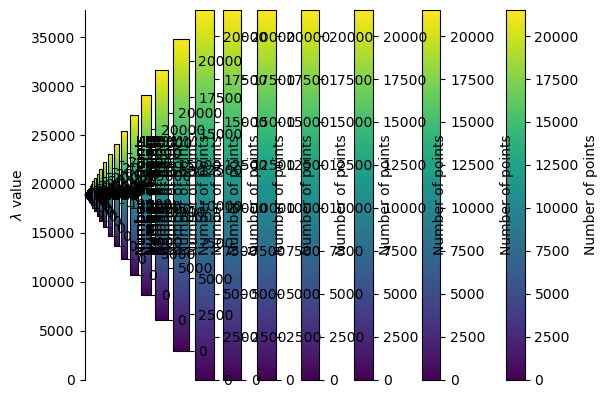

In [ ]:
import cluster_data
from cluster_data_ecc import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from HDBSCAN import hdbscan_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils_ecc import ClusterData

standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data.generate_running_year_ranges(2002, 2023, 4)
year_range = running_ranges

binned_data = cluster_data.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

images_dir = "Images"
os.makedirs(images_dir, exist_ok=True)
plot_dir = os.path.join("Images", "hdbscan_simulations_running_bins_3d")
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning HDBSCAN for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan]).T
    normalized_data, data_min, data_max = normalize_data(data_array)

    min_cluster_size_values = [10, 15]  
    min_samples_values = [None, 10] 
    cluster_selection_epsilon_values = [0.0, 0.1] 

    results = []

    for min_cluster_size in min_cluster_size_values: 
        for min_samples in min_samples_values:
            for cluster_selection_epsilon in cluster_selection_epsilon_values:

                result_hdbscan, time_hdbscan, n_clusters_hdbscan, points_per_cluster_hdbscan, metrics_hdbscan = run_clustering(
                    hdbscan_clustering, "HDBSCAN", normalized_data, data_min, data_max, min_cluster_size, min_samples, cluster_selection_epsilon, plot_condensed_tree=True, plot=False
                )

                unnormalized_data, cluster_centers = unnormalize(
                    result_hdbscan.data, result_hdbscan.cluster_centers, data_min, data_max
                )
                plotter = ClusterPlotter(unnormalized_data, result_hdbscan.labels, cluster_centers)
                plot_filename = os.path.join(plot_dir, f"hdbscan_{year_range}_minclust{min_cluster_size}_minsamples{min_samples}_epsilon{cluster_selection_epsilon}.png")
                title = f"HDBSCAN: years = {year_range}, min_cluster_size: {min_cluster_size}, min_samples: {min_samples}, epsilon: {cluster_selection_epsilon},"
                plotter.clusters_3d_plot(title, plot_filename)

                rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_hdbscan[4].items()}

                results.append({
                    "Year Range": year_range,
                    "k": n_clusters_hdbscan,
                    "Runtime (s)": f"{time_hdbscan:.3f}",
                    "Clusters": n_clusters_hdbscan,
                    "Points per Cluster": points_per_cluster_hdbscan,
                    "Davies-Bouldin": f"{metrics_hdbscan[0]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[0], (int, float)) else None,
                    "Calinski-Harabasz": f"{metrics_hdbscan[1]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[1], (int, float)) else None,
                    "Dunn Index": f"{metrics_hdbscan[2]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[2], (int, float)) else None,
                    "Silhouette Score": f"{metrics_hdbscan[3]:.3f}" if metrics_hdbscan and isinstance(metrics_hdbscan[3], (int, float)) else None,
                    "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None
                })

    df = pd.DataFrame(results)
    display(df)

# DENCLUE

In [ ]:
import cluster_data
from cluster_data import run_clustering, normalize_data, unnormalize
import numpy as np
import pandas as pd
import os
import cluster_plotter
from clustering_utils_ecc import ClusteringResult
from scipy.spatial.distance import cdist
from DENCLUE import denclue_clustering  # Import DENCLUE clustering function
from cluster_plotter import ClusterPlotter

# Same setup as before
standard_year_ranges = {
    f"{start}-{start + 3}": np.arange(start, start + 4)
    for start in [2002, 2006, 2010, 2014, 2019]
}
standard_year_ranges["2019-2023"] = np.arange(2019, 2024)  # Include 2023
running_ranges = cluster_data.generate_running_year_ranges(2002, 2023, 4)
year_range = standard_year_ranges

binned_data = cluster_data.bin_data_for_clustering(running_ranges, print_res=False)

results_per_year_range = {}

plot_dir = "Images/denclue_simulations_normal_bins_ecc"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for cluster_data, year_range in binned_data:  
    print(f"\nRunning DENCLUE for Year Range: {year_range}")

    data_array = np.array([cluster_data.inc, cluster_data.raan]).T
    normalized_data, data_min, data_max = normalize_data(data_array)

    epsilon_vals = [1000, 1000, 1500]
    max_iter_vals = [5000, 7000, 9000]
    bandwidth_vals = [0.01, 0.02, 0.03]

    results = []

    for epsilon in epsilon_vals:
        for max_iter in max_iter_vals:
            for bandwidth in bandwidth_vals:
                result_denclue, time_denclue, n_clusters_denclue, points_per_cluster_denclue, metrics_denclue = run_clustering(denclue_clustering, "DENCLUE",
                    normalized_data, data_min, data_max, epsilon=epsilon, max_iter=max_iter, bandwidth=bandwidth, plot = False
                )

                unnormalized_data, cluster_centers = unnormalize(
                    result_denclue.data, result_denclue.cluster_centers, data_min, data_max
                )
                plotter = ClusterPlotter(unnormalized_data, result_denclue.labels, cluster_centers)
                plot_filename = os.path.join(plot_dir, f"denclue_{year_range}_eps{epsilon}_maxiter{max_iter}_bandwidth{bandwidth}.png")
                title = f"DENCLUE: years = {year_range}, epsilon: {epsilon}, max_iter: {max_iter}, bandwidth: {bandwidth}"
                plotter.clusters_3d_plot(title, plot_filename)
                rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_denclue[4].items()}
                rounded_square_density = {key: round(value, 3) for key, value in metrics_denclue[5].items()}
                rounded_hull_density = {key: round(value, 3) for key, value in metrics_denclue[6].items()}

                results.append({
                    "Year Range": year_range,
                    "k": n_clusters_denclue,
                    "Runtime (s)": f"{time_denclue:.3f}",
                    "Clusters": n_clusters_denclue,
                    "Points per Cluster": points_per_cluster_denclue,
                    "Davies-Bouldin": f"{metrics_denclue[0]:.3f}" if metrics_denclue and isinstance(metrics_denclue[0], (int, float)) else None,
                    "Calinski-Harabasz": f"{metrics_denclue[1]:.3f}" if metrics_denclue and isinstance(metrics_denclue[1], (int, float)) else None,
                    "Dunn Index": f"{metrics_denclue[2]:.3f}" if metrics_denclue and isinstance(metrics_denclue[2], (int, float)) else None,
                    "Silhouette Score": f"{metrics_denclue[3]:.3f}" if metrics_denclue and isinstance(metrics_denclue[3], (int, float)) else None,
                    "Cluster Std.": rounded_cluster_std if rounded_cluster_std else None,
                    "Square Density": rounded_square_density if rounded_square_density else None,
                    "Hull Density": rounded_hull_density if rounded_hull_density else None
                })

    df = pd.DataFrame(results)
    display(df)


Running DENCLUE for Year Range: 2002-2005

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:15<00:30, 15.41s/step]

Runtime for denclue_clustering: 15.411019 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:23<00:00,  7.93s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.01.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:07<00:15,  7.80s/step]

Runtime for denclue_clustering: 7.798340 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:25<00:00,  8.49s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.02.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:15<00:30, 15.46s/step]

Runtime for denclue_clustering: 15.462073 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:22<00:00,  7.62s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.03.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:14<00:29, 14.99s/step]

Runtime for denclue_clustering: 14.989034 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:23<00:00,  7.85s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.01.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:11<00:22, 11.14s/step]

Runtime for denclue_clustering: 11.135724 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:24<00:00,  8.32s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.02.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:08<00:16,  8.24s/step]

Runtime for denclue_clustering: 8.235285 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:15<00:00,  5.28s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.03.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:09<00:18,  9.29s/step]

Runtime for denclue_clustering: 9.288322 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:16<00:00,  5.50s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.01.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:14<00:29, 14.60s/step]

Runtime for denclue_clustering: 14.596313 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:21<00:00,  7.32s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.02.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:07<00:14,  7.15s/step]

Runtime for denclue_clustering: 7.151666 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:13<00:00,  4.64s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.03.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:09<00:18,  9.17s/step]

Runtime for denclue_clustering: 9.170978 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:16<00:00,  5.34s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.01_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:06<00:13,  6.93s/step]

Runtime for denclue_clustering: 6.932172 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:17<00:00,  5.84s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.02_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:06<00:13,  6.99s/step]

Runtime for denclue_clustering: 6.985583 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:14<00:00,  4.68s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter5000_bandwidth0.03_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:08<00:17,  8.90s/step]

Runtime for denclue_clustering: 8.901433 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:16<00:00,  5.36s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.01_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:06<00:13,  6.65s/step]

Runtime for denclue_clustering: 6.649680 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:13<00:00,  4.43s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.02_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:06<00:13,  6.87s/step]

Runtime for denclue_clustering: 6.871814 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:13<00:00,  4.50s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter7000_bandwidth0.03_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:09<00:18,  9.48s/step]

Runtime for denclue_clustering: 9.479159 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:16<00:00,  5.44s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.01_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:07<00:15,  7.59s/step]

Runtime for denclue_clustering: 7.594385 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:14<00:00,  4.85s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.02_1.png

DENCLUE result:


Running DENCLUE:  33%|███▎      | 1/3 [00:07<00:14,  7.15s/step]

Runtime for denclue_clustering: 7.147622 seconds


Running DENCLUE: 100%|██████████| 3/3 [00:14<00:00,  4.70s/step]


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1000_maxiter9000_bandwidth0.03_1.png

DENCLUE result:


Running DENCLUE: 100%|██████████| 3/3 [00:09<00:00,  3.06s/step]

Runtime for denclue_clustering: 9.165776 seconds


Plot saved as: Images/denclue_simulations_normal_bins\denclue_2002-2005_eps1500_maxiter5000_bandwidth0.01.png


IndexError: list index out of range